# Projet 7 - Implementation of a scoring model
# Notebook - Model comparison

# Goal of the notebbok

Try and compare many types of classifiers in different methods to manage unbalanced data in order to ultimately select the most suitable one for the project.

# Glossary

__- TP:__ True positives correspond to customers which are classified as they would default the repayment of their loan and they would as expected.<br>
__- FP:__ False positives correspond to customers which were guessed trustless to repay their loans whereas they would have to (Secondary case to avoid and minimize if possible).<br>
__- FN:__ False negatives correspond to customers which were guessed trustful to repay their loans whereas they will not (Worst case to absolutly minimize).<br>
__- TN:__ True negatives correspond to customers which are classified as they would not default the repayment of their loan and they don't as expected.<br>
__- dt_sp:__ Data sampling.<br>
__- wt:__ Weight.<br>
__- opt:__ Optimal.<br>
__- synth_sp:__ Synthetic sampling.<br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7---Implementation-of-a-scoring-model" data-toc-modified-id="Projet-7---Implementation-of-a-scoring-model-1">Projet 7 - Implementation of a scoring model</a></span></li><li><span><a href="#Notebook---Model-comparison" data-toc-modified-id="Notebook---Model-comparison-2">Notebook - Model comparison</a></span></li><li><span><a href="#Goal-of-the-notebbok" data-toc-modified-id="Goal-of-the-notebbok-3">Goal of the notebbok</a></span></li><li><span><a href="#Glossary" data-toc-modified-id="Glossary-4">Glossary</a></span></li><li><span><a href="#I)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Importation-of-the-dataset-into-a-pandas-dataframe-5">I) Importation of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-5.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Settings-of-global-graphics-parameters" data-toc-modified-id="2)-Settings-of-global-graphics-parameters-5.2">2) Settings of global graphics parameters</a></span></li><li><span><a href="#3)-Global-files'-path" data-toc-modified-id="3)-Global-files'-path-5.3">3) Global files' path</a></span></li><li><span><a href="#4)-Importation-of-the-preprocessed-datasets" data-toc-modified-id="4)-Importation-of-the-preprocessed-datasets-5.4">4) Importation of the preprocessed datasets</a></span></li><li><span><a href="#5)-Separation-of-the-explicatives-and-the-explicated" data-toc-modified-id="5)-Separation-of-the-explicatives-and-the-explicated-5.5">5) Separation of the explicatives and the explicated</a></span></li></ul></li><li><span><a href="#II)-Models" data-toc-modified-id="II)-Models-6">II) Models</a></span><ul class="toc-item"><li><span><a href="#1)-Importation-of-required-libraries" data-toc-modified-id="1)-Importation-of-required-libraries-6.1">1) Importation of required libraries</a></span></li><li><span><a href="#2)-Global-variables" data-toc-modified-id="2)-Global-variables-6.2">2) Global variables</a></span><ul class="toc-item"><li><span><a href="#a)-Notebook-configuration" data-toc-modified-id="a)-Notebook-configuration-6.2.1">a) Notebook configuration</a></span></li><li><span><a href="#b)-Defaults" data-toc-modified-id="b)-Defaults-6.2.2">b) Defaults</a></span></li><li><span><a href="#c)-Summarizing-table-creating-/-loading" data-toc-modified-id="c)-Summarizing-table-creating-/-loading-6.2.3">c) Summarizing table creating / loading</a></span></li></ul></li><li><span><a href="#3)-Functions" data-toc-modified-id="3)-Functions-6.3">3) Functions</a></span><ul class="toc-item"><li><span><a href="#a)-Hyperparameter-tuning" data-toc-modified-id="a)-Hyperparameter-tuning-6.3.1">a) Hyperparameter tuning</a></span></li><li><span><a href="#b)-Model-performance-evaluation" data-toc-modified-id="b)-Model-performance-evaluation-6.3.2">b) Model performance evaluation</a></span></li><li><span><a href="#c)-Building-model-pipeline" data-toc-modified-id="c)-Building-model-pipeline-6.3.3">c) Building model pipeline</a></span></li><li><span><a href="#d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models" data-toc-modified-id="d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models-6.3.4">d) Simplification of the hyperparameters tuning and the evaluation of the models</a></span></li></ul></li><li><span><a href="#3)-Preprocessing-for-data-resampling" data-toc-modified-id="3)-Preprocessing-for-data-resampling-6.4">3) Preprocessing for data resampling</a></span><ul class="toc-item"><li><span><a href="#a)-Oversampling" data-toc-modified-id="a)-Oversampling-6.4.1">a) Oversampling</a></span></li><li><span><a href="#b)-Undersampling" data-toc-modified-id="b)-Undersampling-6.4.2">b) Undersampling</a></span></li></ul></li><li><span><a href="#4)-Modelisation" data-toc-modified-id="4)-Modelisation-6.5">4) Modelisation</a></span><ul class="toc-item"><li><span><a href="#a)-Baseline-model:-Dummy-classifier" data-toc-modified-id="a)-Baseline-model:-Dummy-classifier-6.5.1">a) Baseline model: Dummy classifier</a></span><ul class="toc-item"><li><span><a href="#i.-Libraries-importation" data-toc-modified-id="i.-Libraries-importation-6.5.1.1">i. Libraries importation</a></span></li><li><span><a href="#ii.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="ii.-Evaluation-on-the-cross-validated-train-data-6.5.1.2">ii. Evaluation on the cross validated train data</a></span></li><li><span><a href="#iii.-Generalization-over-the-test-set" data-toc-modified-id="iii.-Generalization-over-the-test-set-6.5.1.3">iii. Generalization over the test set</a></span></li></ul></li><li><span><a href="#b)-Logistic-regressor" data-toc-modified-id="b)-Logistic-regressor-6.5.2">b) Logistic regressor</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.2.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.2.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.2.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.2.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.2.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#c)-Random-forest" data-toc-modified-id="c)-Random-forest-6.5.3">c) Random forest</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.3.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.3.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.3.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.3.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.3.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#d)-XGBoosting" data-toc-modified-id="d)-XGBoosting-6.5.4">d) XGBoosting</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.4.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.4.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.4.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.4.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.4.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#e)-LightGBM" data-toc-modified-id="e)-LightGBM-6.5.5">e) LightGBM</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.5.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.5.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.5.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.5.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.5.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#f)-Models-comparison" data-toc-modified-id="f)-Models-comparison-6.5.6">f) Models comparison</a></span><ul class="toc-item"><li><span><a href="#i.-Functions" data-toc-modified-id="i.-Functions-6.5.6.1">i. Functions</a></span></li><li><span><a href="#ii.-Summarizing-table" data-toc-modified-id="ii.-Summarizing-table-6.5.6.2">ii. Summarizing table</a></span></li><li><span><a href="#iii.-Figures" data-toc-modified-id="iii.-Figures-6.5.6.3">iii. Figures</a></span></li></ul></li></ul></li></ul></li></ul></div>

# I) Importation of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [1]:
### File management ###

# Files' path.
import os.path

# Save and load files.
import csv
import pickle


### Data manipulations ###

import numpy as np
from numpy import set_printoptions # Saving full data when exporting to csv format.
import pandas as pd


### Custom functions ###

from shared_functions import *


### Date & time ###

# Time measurment and datetime management
import datetime as dt
from time import time


### Warnings removal ###

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data visualizations ###

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Settings of global graphics parameters

In [2]:
### Set default figure parameters for the whole notebook ###

# Default parameters for matplotlib's figures.
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['figure.dpi'] = 200
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['b', 'r', 'g'])
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Default parameters of seaborn's figures.
sns.set_style('white') # NB: Needs to be above sns.set_theme to properly attend custom_params.
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette='deep', rc=custom_params)

## 3) Global files' path

In [3]:
# Global file paths.
#EXPORTS_DIR_PATH = 'Exports'
EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried'
MLFLOW_EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried\MLFlow'
IMPORTS_DIR_PATH = r'Exports\Preprocessed_data'

CSV_MODELS_FILE = 'models_info.csv'
PKL_MODELS_FILE = 'models_info.pkl'
#JSON_MODELS_FILE = 'models_info.json'
#DATASETS_DIR_PATH = r'D:\0Partage\MP-P2PNet\MP-Sync\MP-Sync_Pro\Info\OC_DS\Projet 7\Datasets' #os.path.join('D:', '0Partage', 'MP-P2PNet', 'MP-Sync', 'MP-Sync_Pro', 'Info', 'OC_DS', 'Projet 7', 'Datasets')

## 4) Importation of the preprocessed datasets

*NB: Only the 75 000 first customers are selected for training as my computer runs out of memory with more during the hyperparameter tuning steps with RandomizedSearchCV() applied over the Random Forest of scikit-learn.*

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
%%time

# Load the datatsets.
#df_train = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
#df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))
#df_train = pickle.load(open(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.pkl'), 'rb'))
#df_test = pickle.load(open(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.pkl'), 'rb'))
df_train = pd.read_pickle(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.pkl'))
df_test = pd.read_pickle(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.pkl'))

CPU times: total: 125 ms
Wall time: 124 ms


In [6]:
# Resample the train set with stratification over the TARGET feature.
df_train, _ = train_test_split(df_train, stratify=df_train['TARGET'], test_size=0.70, random_state=0)

In [7]:
# Reset both indexes in order to avoid any "index out of bound" error.
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [8]:
# Remove the customer IDs feature before giving data to the model.
del_features = ['SK_ID_CURR'] #, 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']

df_train = df_train.drop(del_features, axis=1)
df_test = df_test.drop(del_features, axis=1)

In [9]:
%%time

# Turns all categorical columns as int when possible.
# NB: Required in case that data is load from a format which does not store or is not coming from a pd.df python object
#     (such as csv storing files).
#df_train = find_int_cols(df_train)
#df_test = find_int_cols(df_test)
#df_train.info()

CPU times: total: 0 ns
Wall time: 0 ns


In [10]:
# Reduce the memory load of both datasets for better process performance.
#print("Train set df memory optimization:")
#df_train = reduce_memory(df_train)
#print()
#df_train.info()

#print("\n")

#print("Test set df memory optimization:")
#df_test = reduce_memory(df_test)
#print()
#df_test.info()

## 5) Separation of the explicatives and the explicated

In [11]:
# Train set.
X_TRAIN = df_train.drop('TARGET', axis=1) # Explicatives.
y_TRAIN = df_train['TARGET'] # Explained.

# Test set.
X_TEST = df_test.drop('TARGET', axis=1) # Explicatives.
y_TEST = df_test['TARGET'] # Explained.

# II) Models

## 1) Importation of required libraries

In [12]:
# Additional common libraries.
from numpy import argmax, argmin
import math
from random import sample as py_rd_sp # Python random sampling.

# sklearn tools ad libraries.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, fbeta_score, confusion_matrix

# Make a sklearn job scorer.
from sklearn.metrics import make_scorer

*NB: In order to calculate the best probability threshold the AUCROC is selected over the AUCPR since the first one focuses on the FP and FN balance (the 2 most important values to consider for this project) while the AUCPR focused exclusively on the positive (minority class) (=> FP) which does not take into account the most relevant value for this project (FN).*

## 2) Global variables

### a) Notebook configuration

In [13]:
# Enable/disable MLFlow experience recording.
MLFLOW_XP = False

# True: Allows hyperprameter tuning, False: Get the results stored from the last hyperparameters tuning.
HT = True

# Force the summarizing table to update with the results of the current experiment
# (not only if the tracked score is higher than the one already stored). 
FU = False

# For imbalanced data use weight or data sampling.
IMB_PROCESS = 'Weight' #'Weight' #'Resp'

# Global common scaler to use.
SCALER = MinMaxScaler()
if SCALER == None:
    SCALER_PREFIX_LABEL = ''
else:
    SCALER_PREFIX_LABEL = 'scl_'

### b) Defaults

In [14]:
# Initialize the default cross validation method to use.
SKF_5 = StratifiedKFold(5, shuffle=True, random_state=0)

### c) Summarizing table creating / loading

In [15]:
# Set and initialize the main scorer used for the models comparisons.
MAIN_SCORER_TRAIN_LABEL = 'Job_score_train'
MAIN_SCORER_TEST_LABEL = 'Job_score_test'
MAIN_SCORER_VAL = 0


# Load/create and initialize the dataframe in which store all relevant models' information (best hyperparameters, scores...).
# NB: In case of the creation of the file data=np.full((1,len(l_COL_LABELS)), None) to force dtypes as objects
#     until one of the next added entries (rows) are full then, it will be removed. Otherwise, the np.nan values which will appear
#     within the first row will convert their columns' dtypes to float64 and prevent their replacement
#     by objects such as np.array.
l_COL_LABELS = ['Model_labels', 'Models',
                'yhat_train', 'yhat_test',
                'Best_proba_threshold_train', 'Best_proba_threshold_test',
                MAIN_SCORER_TRAIN_LABEL, MAIN_SCORER_TEST_LABEL, 
                'AUROC_scores_train', 'AUROC_scores_test',
                'F-bêta_score_train', 'F-bêta_score_test',
                'Process_time_train (s)', 'Process_time_test (s)',
                'Confusion_matrix_values_train ([TP, FP, FN, TN])', 'Confusion_matrix_values_test ([TP, FP, FN, TN])',
                'Sensitivity_train', 'Sensitivity_test',
                'Specificity_train', 'Specificity_test',
                'Accuracy_train', 'Accuracy_test'                
               ]

# Update the csv file containing the training information and scores of the model or not (True = update, False = create a new one).
GET_CSV_FILE = True
if GET_CSV_FILE:
    try:
        df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')

    except:
        print("No csv models informations were found. A new one is created...")
        df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), ''), columns=l_COL_LABELS).set_index('Model_labels')
        df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
        print('Done !')
    
else:
    print("Creation of a new csv file to store models informations...")
    df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), None), columns=l_COL_LABELS).set_index('Model_labels')
    df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
    print('Done !')  

display(df_MODELS.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, wt_dummy_clf to scl_wt_lgbm_clf_fine_opt
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Models                                            16 non-null     object 
 1   yhat_train                                        16 non-null     object 
 2   yhat_test                                         16 non-null     object 
 3   Best_proba_threshold_train                        16 non-null     float64
 4   Best_proba_threshold_test                         16 non-null     float64
 5   Job_score_train                                   16 non-null     float64
 6   Job_score_test                                    16 non-null     float64
 7   AUROC_scores_train                                16 non-null     float64
 8   AUROC_scores_test                                 16 non-null     float64


None

In [16]:
df_MODELS

Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2589250402126502, 0.6877454559709587, 0.391...   
scl_wt_rf_clf_opt          [0.179256226903877, 0.4320888546541277, 0.2344...   
scl_wt_xgb_clf_opt         [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.27738897319260064, 0.3533168213732829, 0.55...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

## 3) Functions 

### a) Hyperparameter tuning

In [17]:
def hyper_tune_rand_grid (model, X, y, para_grid, scorer, cv, score_label = 'score',
                          n_iter = 100, grid_loop = 1, range_precision = None, rand_state = 0, verbose = 0):
    
    """
    Description
    -----------
    Tune the chosen hyperapameters of the model by checking a random number of combinations with the RandomizedSearchCV() method.
    This function tunes the hyperparameters by taking the best combination among the best one found in each loop run.
    
    Parameters
    ----------
    model: sklearn model
        Model to test.
    X: pandas.Dataframe()
        Dataframe of the explicatives.
    y: pandas.Dataframe()
        Dataframe of the explicated.
    n_folds: int
        Split parameter of the KFold function.
    para_grid: dictionary
        Parameters of the model to tune.
    n_iter: int
        Number of combinations of hyperparameters within which the RandomizedSearchCV will pick the best.
    grid_loop:
        Number of loop run.
    range_precision: int
        Number of decimals to round to.
    int_para_names: list of strings
        Hyperparameters which accept only integers.
    bool_para_names: list of strings
        Hyperparameters which accept only booleans.
    rand_state: int
        random_state parameter in order to fix the randomness of the runs.

    Return: sklearn.RandomizedSearchCV()
    ------
    Returns the fitted randomized model grid.
        
    """      
    
    def show ():
        
        """
        Description
        -----------
        Show relevant information at the end of the process.
        
        """  
        
        # Fit the grid model.
        model_grid.fit(X, y)
        
        # Display the best hyperparameter.
        print("\nBest estimator found:\n", model_grid.best_estimator_)
        print("\nBest score found:\n", score_label, '=', round(model_grid.best_score_, 3))
        print("\nBest hyperparameters found:\n", model_grid.best_params_)  

        
    # Set the KFold cross validation with the selected n_folds.
    #skf = StratifiedKFold(n_folds, shuffle=True, random_state=0)

    # Create a dictionary with all parameters to test as keys and empty lists as values.
    best_para_stored = para_grid.copy()
    for key in best_para_stored.keys():
        best_para_stored[key] = []

    
    for i in range(grid_loop):
               
        # Random search of parameters, use all available cores.
        model_grid = RandomizedSearchCV(estimator=model, param_distributions=para_grid, cv=cv, scoring=scorer,
                                        n_iter=n_iter, refit=True, n_jobs=-1, random_state=rand_state,
                                        verbose=verbose) #, error_score="raise")
         
        # Fit the random grid.
        # NB: Step needed to be able to get the "best_params_" method unles refit=True.
        model_grid.fit(X, y)#.to_numpy().ravel())

        # Get the best parameters values in a dictionary.
        best_para = model_grid.best_params_
        
        # Loop to store the best parameter got in this loop run, in order to make the average at the end of all runs.
        for key in best_para_stored.keys():
            
            # Get the best value for the "key" parameter.
            if range_precision != None:
                best_para_value = round(best_para.get(key), range_precision)
            else:
                best_para_value = best_para.get(key)
            
            # Store this value in the dictionary set at the beginning of the function ("best_para_stored").
            best_para_stored[key].append(best_para_value)
            
            # Remove duplicates.
            best_para_stored[key] = list(set(best_para_stored[key]))
    

    # Replace the initial parameters with the best ones found.
    para_grid = best_para_stored
    
    # Find the best parameter among the best found.
    model_grid = GridSearchCV(estimator=model, param_grid=para_grid, cv=cv, scoring=scorer, n_jobs=-1, verbose=verbose)
    
    # Show results.
    show()
        
    return model_grid

### b) Model performance evaluation

In [18]:
def evaluate (y_pred_proba_P, y_true = y_TEST, fig = (1,1,1,1), l_model_labels = ['Model']):
    
    """ Evaluate the model and draw the corresponding figures. """
    
    global MAIN_SCORER_VAL
    
    ### Calculate necessary variables.
    
    # List of the probability thresholds to try.
    l_proba_thrs = np.linspace(0, 1, num=201)
    
    # Get the predictions corresponding to each probability thresholds tried.
    l_y_pred = get_y_pred_list(y_pred_proba_P, l_proba_thrs)
    
    # Get the corresponding TP, FP, FN and TN for each probability thresholds tried.
    np_tp, np_fp, np_fn, np_tn = np.array(get_tp_fp_fn_tn_lists(y_true, l_y_pred))
    
    # FN cost coefficient (FN ~ 10 FP).
    fn_cost_coeff = 10
    
    # Display figures configuration.
    n_fig = fig.count(1)
    
    if n_fig != 0:
        plt.figure(figsize=(12,12), dpi=300)
        p = 0
        if n_fig == 1:
            l = 1; c = 1
        elif n_fig == 2:
            l = 1; c = 2
        elif n_fig >= 3:
            l = 2; c = 2  
    
    
    ### Calculate the optimal probability threshold.
    
    # Calculate the optimal threshold.
    model_best_thr, best_thr_idx = opt_proba_thr(np_tp, np_fp, np_fn, np_tn, l_proba_thrs)    
    
    # Plot figures.
    if fig[0]:
        p += 1 
        plt.subplot(l,c,p)
        figure_density(y_true, y_pred_proba_P, model_best_thr)
    
    if fig[1]:
        p += 1 
        plt.subplot(l,c,p)
        #figure_sum_fp_coeff_fn(np_fp, np_fn, l_proba_thrs, model_best_thr, fn_cost_coeff)
        figure_job_score_curve(y_true, y_pred_proba_P, model_label, thr_line_vis=True, return_fig=False)
    
    
    ### Calculate scores.
    
    # ROC AUC score.
    roc_auc_s = roc_auc_score(y_true, y_pred_proba_P)
    print('\nROC-AUC = %f' % roc_auc_s) #%.3f
    
    # Plot figure.
    if fig[2]:
        p += 1 
        plt.subplot(l,c,p)
        figure_roc(y_true, [y_pred_proba_P], l_model_labels)
    
    
    # F-bêta score.
    # NB: Square beta = cost FN / cost FP = 10
    square_beta = 2.5
    beta = round(math.sqrt(square_beta), 2)
      
    # Calculate the F-bêta score for each probability thresholds tried.
    l_fbeta = []
    for y_pred in l_y_pred:
        fbeta = fbeta_score(y_true, y_pred, beta=beta)
        l_fbeta.append(fbeta)
    fbeta = get_fbeta_score(l_proba_thrs, l_fbeta, beta, model_best_thr, best_thr_idx)

    # Plot figure.
    if fig[3]:
        p += 1 
        plt.subplot(l,c,p)
        figure_fbeta_score(l_proba_thrs, l_fbeta, model_best_thr, model_label)
    
    
    # Job score.
    g_norm = gain_norm(y_true, l_y_pred[best_thr_idx])
    MAIN_SCORER_VAL = g_norm
    print("Job score: %.3f" % g_norm)
  
    
    print("\n" + "-" * 100 + "\n")
    # Draw figures.
    if fig != (0,0,0,0):
        plt.show()
        
        
    # Confusion matrix.
    print("Confusion matrix:")
    figure_confusion_matrix(y_true, l_y_pred[best_thr_idx])
     
    return model_best_thr, g_norm, roc_auc_s, fbeta, [np_tp[best_thr_idx], np_fp[best_thr_idx], np_fn[best_thr_idx], np_tn[best_thr_idx]]

### c) Building model pipeline

In [19]:
def select_model_label (imb_process, label_root, scaler_prefix_label = SCALER_PREFIX_LABEL):
    
    """ Build the label to associate to the model. """
    
    if imb_process == 'Resp':
        model_label = scaler_prefix_label + 'resp_' + label_root
    elif imb_process == 'Weight':
        model_label = scaler_prefix_label + 'wt_' + label_root
    else:
        model_label = label_root
    
    return model_label

In [20]:
def set_model_pipeline (model, scaler, resampler, imb_process, l_cat_cols_mask = None):
    
    """ Set the model's pipeline. """
    
    # Initiliaze the model or the pipeline with its default values.
    # NB: scaler = MinMaxScaler() as binary categories won't be changed and
    #     the distance between all other values of a feature will be kept.
    pipe_vars = []
    if scaler != None:
        pipe_vars.append(('scaler', scaler))
            
    if imb_process == 'Resp':
        pipe_vars.append(['resampler', resampler]) #SMOTENC(categorical_features=l_cat_cols_mask, random_state=0)]) #BorderlineSMOTE(random_state=0)]) #SMOTE(random_state=0)
        pipe_vars.append(['model', model])
    else:
        pipe_vars.append(['model', model])
                            
    model_pl = Pipeline(pipe_vars)
        
    return model_pl

### d) Simplification of the hyperparameters tuning and the evaluation of the models

In [21]:
def block_hyperparams_tune (df = df_MODELS, X = X_TRAIN, y = y_TRAIN, cv = SKF_5, tune = HT,
                            n_iter = 20, grid_loop = 1, range_precision = None, rand_state = 0,
                            verbose = 2, model_label = 'model_label'):
    
    """ Section block which tunes the model hyperparameters and select the best ones or load an already tuned model. """
    
    # Tune the hyperparameters of the model.
    # NB: Verbose displays within the terminal of the server session.
    if tune:
        model_grid = hyper_tune_rand_grid(model_pl, X, y, hyperparams_grid, g_norm_scorer, cv, score_label='g_norm',
                                          n_iter=n_iter, grid_loop=grid_loop, range_precision=range_precision,
                                          rand_state=rand_state, verbose=verbose)

        # Get the model set with the best hyperparameters found.
        model_pl_opt = model_grid.best_estimator_

    # Load the last values calculated for the hyperparameters.
    else:
        df = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')
        model_pl_opt = df.loc[model_label, 'Models']
        
        # Show the model best hyperparameters combination found.
        print("\nBest combination of hyperparmaters found:\n")
        pprint(model_pl.get_params(), compact=True)
        
    return model_pl_opt

In [22]:
def block_evaluate (model_pl, df, model_label, X = X_TRAIN, y = y_TRAIN, X_test = X_TEST, y_test = y_TEST, cv = SKF_5,
                    eval_dataset = 'valid_set', get_csv_file = GET_CSV_FILE):

    """ Section block which fits, predicts, evaluates then, stores the model with its relevant scores and attributes. """
    
    # Changes to apply between the train and the test set before evaluation.
    if eval_dataset == 'test_set':
        y_true = y_test
        if IMB_PROCESS == 'Resp':
            model_pl.steps.pop(1)
        print(model_pl)
    else:
        y_true = y
    
    # Train the model and get its predictions probabilities.
    y_pred_proba_NP, process_time = model_fit_predict(model_pl, X, y, cv=cv, X_test=X_TEST)
 
    # Evaluate the model.
    best_thr, g_norm, rocauc, fbeta, cm_vals = evaluate(y_pred_proba_NP[:,1], y_true)
    
    # Calculate classification indicators.
    l_indicators = calc_indicators(cm_vals)
    
    # Store the relevant values in the model storage dataframe.
    l_tracked_vars = [model_label, model_pl, y_pred_proba_NP[:,1], best_thr, g_norm, rocauc, fbeta, process_time, cm_vals, l_indicators]

    # Tracking MLFlow (train set cross validated).
    if MLFLOW_XP and eval_dataset != 'test_set':
        mlflow_experiment_tracker(model_pl, df, model_label, X, y, l_tracked_vars)
    
    # Update the csv file if the main score is higher and the user allowed it.
    #print("\n" + "-" * 100 + "\n")
    df = update_sum_table(df, l_tracked_vars, get_csv_file, eval_dataset, MAIN_SCORER_VAL, l_COL_LABELS, force_update=FU)
    
    return df

## 3) Preprocessing for data resampling

### a) Oversampling

*NB: SMOTE should be applied on the train set only.*

In [23]:
from imblearn.pipeline import Pipeline # NB: imbalearn.pipeline.Pipeline allows to properly deal the SMOTE on the train set and avoid the validation/test sets.
from imblearn.over_sampling import SMOTENC, SMOTE, BorderlineSMOTE # NB: SMOTENC can manage categorial features while SMOTE cannot.

SMOTENC is the variant of SMOTE chosen since it is the only one which can properly manage categorical values. The risk with other SMOTE variant are to create fictive and unrealistic dots that the model will train at. <br>
=> If these dots are too numerous, the model might show good performances but its predictions may not fit the reality.

In [24]:
# Create a mask which will indicate SMOTENC which features it should consider as a category.
# NB: In practice the trick is to consider all "int" columns as categories in order to force SMOTE
#     to avoid to return float values for these columns.
#l_CAT_COLS = []
#l_CAT_COLS_MASK = []
#for col in X_TRAIN.columns:
#    col_type = X_TRAIN[col].dtypes
#    if col_type != object:
#        if str(col_type)[:3] == 'int':
#            l_CAT_COLS.append(col)
#            l_CAT_COLS_MASK.append(True)
#        else:
#            l_CAT_COLS_MASK.append(False)

#print("List of names of the %i categorical features:\n %s" % (len(l_CAT_COLS), l_CAT_COLS))

In [25]:
# List of categorical columns gotten from the features engineering notebook.
l_CAT_COLS = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
              'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT',
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
              'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_18', 'AGE_RANGE']

# Create a mask which will indicate SMOTENC which features it should consider as a category.
l_CAT_COLS_MASK = []
for col in X_TRAIN.columns:
    if col in l_CAT_COLS:
        l_CAT_COLS_MASK.append(True)
    else:
        l_CAT_COLS_MASK.append(False)

print("Mask to get the %i categorical features:\n %s" % (len(l_CAT_COLS), l_CAT_COLS_MASK))

Mask to get the 17 categorical features:
 [True, True, True, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, False, True, False, False, True, True, True, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

In [26]:
# Display the dataframe with only its categorical features.
display_EZ(df_train[l_CAT_COLS].head(3))

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  NAME_INCOME_TYPE  \
0                   0            0             1                 2   
1                   0            1             0                 0   
2                   0            1             0                 0   

   NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                    0                   0                  0   
1                    0                   1                  0   
2                    0                   1                  0   

   FLAG_WORK_PHONE  REGION_RATING_CLIENT  LIVE_REGION_NOT_WORK_REGION  \
0                0                     3                            0   
1                0                     3                            0   
2                1                     2                            0   

   REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       1                        0                  8   
1                       0                        0                  9   
2                       0                        0                 12   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_8  FLAG_DOCUMENT_18  AGE_RANGE  
0                1                0                 0          1  
1                1                0                 0          2  
2                1                0                 0          3

In [27]:
# Create the models.
smote_nc = SMOTENC(categorical_features=l_CAT_COLS_MASK, random_state=0)

# Create the model's pipeline.
smote_nc_pipe = Pipeline([('scaler', StandardScaler(copy=True)),
                          ('resampler', smote_nc)]
                        )

# Show the pipeline hyperparameters. 
pprint(smote_nc_pipe.get_params(), compact=True)

{'memory': None,
 'resampler': SMOTENC(categorical_features=[True, True, True, False, False, False, False,
                              False, True, True, True, True, False, False,
                              False, False, False, True, False, True, False,
                              False, True, True, True, True, False, False,
                              False, False, ...],
        random_state=0),
 'resampler__categorical_features': [True, True, True, False, False, False,
                                     False, False, True, True, True, True,
                                     False, False, False, False, False, True,
                                     False, True, False, False, True, True,
                                     True, True, False, False, False, False,
                                     False, False, True, True, True, False,
                                     False, False, False, False, True, False,
                                     False, False, Fals

In [28]:
# Set the SMOTE hyperparameters range.
k_neighbors = [int(x) for x in np.linspace(start=3, stop=10, num=5)]
sampling_strategy = [round(x, 2) for x in np.linspace(start=0.2, stop=1.0, num=5)]

# Generate the grid.
SMOTE_GRID = ({'resampler__k_neighbors': k_neighbors,
               'resampler__sampling_strategy': sampling_strategy
              })

In [29]:
# Initialize the resampler.
resampler = BorderlineSMOTE(random_state=0) #SMOTENC(categorical_features=l_CAT_COLS_MASK, random_state=0) #BorderlineSMOTE(random_state=0)]) #SMOTE(random_state=0)

**/!\ Finally the following part was not used as SMOTENC() does not work well with RandomizedSearchCV() (scorers returns NaN and sometimes memory problems occur such "Unable to allocate 219. GiB". Unfortunately I have "only" 32 GiB in my machine). Furthermore, the addition of the resampling step make the whole pipeline longer (~6 times longer) to process data which is too much for our purpose. /!\ .**

=> Finally,  SMOTE and BoderlineSMOTE have been tried but results might not be reliable considering what was discussed at the beginning of this section concerning the categorical features. Nevertheless, it can be noticed they are only 17 over 366 so, around 5 % of the total number of features which may compensate this lack of reliability. Feature interpretations might give more information in this regard.

### b) Undersampling

Undersampling is also a solution that could be tried. However, given the results gotten with oversampling and weights application, I do not expect better results (rather even worse since there will be less data to train at). <br>
=> As finding out the best performance possible is out of the scope of this project, this method is not tried.

__- Annexe__

In [30]:
### Method to normalize selected columns.

#from sklearn.compose import ColumnTransformer

#l_NUM_COLS = X_TRAIN.columns[~np.array(l_CAT_COLS_MASK)]
#num_cols_norm = ColumnTransformer([('num_cols', StandardScaler(), l_NUM_COLS),
#                                   ('cat_cols', 'passthrough', l_CAT_COLS)]) #NB: 'passthrough' allows to ignore the set columns.

#df = pd.DataFrame(MinMaxScaler().fit_transform(X_TRAIN), columns=X_TRAIN.columns)
#display_EZ(df[l_CAT_COLS])

## 4) Modelisation

### a) Baseline model: Dummy classifier

#### i. Libraries importation

In [31]:
from sklearn.dummy import DummyClassifier

In [32]:
# Initiliaze the model with its default values.
model = DummyClassifier(strategy="stratified")

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'dummy_clf')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, resampler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', DummyClassifier(strategy='stratified')]])

#### ii. Evaluation on the cross validated train data


ROC-AUC = 0.501059
F-Bêta score of the optimal threshold found = 0.082
Highest F-Bêta score = 0.082
Job score: 0.528

----------------------------------------------------------------------------------------------------



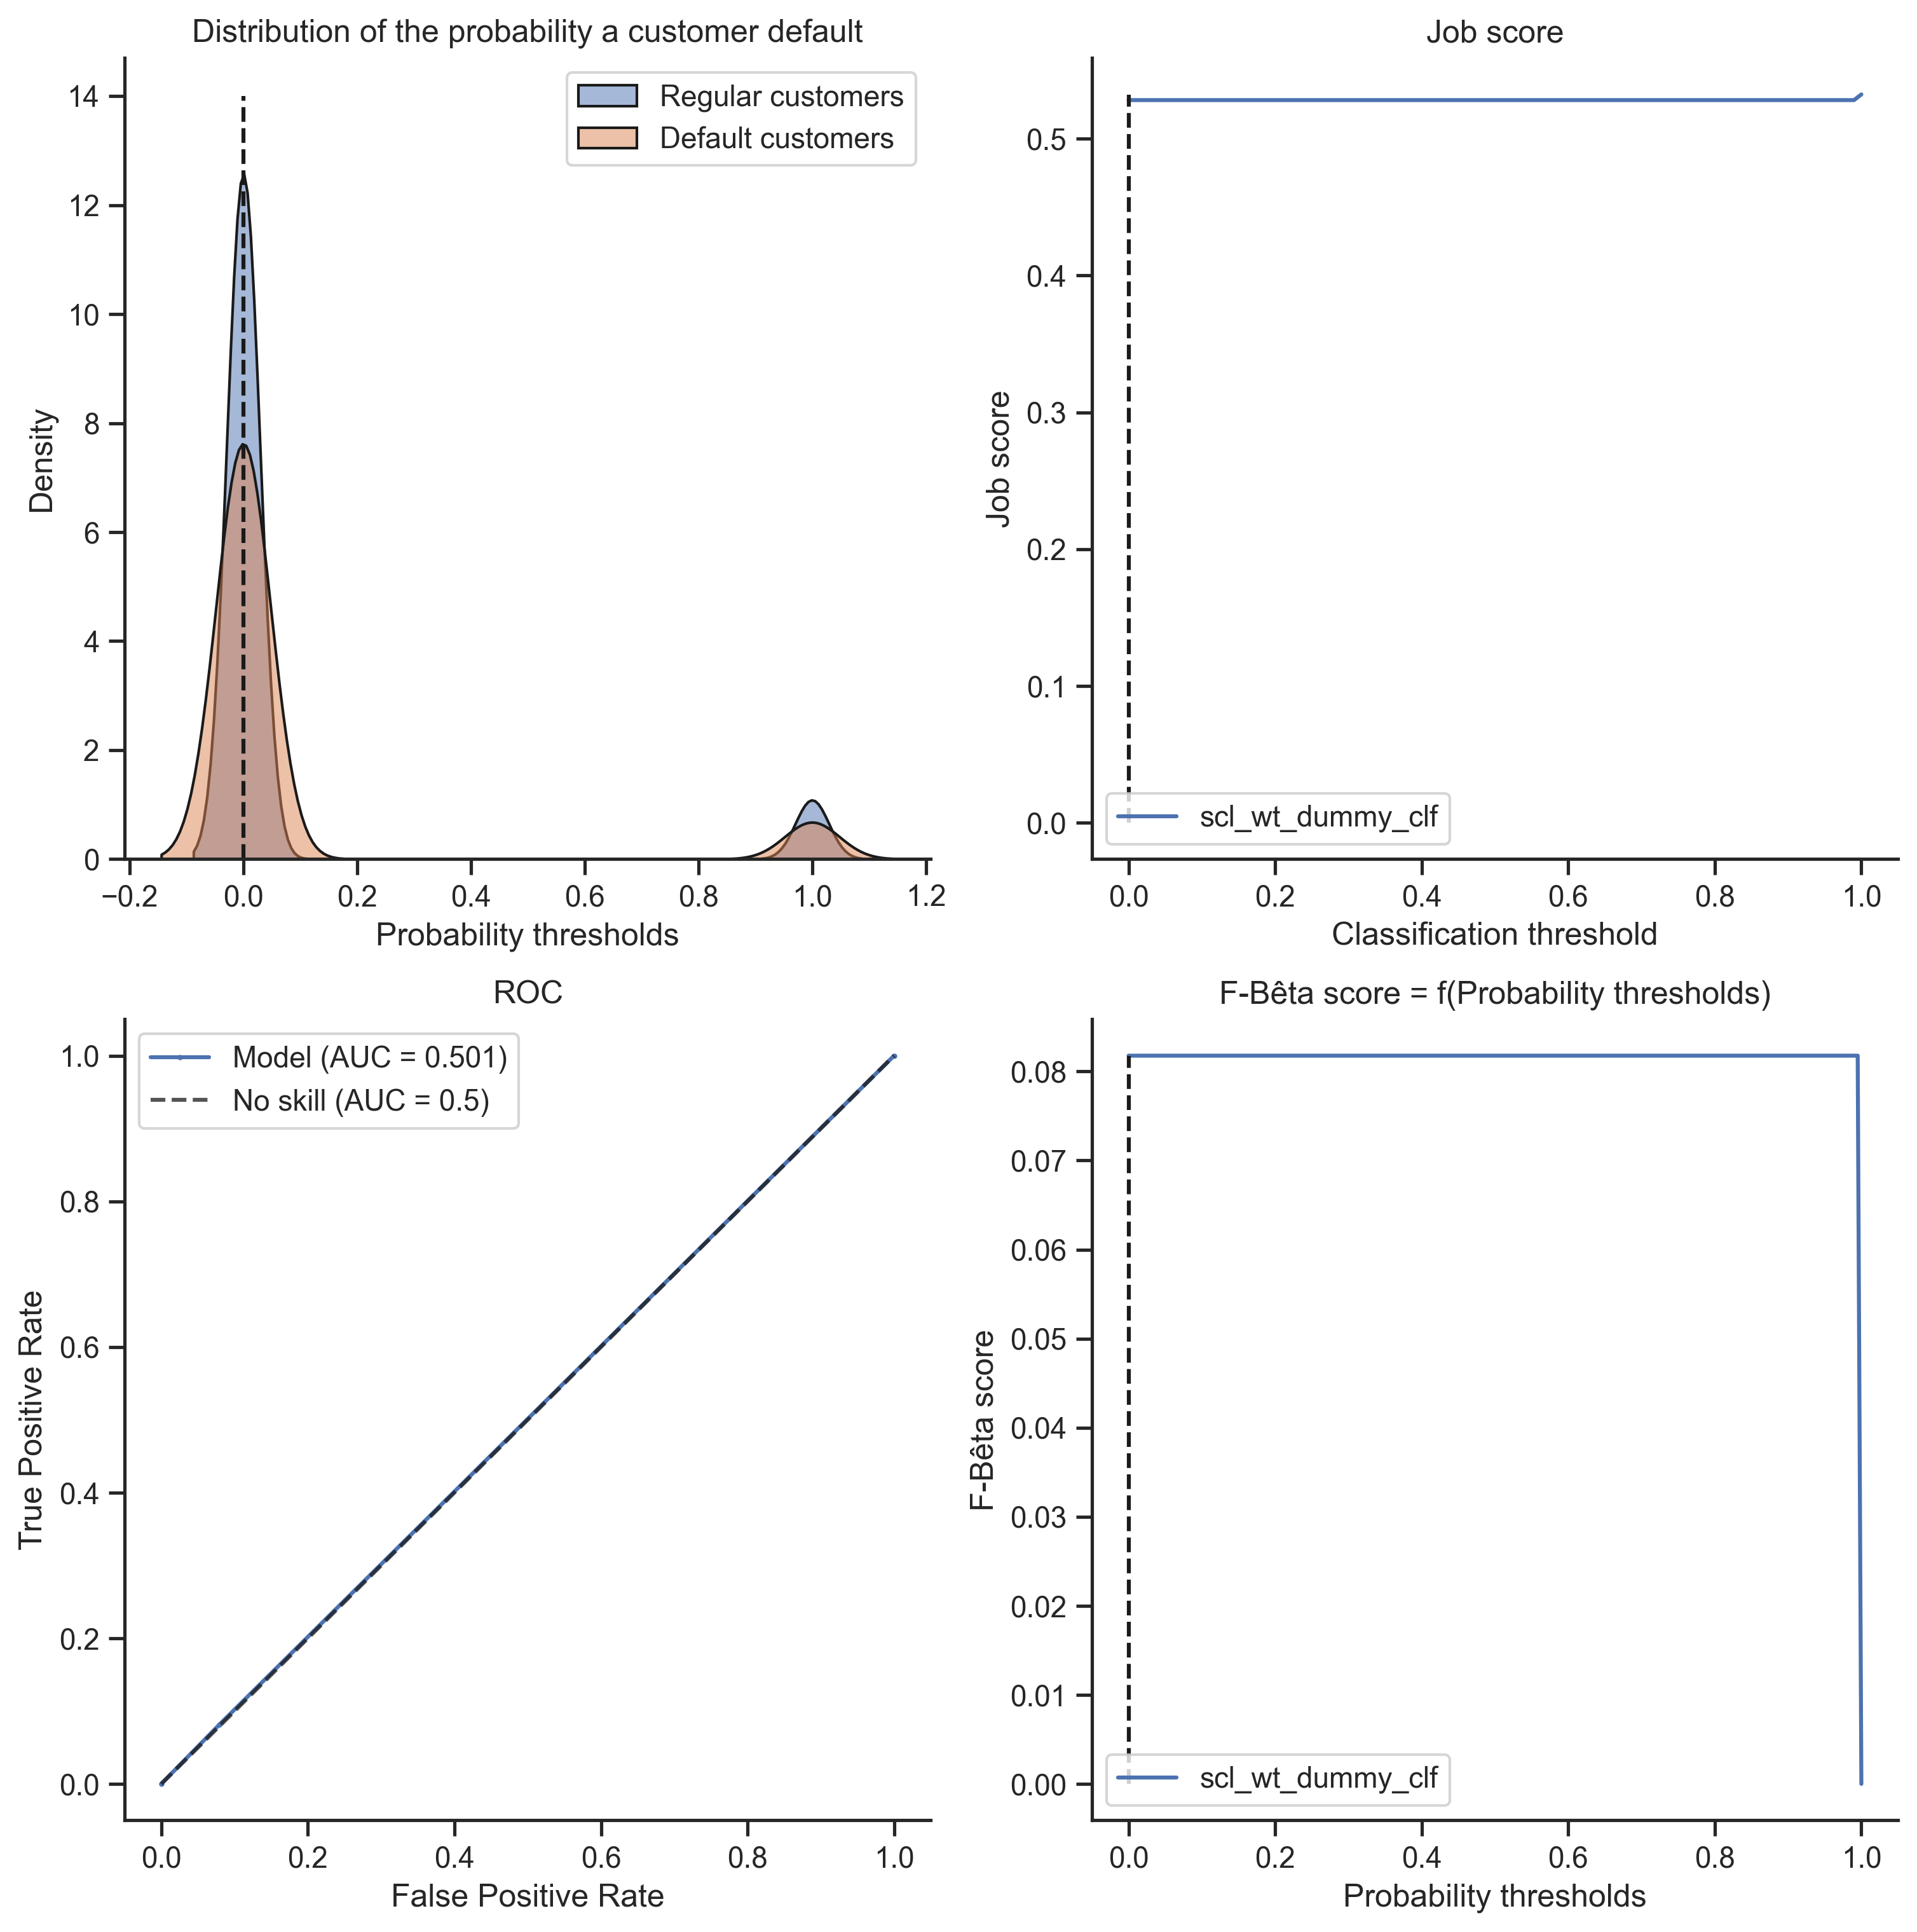

Confusion matrix:


The new score is inferior to the one already saved.
Dataframe not saved.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2589250402126502, 0.6877454559709587, 0.391...   
scl_wt_rf_clf_opt          [0.179256226903877, 0.4320888546541277, 0.2344...   
scl_wt_xgb_clf_opt         [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.27738897319260064, 0.3533168213732829, 0.55...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [33]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### iii. Generalization over the test set

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', DummyClassifier(strategy='stratified')]])

ROC-AUC = 0.502029
F-Bêta score of the optimal threshold found = 0.084
Highest F-Bêta score = 0.084
Job score: 0.529

----------------------------------------------------------------------------------------------------



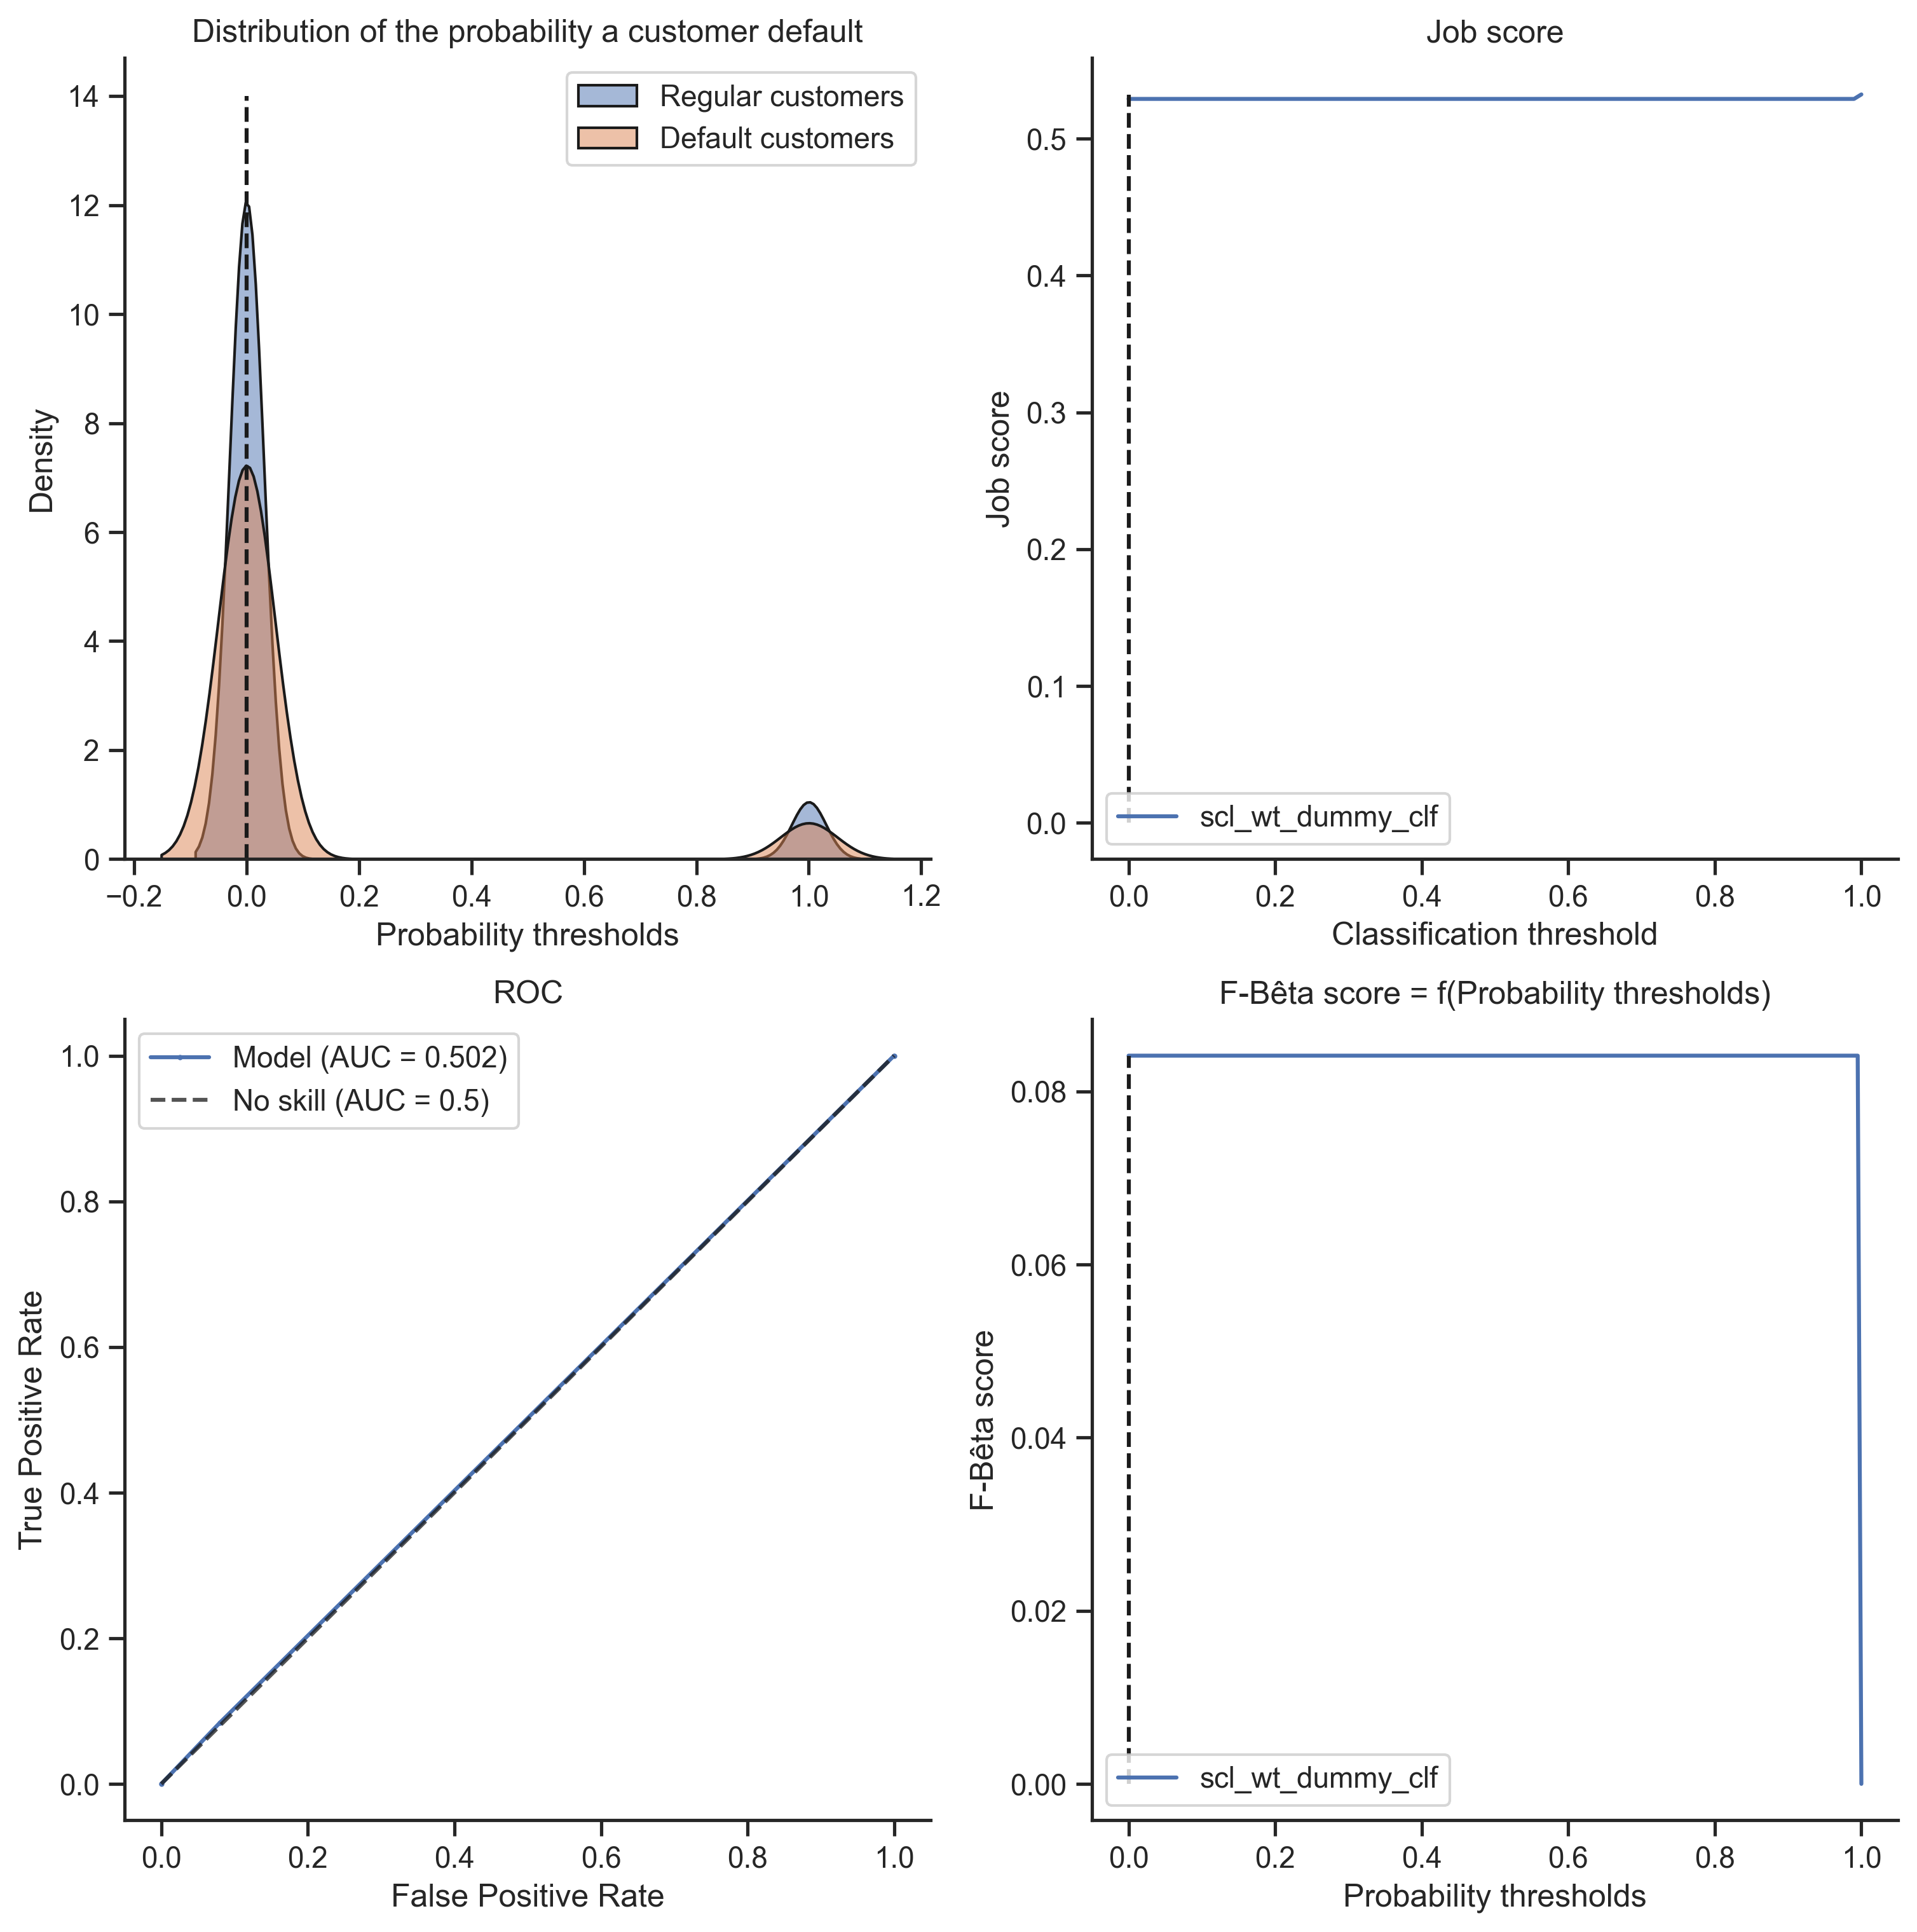

Confusion matrix:


Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2589250402126502, 0.6877454559709587, 0.391...   
scl_wt_rf_clf_opt          [0.179256226903877, 0.4320888546541277, 0.2344...   
scl_wt_xgb_clf_opt         [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.27738897319260064, 0.3533168213732829, 0.55...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [34]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, X_test=X_TEST, y_test = y_TEST, cv=0,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### b) Logistic regressor

#### i. Importation

In [35]:
from sklearn.linear_model import LogisticRegression

#### ii. Creation of the model pipeline

In [36]:
# Initiliaze the model with its default values.
model = LogisticRegression()

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'logi_reg_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, resampler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()), ['model', LogisticRegression()]])

#### iii. Hyperparameters tuning

In [37]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': LogisticRegression(),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ['model', LogisticRegression()]],
 'verbose': False}


In [38]:
### Hyperparameters tuning range setting ###

# Set the value's ranges to try for the selected hypermarameters to tune.
C = [x for x in np.logspace(start=-5, stop=2, num=8)]
penalty = [None, 'l2']


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = ({'model__C': C,
                     'model__penalty': penalty})


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
 'model__penalty': [None, 'l2']}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', LogisticRegression(class_weight='balanced')]])


In [39]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', LogisticRegression(class_weight='balanced')]])

Best score found:
 g_norm = 0.703

Best hyperparameters found:
 {'model__C': 1.0, 'model__penalty': 'l2'}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.769070
F-Bêta score of the optimal threshold found = 0.373
Highest F-Bêta score = 0.382
Job score: 0.703

----------------------------------------------------------------------------------------------------



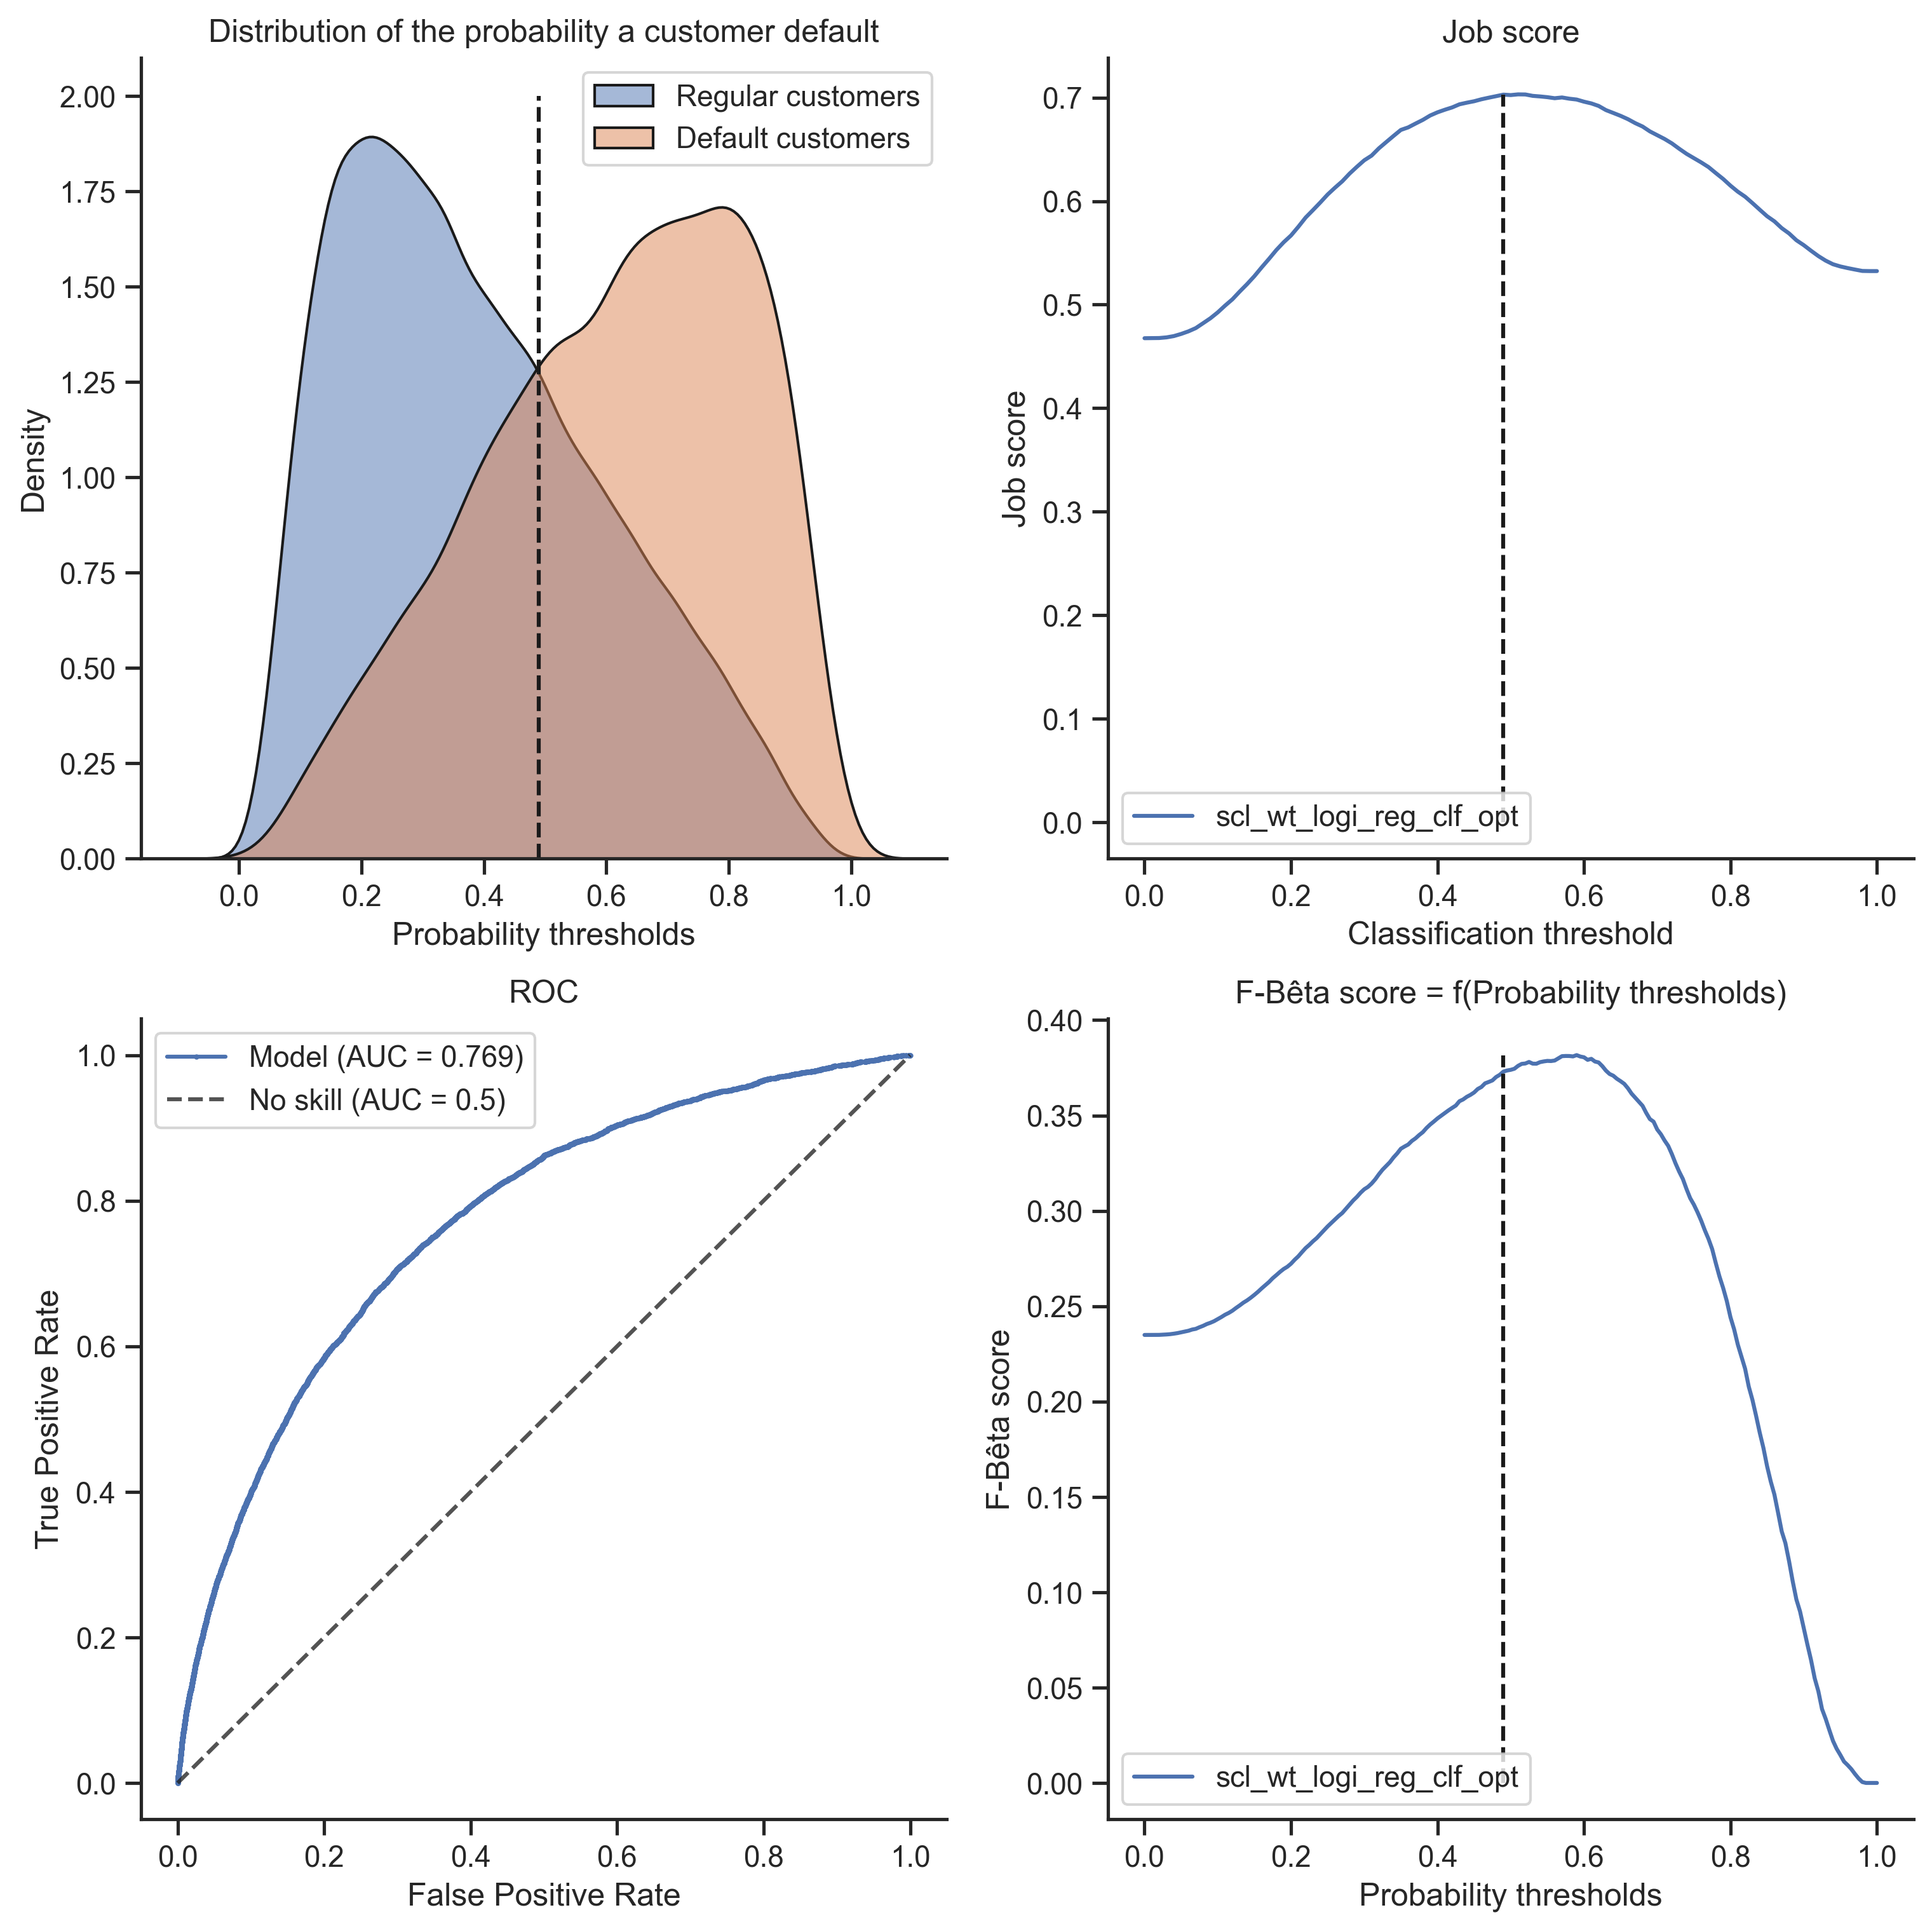

Confusion matrix:


Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.179256226903877, 0.4320888546541277, 0.2344...   
scl_wt_xgb_clf_opt         [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.27738897319260064, 0.3533168213732829, 0.55...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [40]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', LogisticRegression(class_weight='balanced')]])

ROC-AUC = 0.765802
F-Bêta score of the optimal threshold found = 0.363
Highest F-Bêta score = 0.375
Job score: 0.695

----------------------------------------------------------------------------------------------------



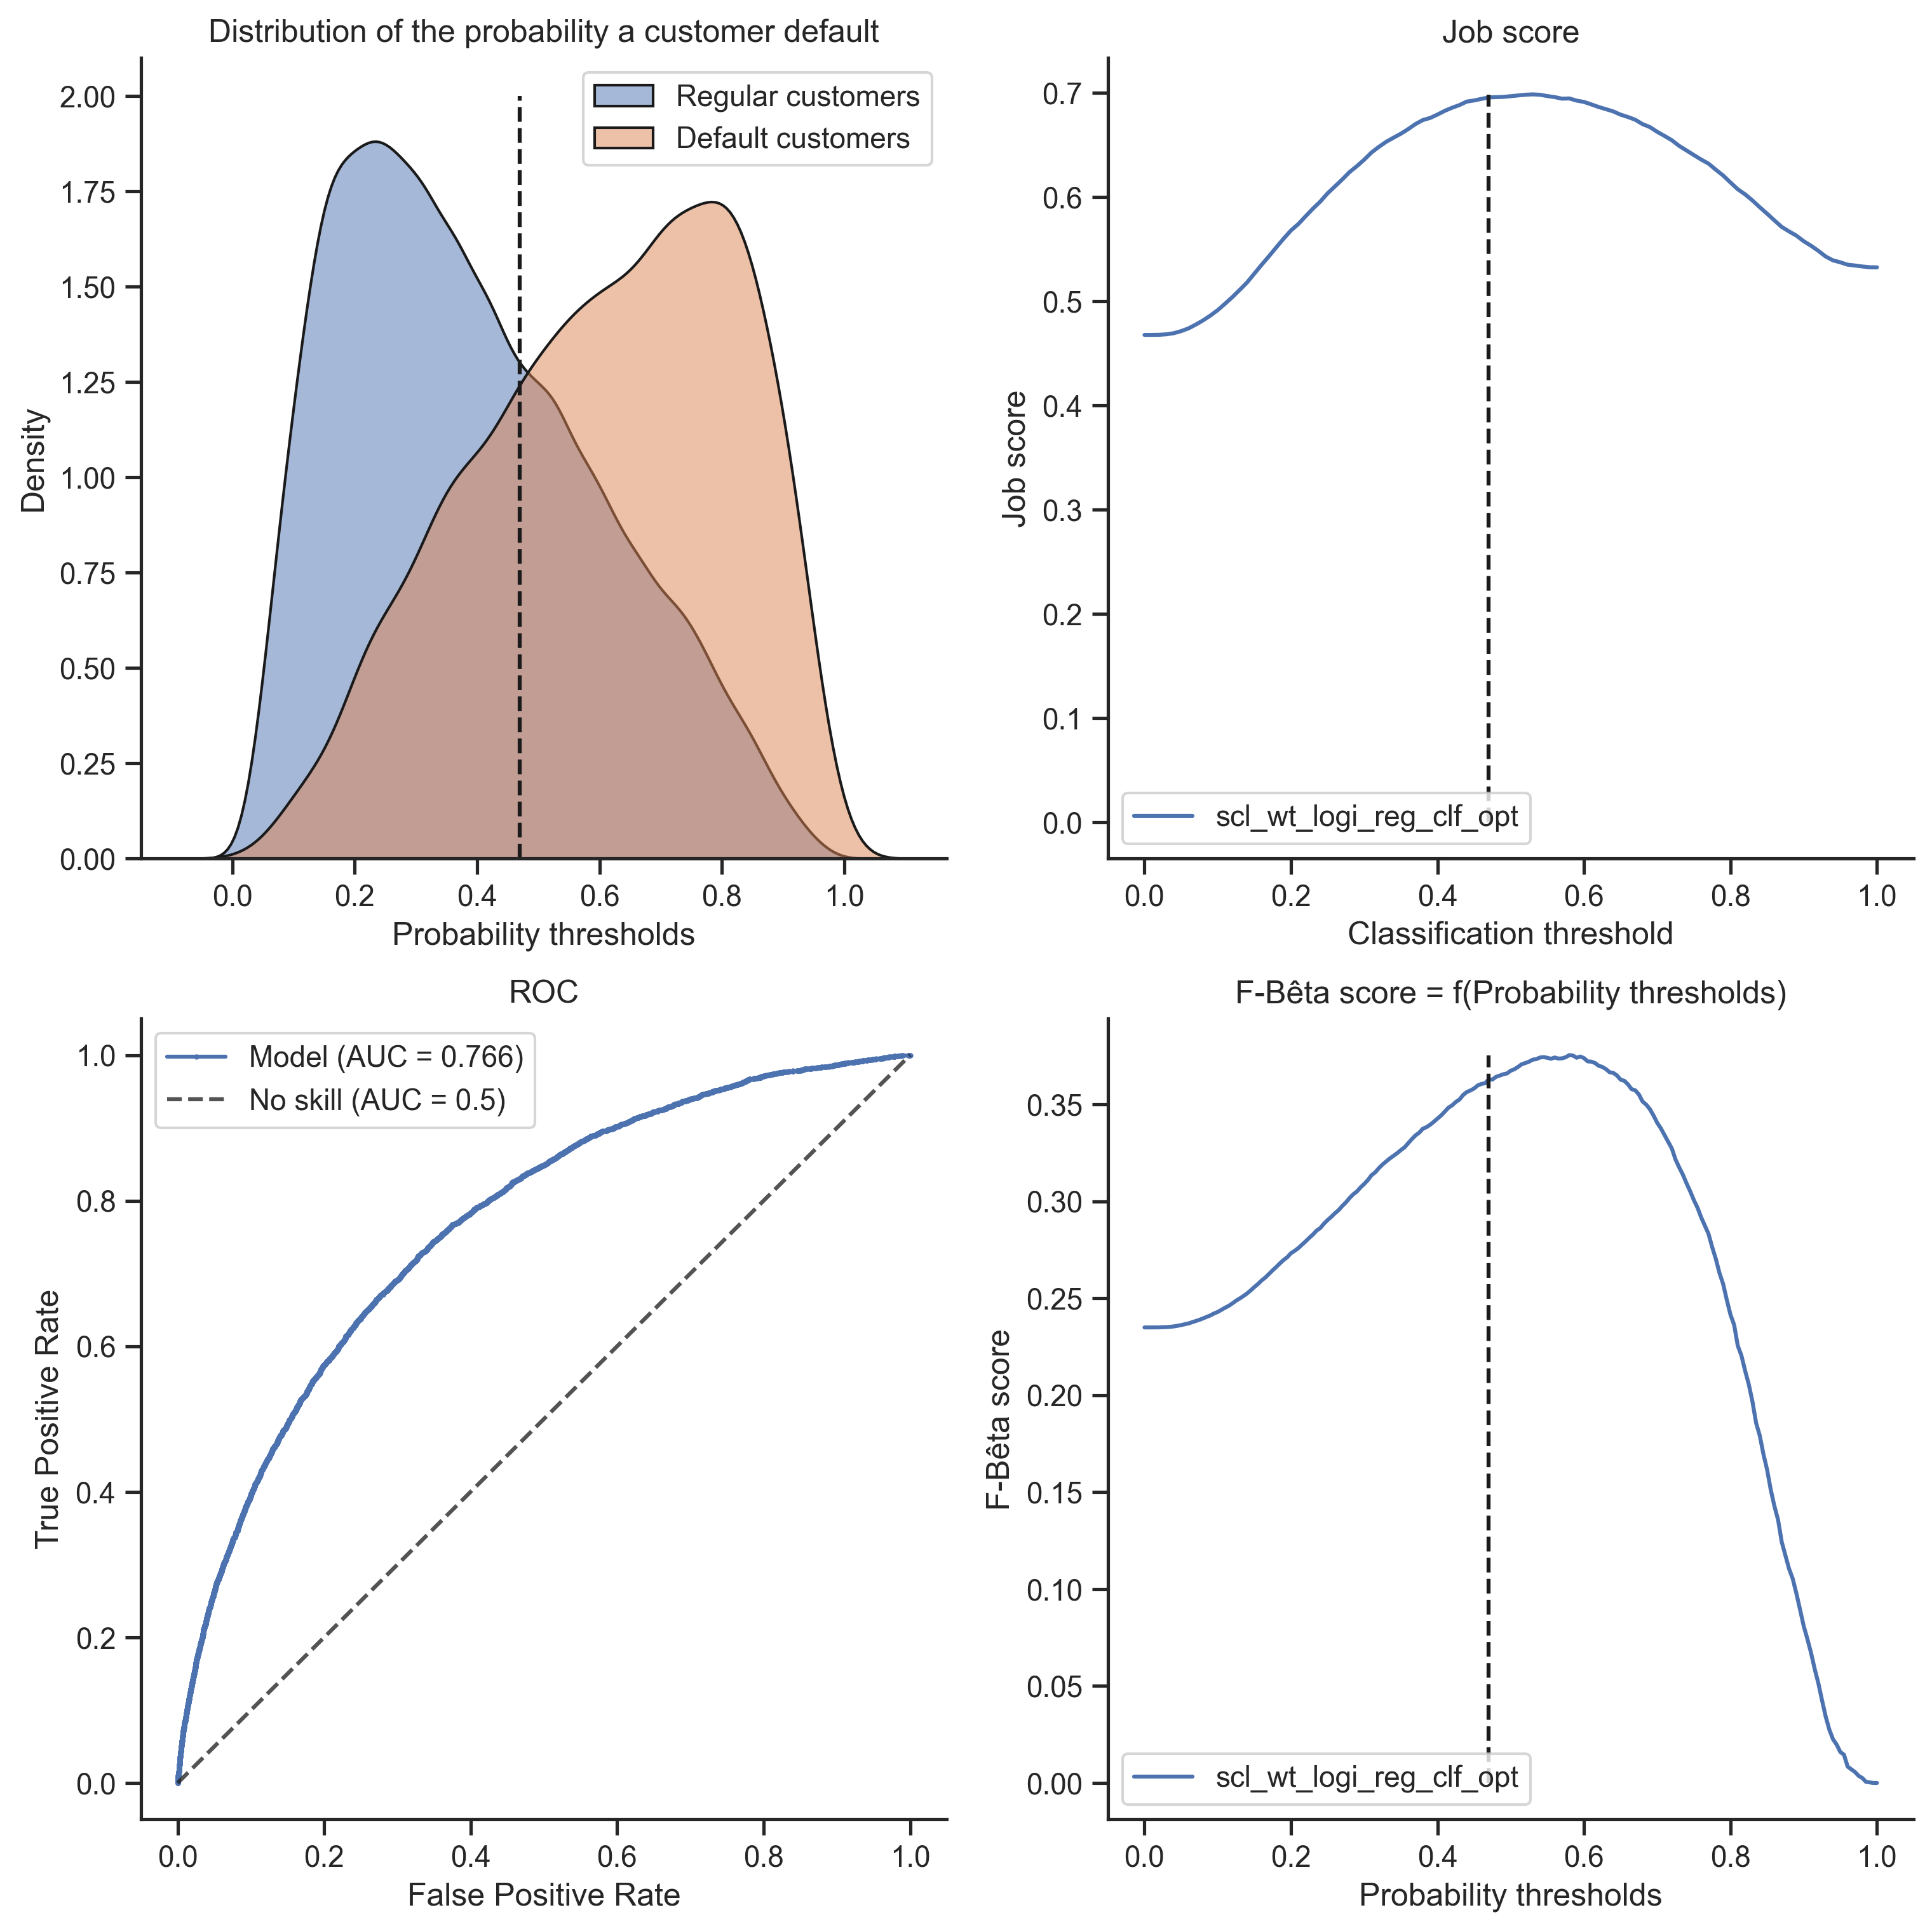

Confusion matrix:


The new score is inferior to the one already saved.
Dataframe not saved.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.179256226903877, 0.4320888546541277, 0.2344...   
scl_wt_xgb_clf_opt         [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.27738897319260064, 0.3533168213732829, 0.55...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [41]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, X_test=X_TEST, y_test=y_TEST, cv=0,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### c) Random forest

#### i. Importation

In [42]:
from sklearn.ensemble import RandomForestClassifier

#### ii. Creation of the model pipeline

In [43]:
# Initiliaze the model with its default values.
model = RandomForestClassifier()

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'rf_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, resampler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', RandomForestClassifier()]])

#### iii. Hyperparameters tuning

In [44]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': RandomForestClassifier(),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ['model', RandomForestClassifier()]],
 'verbose': False}


In [45]:
### Hyperparameters tuning range setting ###

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 50, num = 51)][1:]

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, num = 11)]

# Minimum number of samples required to split a node.
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 11)]
min_samples_split[0] = 2

# Use or don't bootstrap samples.
#bootstrap = [True, False]

# Number of features to consider at every split.
max_features = [None, 'auto', 'sqrt', 'log2']


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_samples_split': min_samples_split,
                    #'model__bootstrap': bootstrap,
                    'model__max_features': max_features,
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__max_features': [None, 'auto', 'sqrt', 'log2'],
 'model__min_samples_split': [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                         31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                         45, 46, 47, 48, 49, 50]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', RandomForestClassifier(class_weight='balanced')]])


In [46]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=None,
                                        min_samples_split=100,
                                        n_estimators=33)]])

Best score found:
 g_norm = 0.675

Best hyperparameters found:
 {'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_split': 100, 'model__n_estimators': 33}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.745769
F-Bêta score of the optimal threshold found = 0.357
Highest F-Bêta score = 0.362
Job score: 0.687

----------------------------------------------------------------------------------------------------



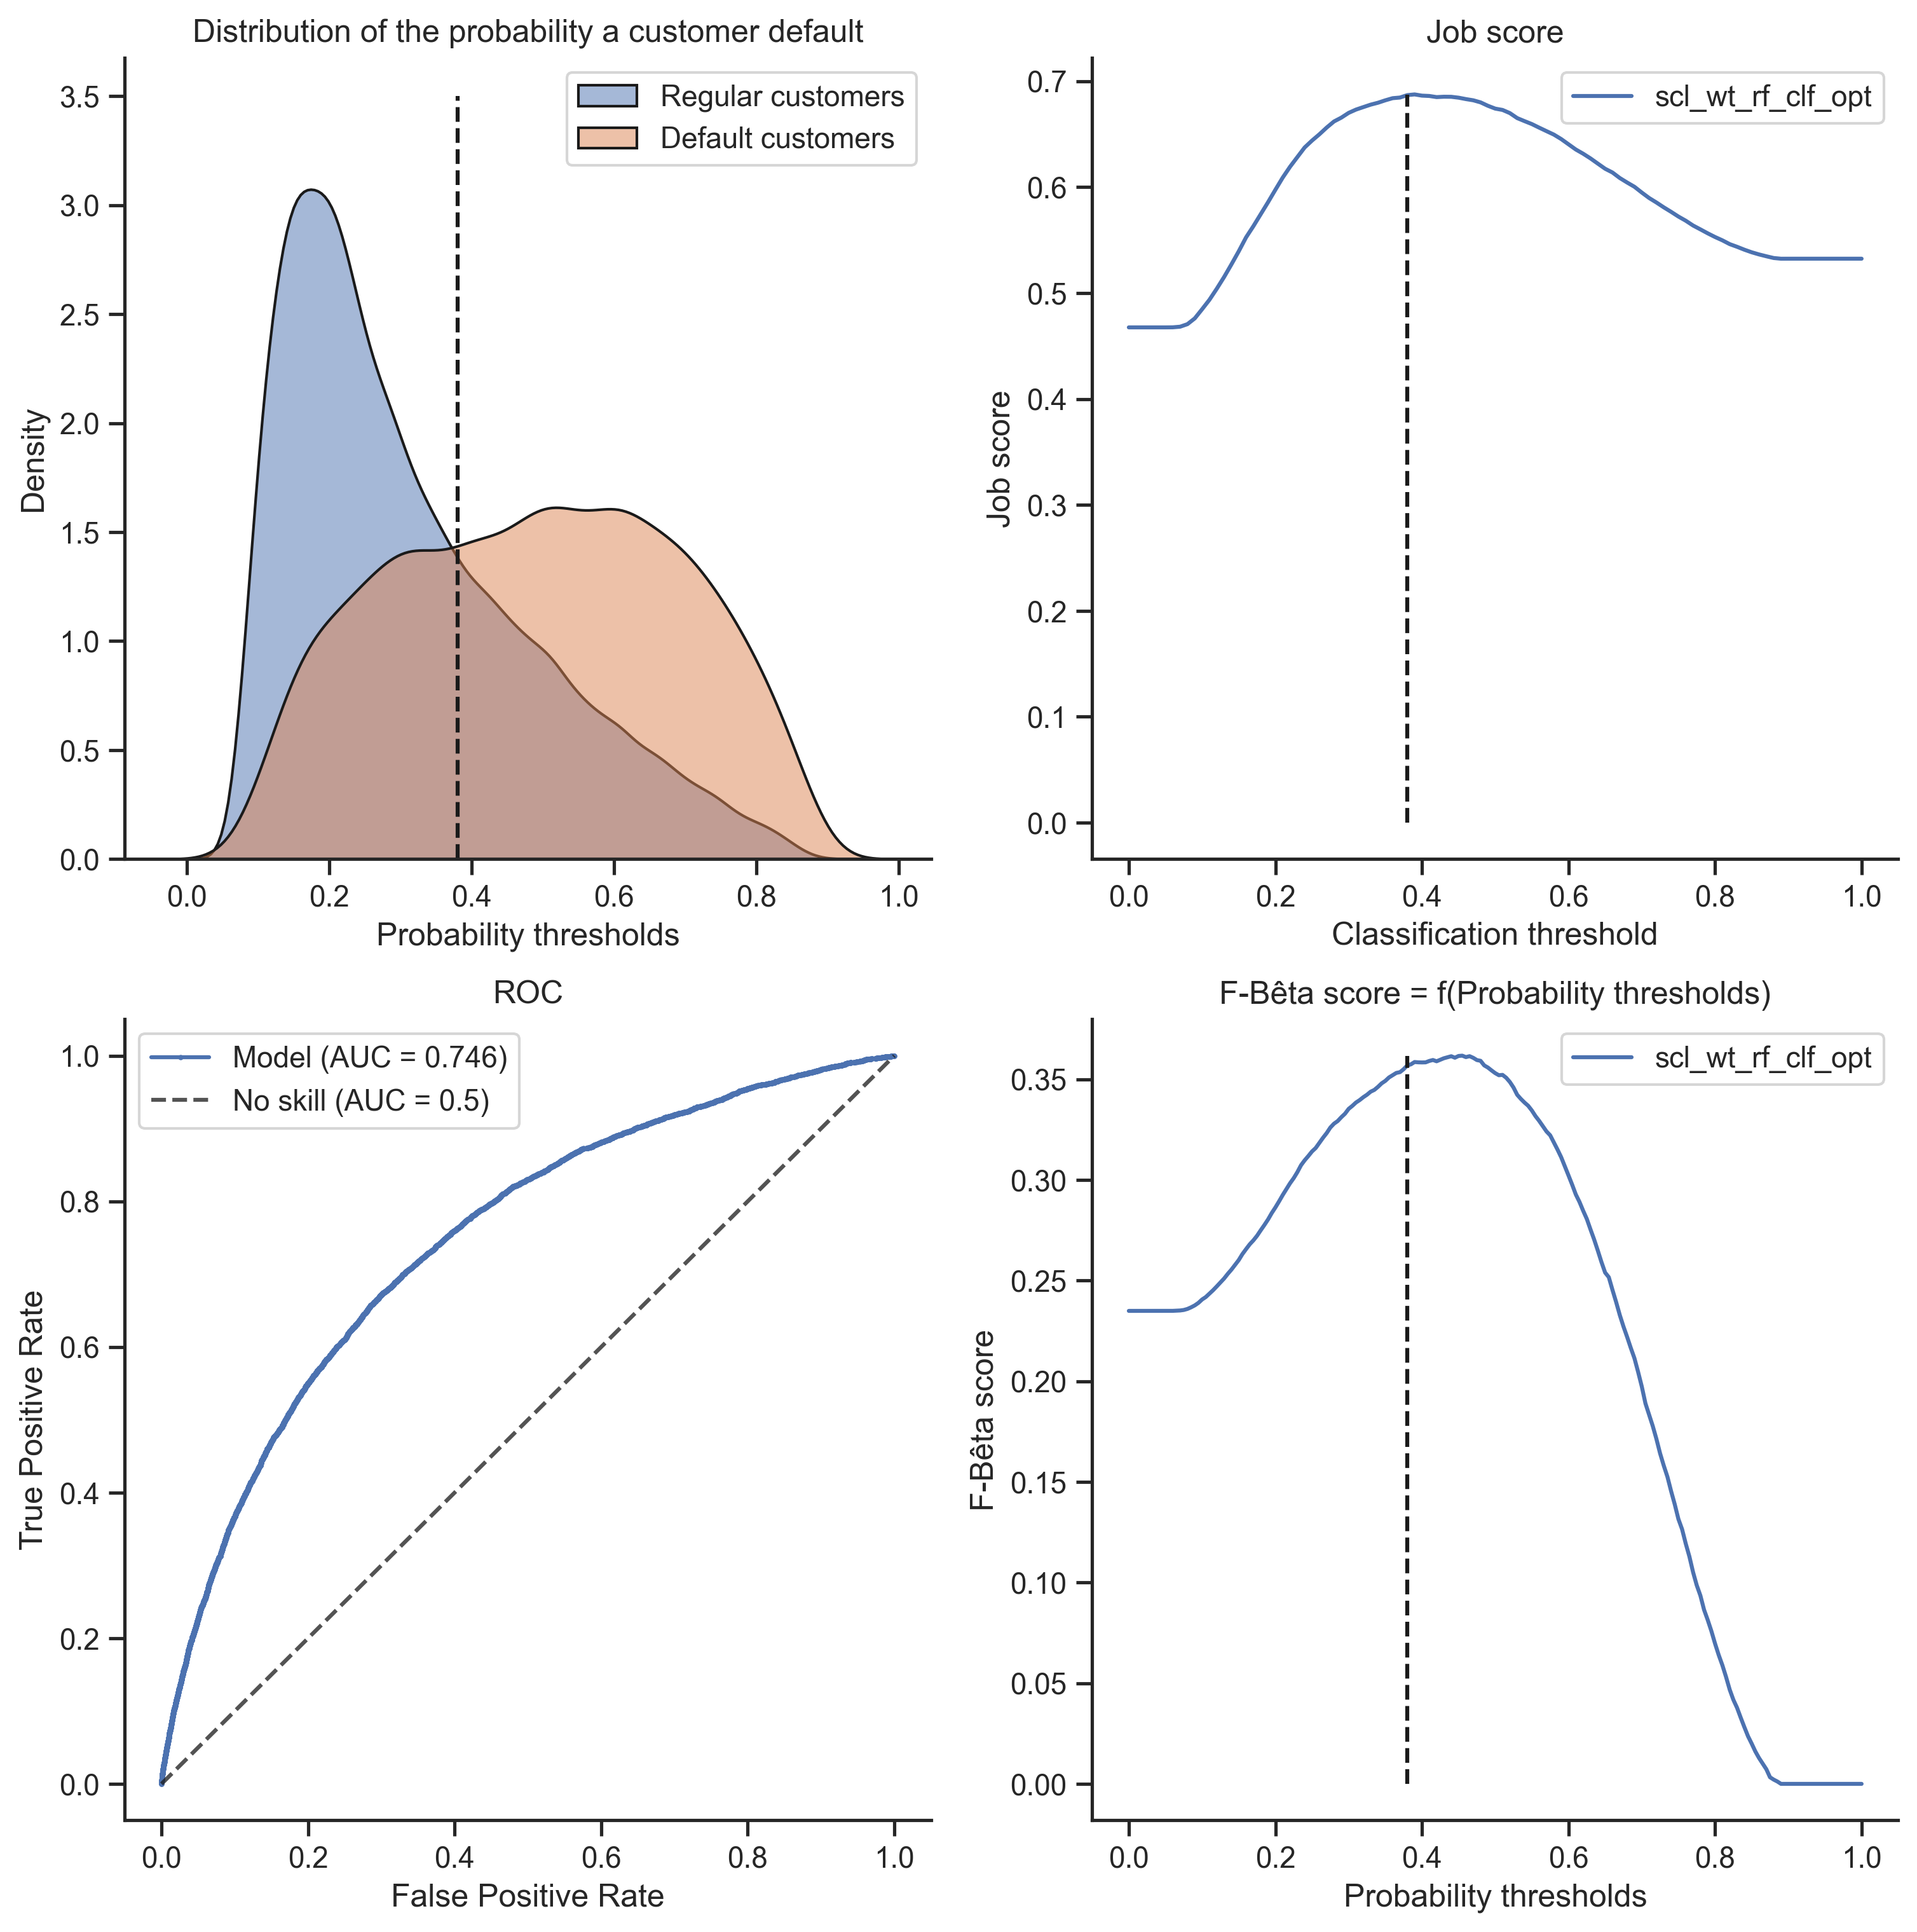

Confusion matrix:


Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.12317786590438161, 0.5132001342020533, 0.17...   
scl_wt_xgb_clf_opt         [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.27738897319260064, 0.3533168213732829, 0.55...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

CPU times: total: 20min 31s
Wall time: 20min 24s


In [47]:
%%time

# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=None,
                                        min_samples_split=100,
                                        n_estimators=33)]])

ROC-AUC = 0.752079
F-Bêta score of the optimal threshold found = 0.353
Highest F-Bêta score = 0.364
Job score: 0.687

----------------------------------------------------------------------------------------------------



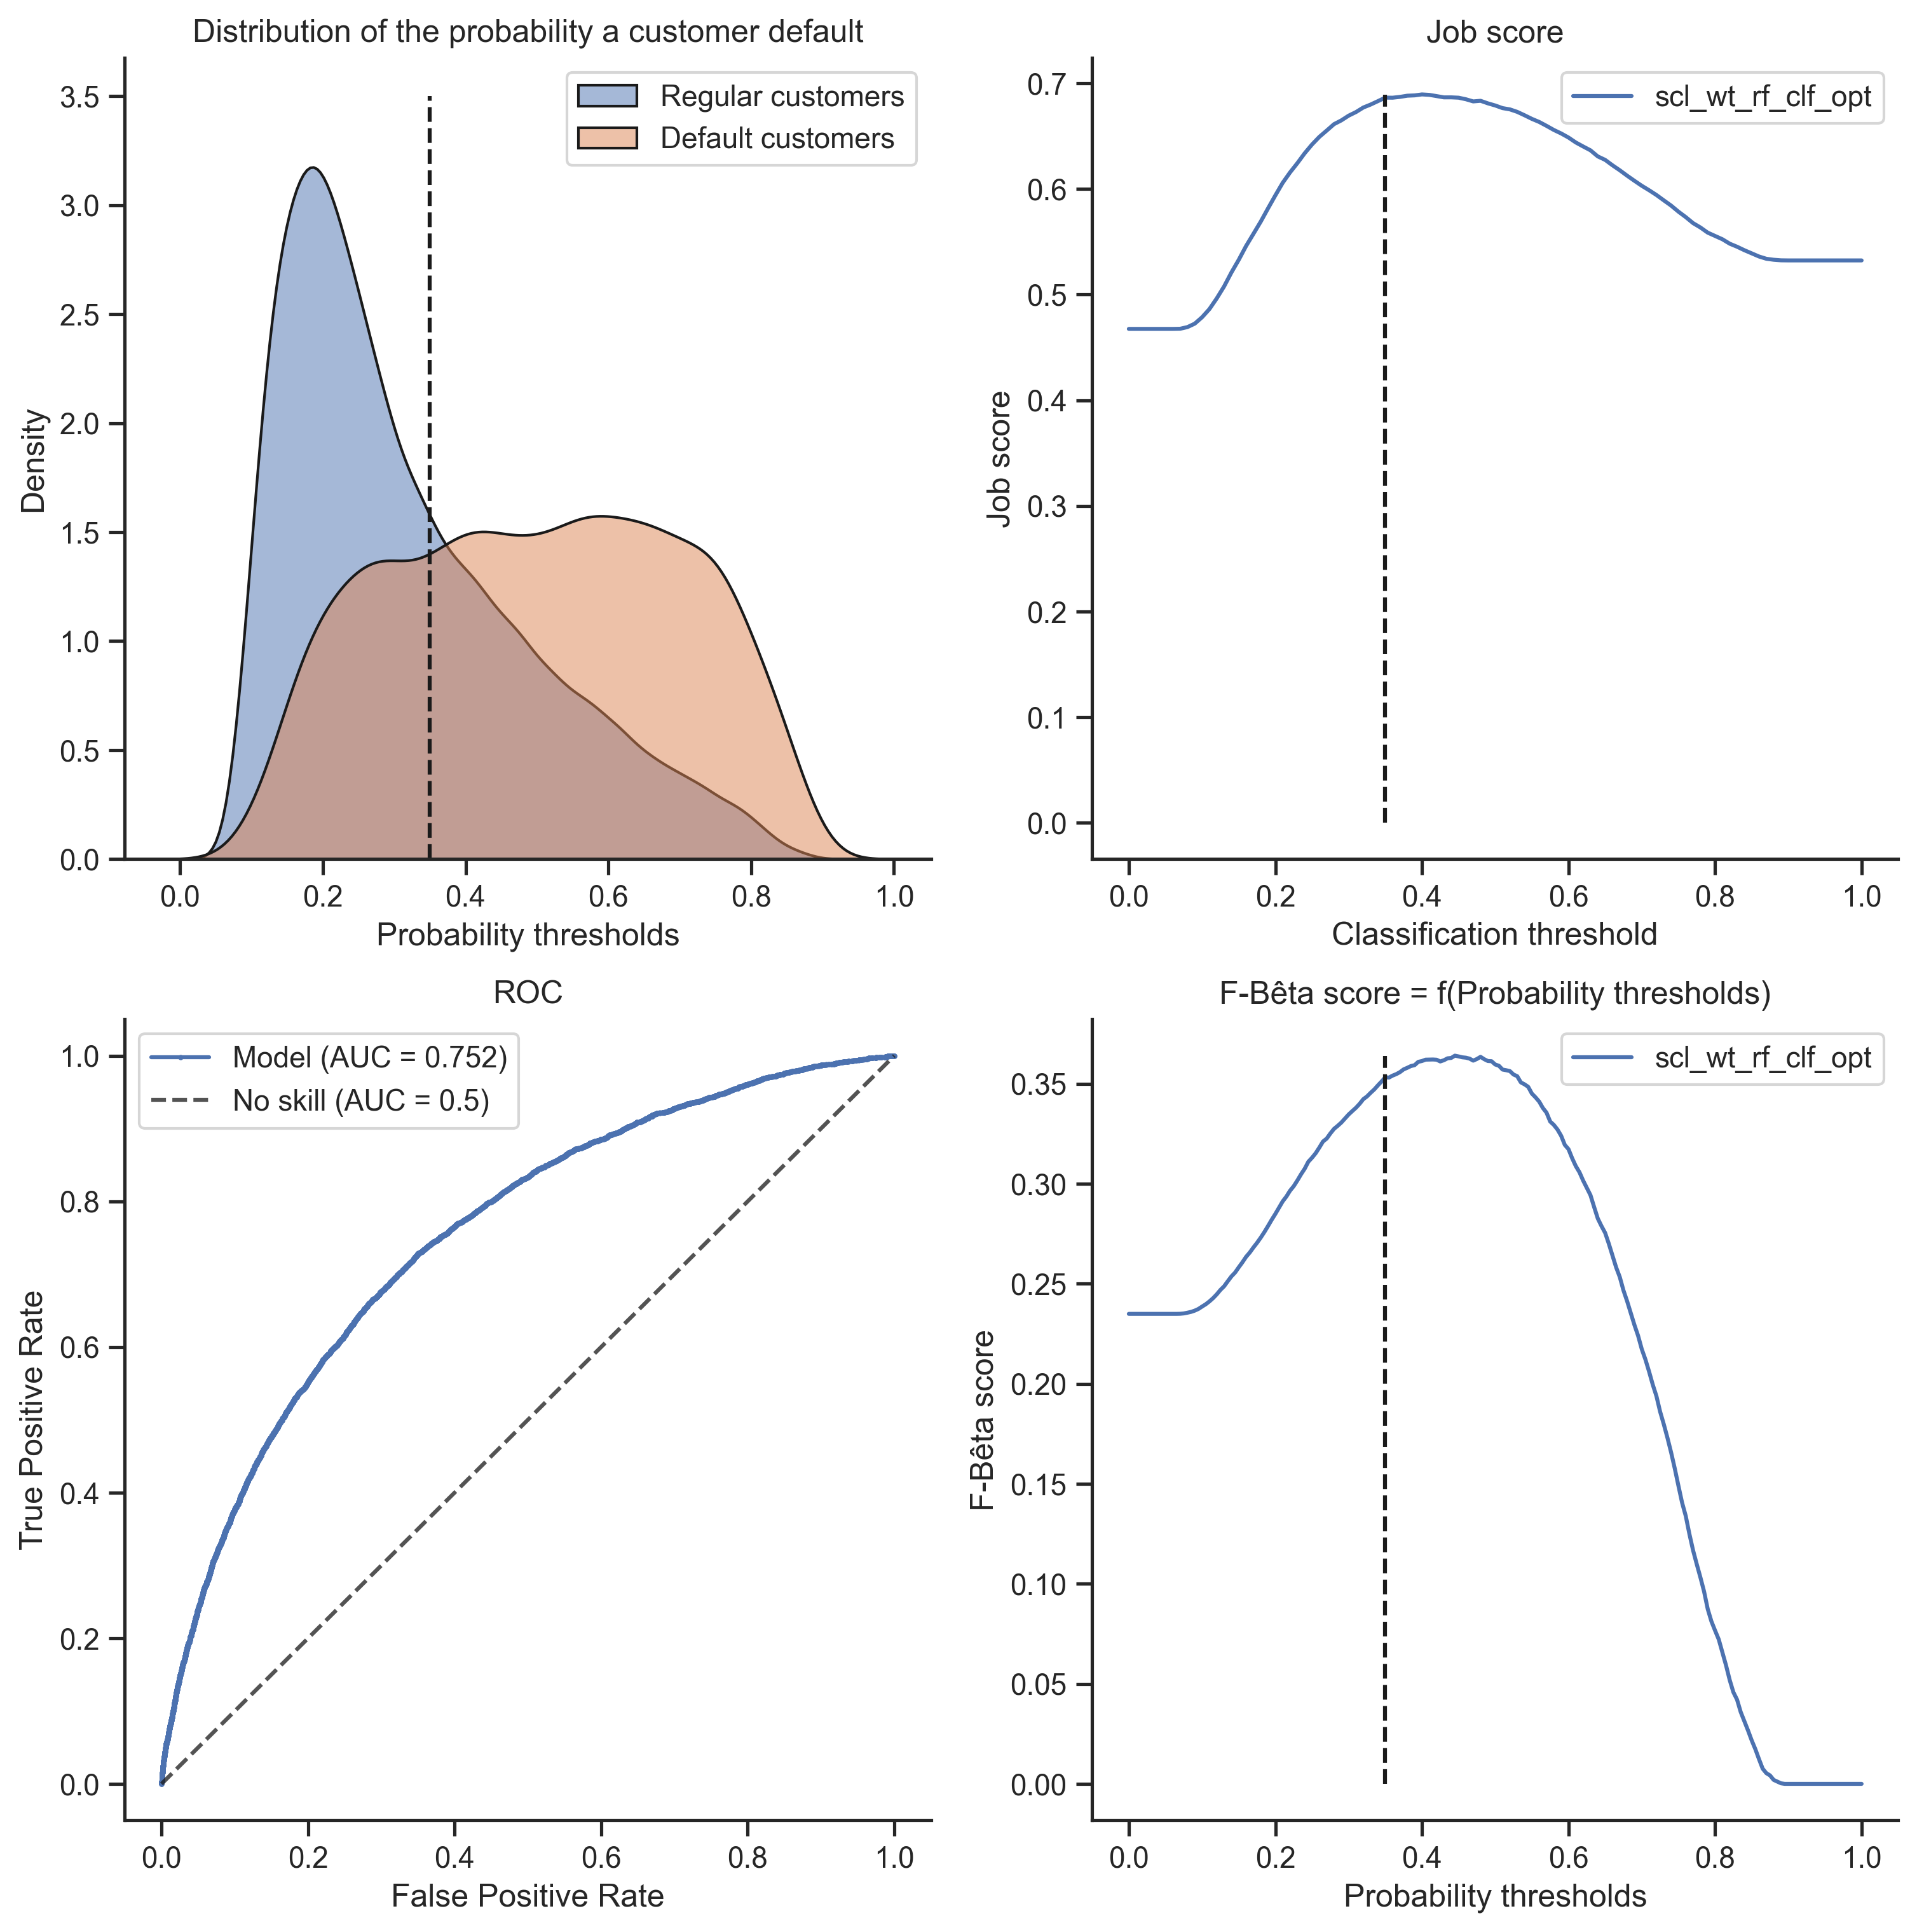

Confusion matrix:


Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.12317786590438161, 0.5132001342020533, 0.17...   
scl_wt_xgb_clf_opt         [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.24993490088914644, 0.3478649487790224, 0.58...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

CPU times: total: 5min 31s
Wall time: 5min 24s


In [48]:
%%time

# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, X_test=X_TEST, y_test=y_TEST, cv=0,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### d) XGBoosting

#### i. Importation

In [49]:
import xgboost as xgb
from xgboost import XGBClassifier

print('XGBoost version:', xgb.__version__)

XGBoost version: 1.7.5


#### ii. Creation of the model pipeline

In [50]:
# Initiliaze the model with its default values.
model = XGBClassifier(objective='binary:logistic', seed=0)

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'xgb_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, resampler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...)]])

#### iii. Hyperparameters tuning

In [51]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'model__base_score': None,
 'model__booster': None,
 'model__callbacks': None,
 'model__colsample_bylevel': None,
 'model__colsample_bynode': None,
 'model__colsample_bytree': None,
 'model__early_stopping_rounds': None

In [52]:
### Get the optimal number of trees thanks to early stopping ###

# Set the number of runs to perform.
n_es_loop = 5

# Set the xgboost evaluation metric for the early stopping.
# NB: if more than one evaluation metric are given the last one is used for early stopping
model.set_params(eval_metric='auc')

# Run the set amount of loops to get the most promising range of number of trees to get.
verbose = 0
l_n_iters = []
l_scores = []
l_n_trees = []
count = 0
for count in range(n_es_loop):
    model.fit(X_TRAIN, y_TRAIN, early_stopping_rounds=50, eval_set=[(X_TEST, y_TEST)], verbose=verbose)
    l_scores.append(model.best_score)
    l_n_iters.append(model.best_iteration)
    l_n_trees.append(model.best_ntree_limit)
    if verbose != 0:
        print()

# Show the results.    
print("Averages gotten on {0} loops. \
      \n Average score: {1}\n Average number of iterations: {2}\n Average number of trees: {3}".\
      format(n_es_loop, np.mean(l_scores), np.mean(l_n_iters), np.mean(l_n_trees)))

Averages gotten on 5 loops.       
 Average score: 0.7621325791497912
 Average number of iterations: 27.0
 Average number of trees: 28.0


Finally, it appears that the optimal number of estimators depends too much on the other hyperparameters.<br>
=> The value is not set as default and will also by used in the searchCV.

In [53]:
### Hyperparameters tuning range setting ###

# 1. Forest's hyperparameters.

# Learning rate.
eta = [round(x, 2) for x in np.linspace(start=0.02, stop=0.3, num=15)]
#learning_rate = [x for x in np.logspace(-4, 0, 5)], # default 0.1 

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(2, 50, 25)]


# 2. Tree's hyperparameters.

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, 11)]

# Defines the minimum sum of weights of all observations required in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Specify the minimum loss reduction required to make a split.
gamma = [x for x in np.linspace(0, 0.2, 11)] #uniform(0, 0.5)

# Denotes the fraction of observations to be random samples for each tree.
subsample = [x for x in np.linspace(0.5, 1.0, 6)]

# Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [x for x in np.linspace(0.5, 1.0, 6)]


# 3. Regulators' hyperparameters.

# L2 regularization term on weights (analogous to Ridge regression).
lambda_regul = [x for x in np.logspace(-4, 0, 5)], # default 0.1

# L1 regularization term on weight (analogous to Lasso regression)
alpha_regul = [x for x in np.logspace(-4, 0, 5)], # default 0.1 


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__eta': eta,
                    'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_child_weight': min_child_weight,
                    'model__gamma': gamma,
                    'model__subsample': subsample,
                    'model__colsample_bytree': colsample_bytree
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(scale_pos_weight=9) # NB: scale_pos_weight = TN / TP


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'model__eta': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22,
                0.24, 0.26, 0.28, 0.3],
 'model__gamma': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18,
                  0.2],
 'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'model__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
                         32, 34, 36, 38, 40, 42, 44, 46, 48, 50],
 'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early

In [54]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.24,
                               eval_metric='auc', feature_types=None,
                               gamma=0.02, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=Non

#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.721827
F-Bêta score of the optimal threshold found = 0.336
Highest F-Bêta score = 0.338
Job score: 0.668

----------------------------------------------------------------------------------------------------



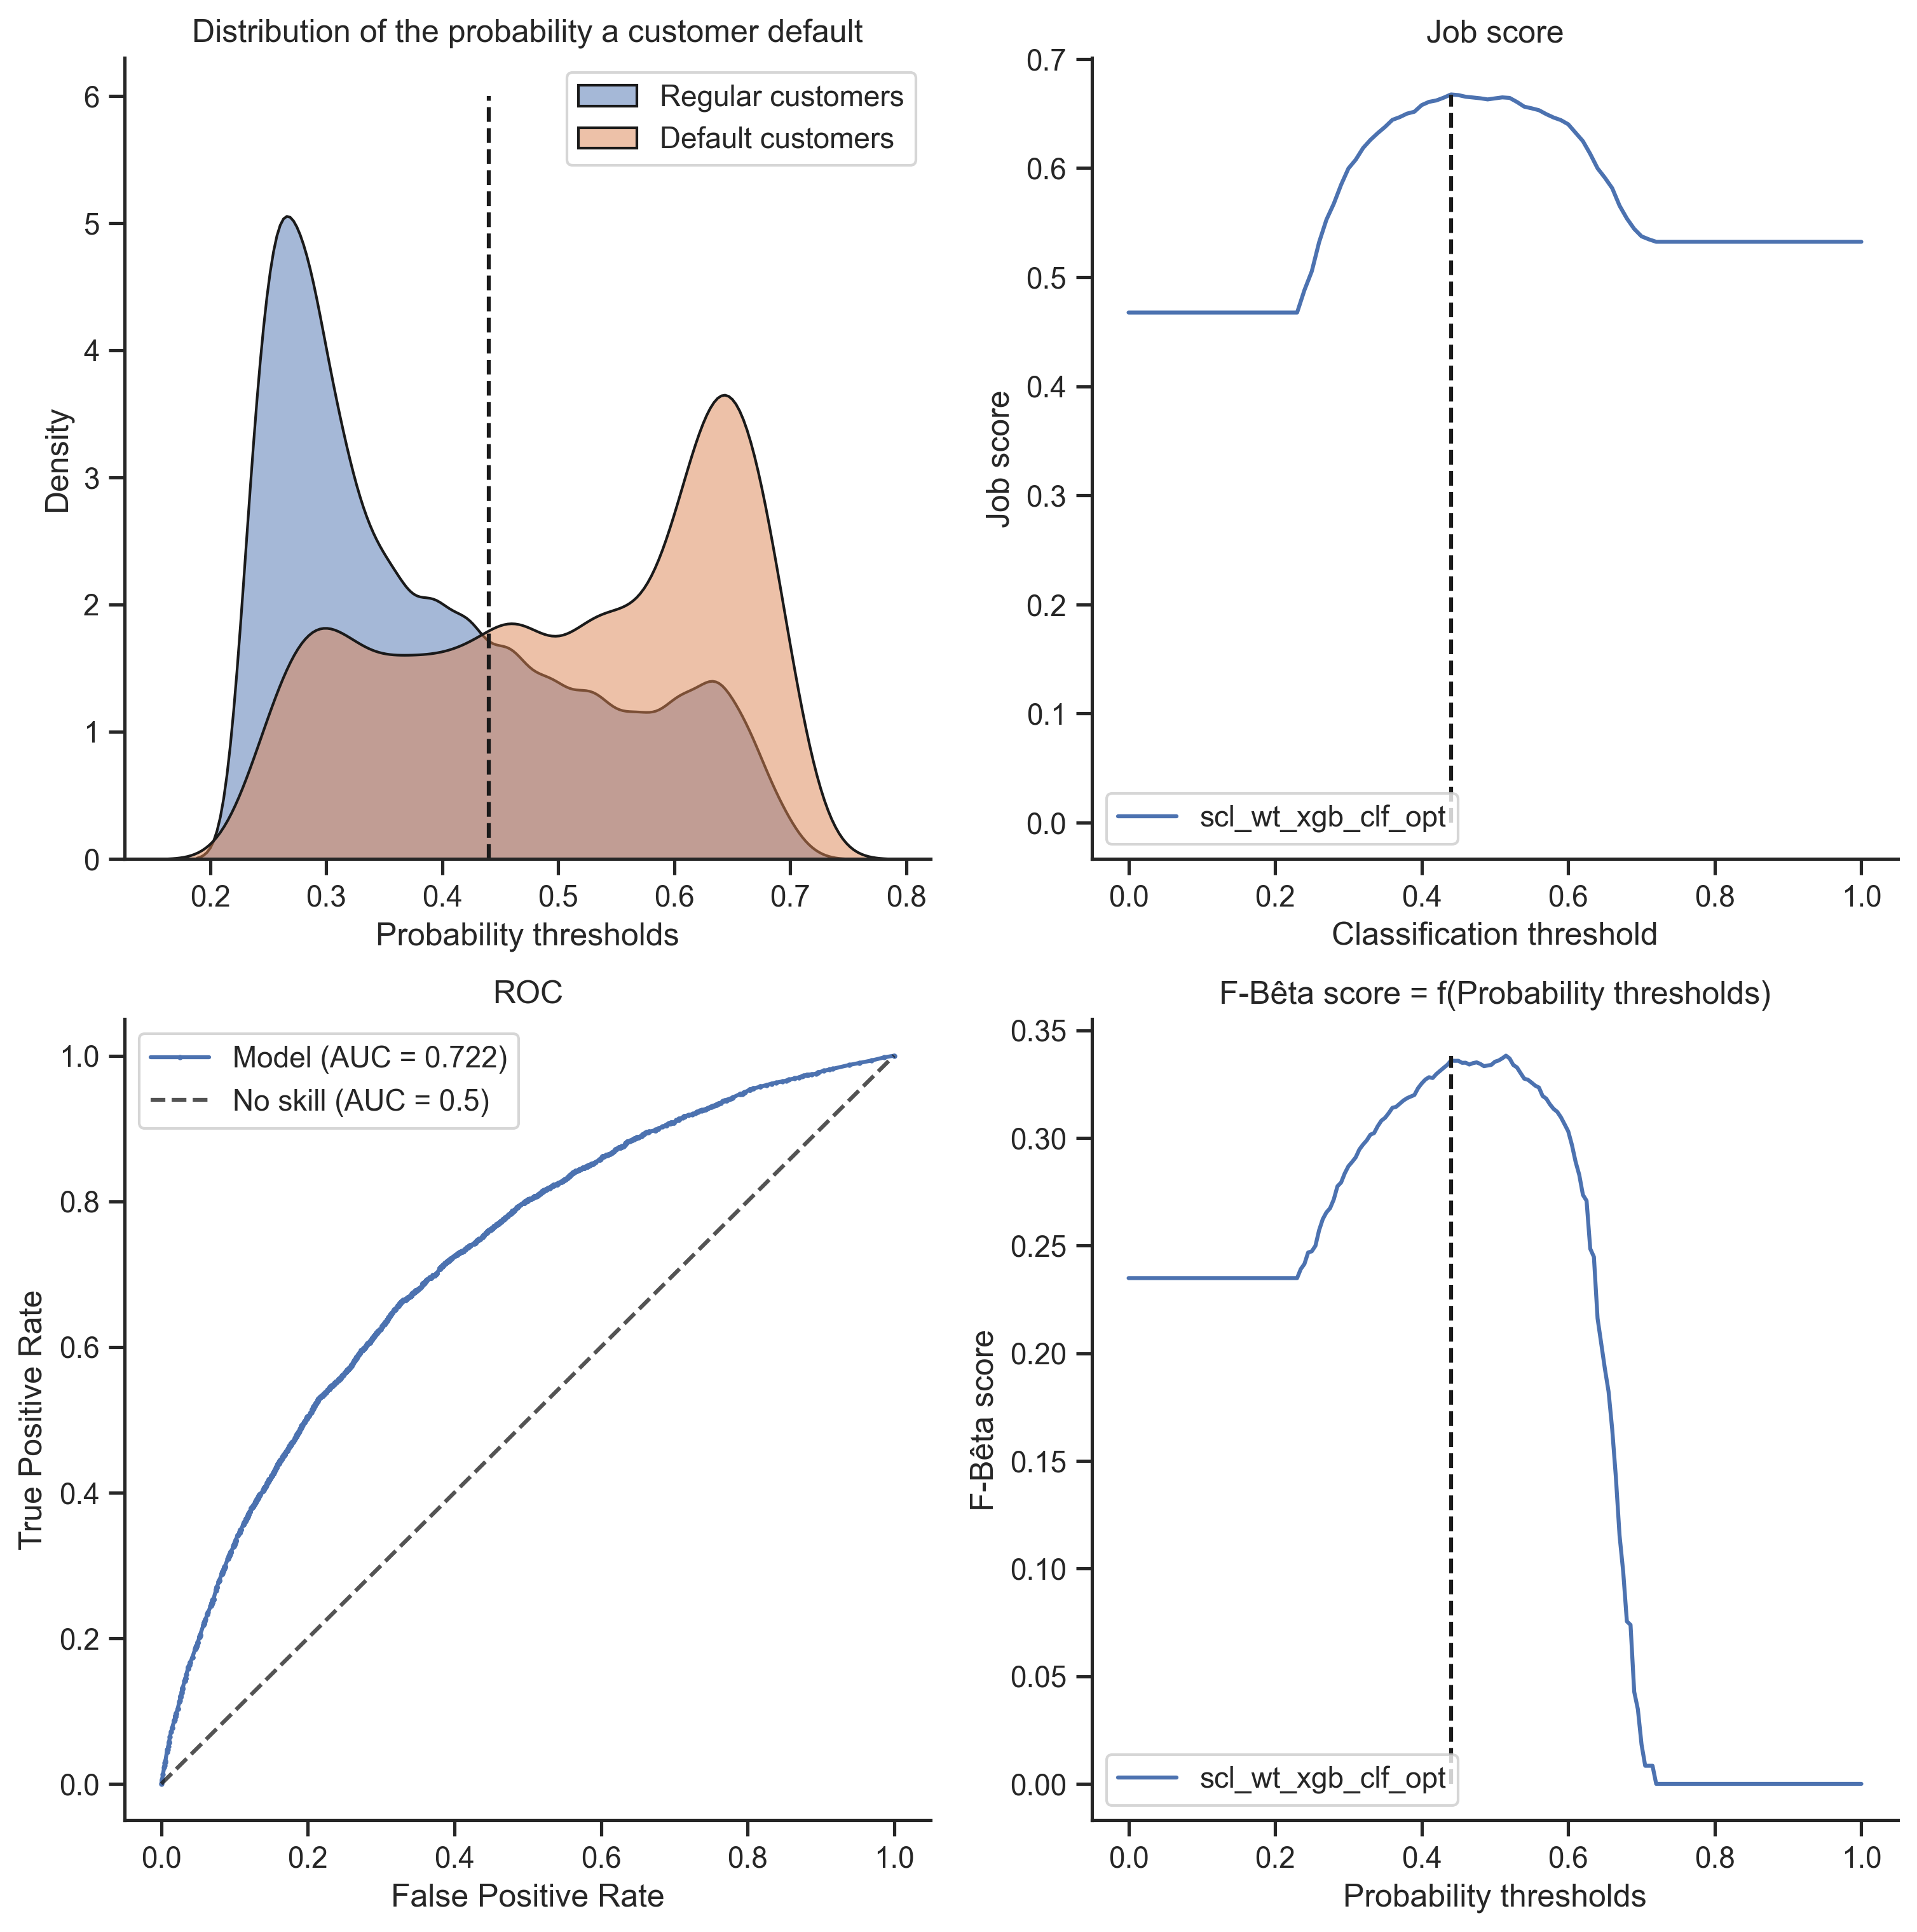

Confusion matrix:


Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.12317786590438161, 0.5132001342020533, 0.17...   
scl_wt_xgb_clf_opt         [0.27779642, 0.5845683, 0.24471557, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.24993490088914644, 0.3478649487790224, 0.58...   
scl_wt_xgb_clf_opt         [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [55]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.24,
                               eval_metric='auc', feature_types=None,
                               gamma=0.02, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               n_estimators=12, n_j

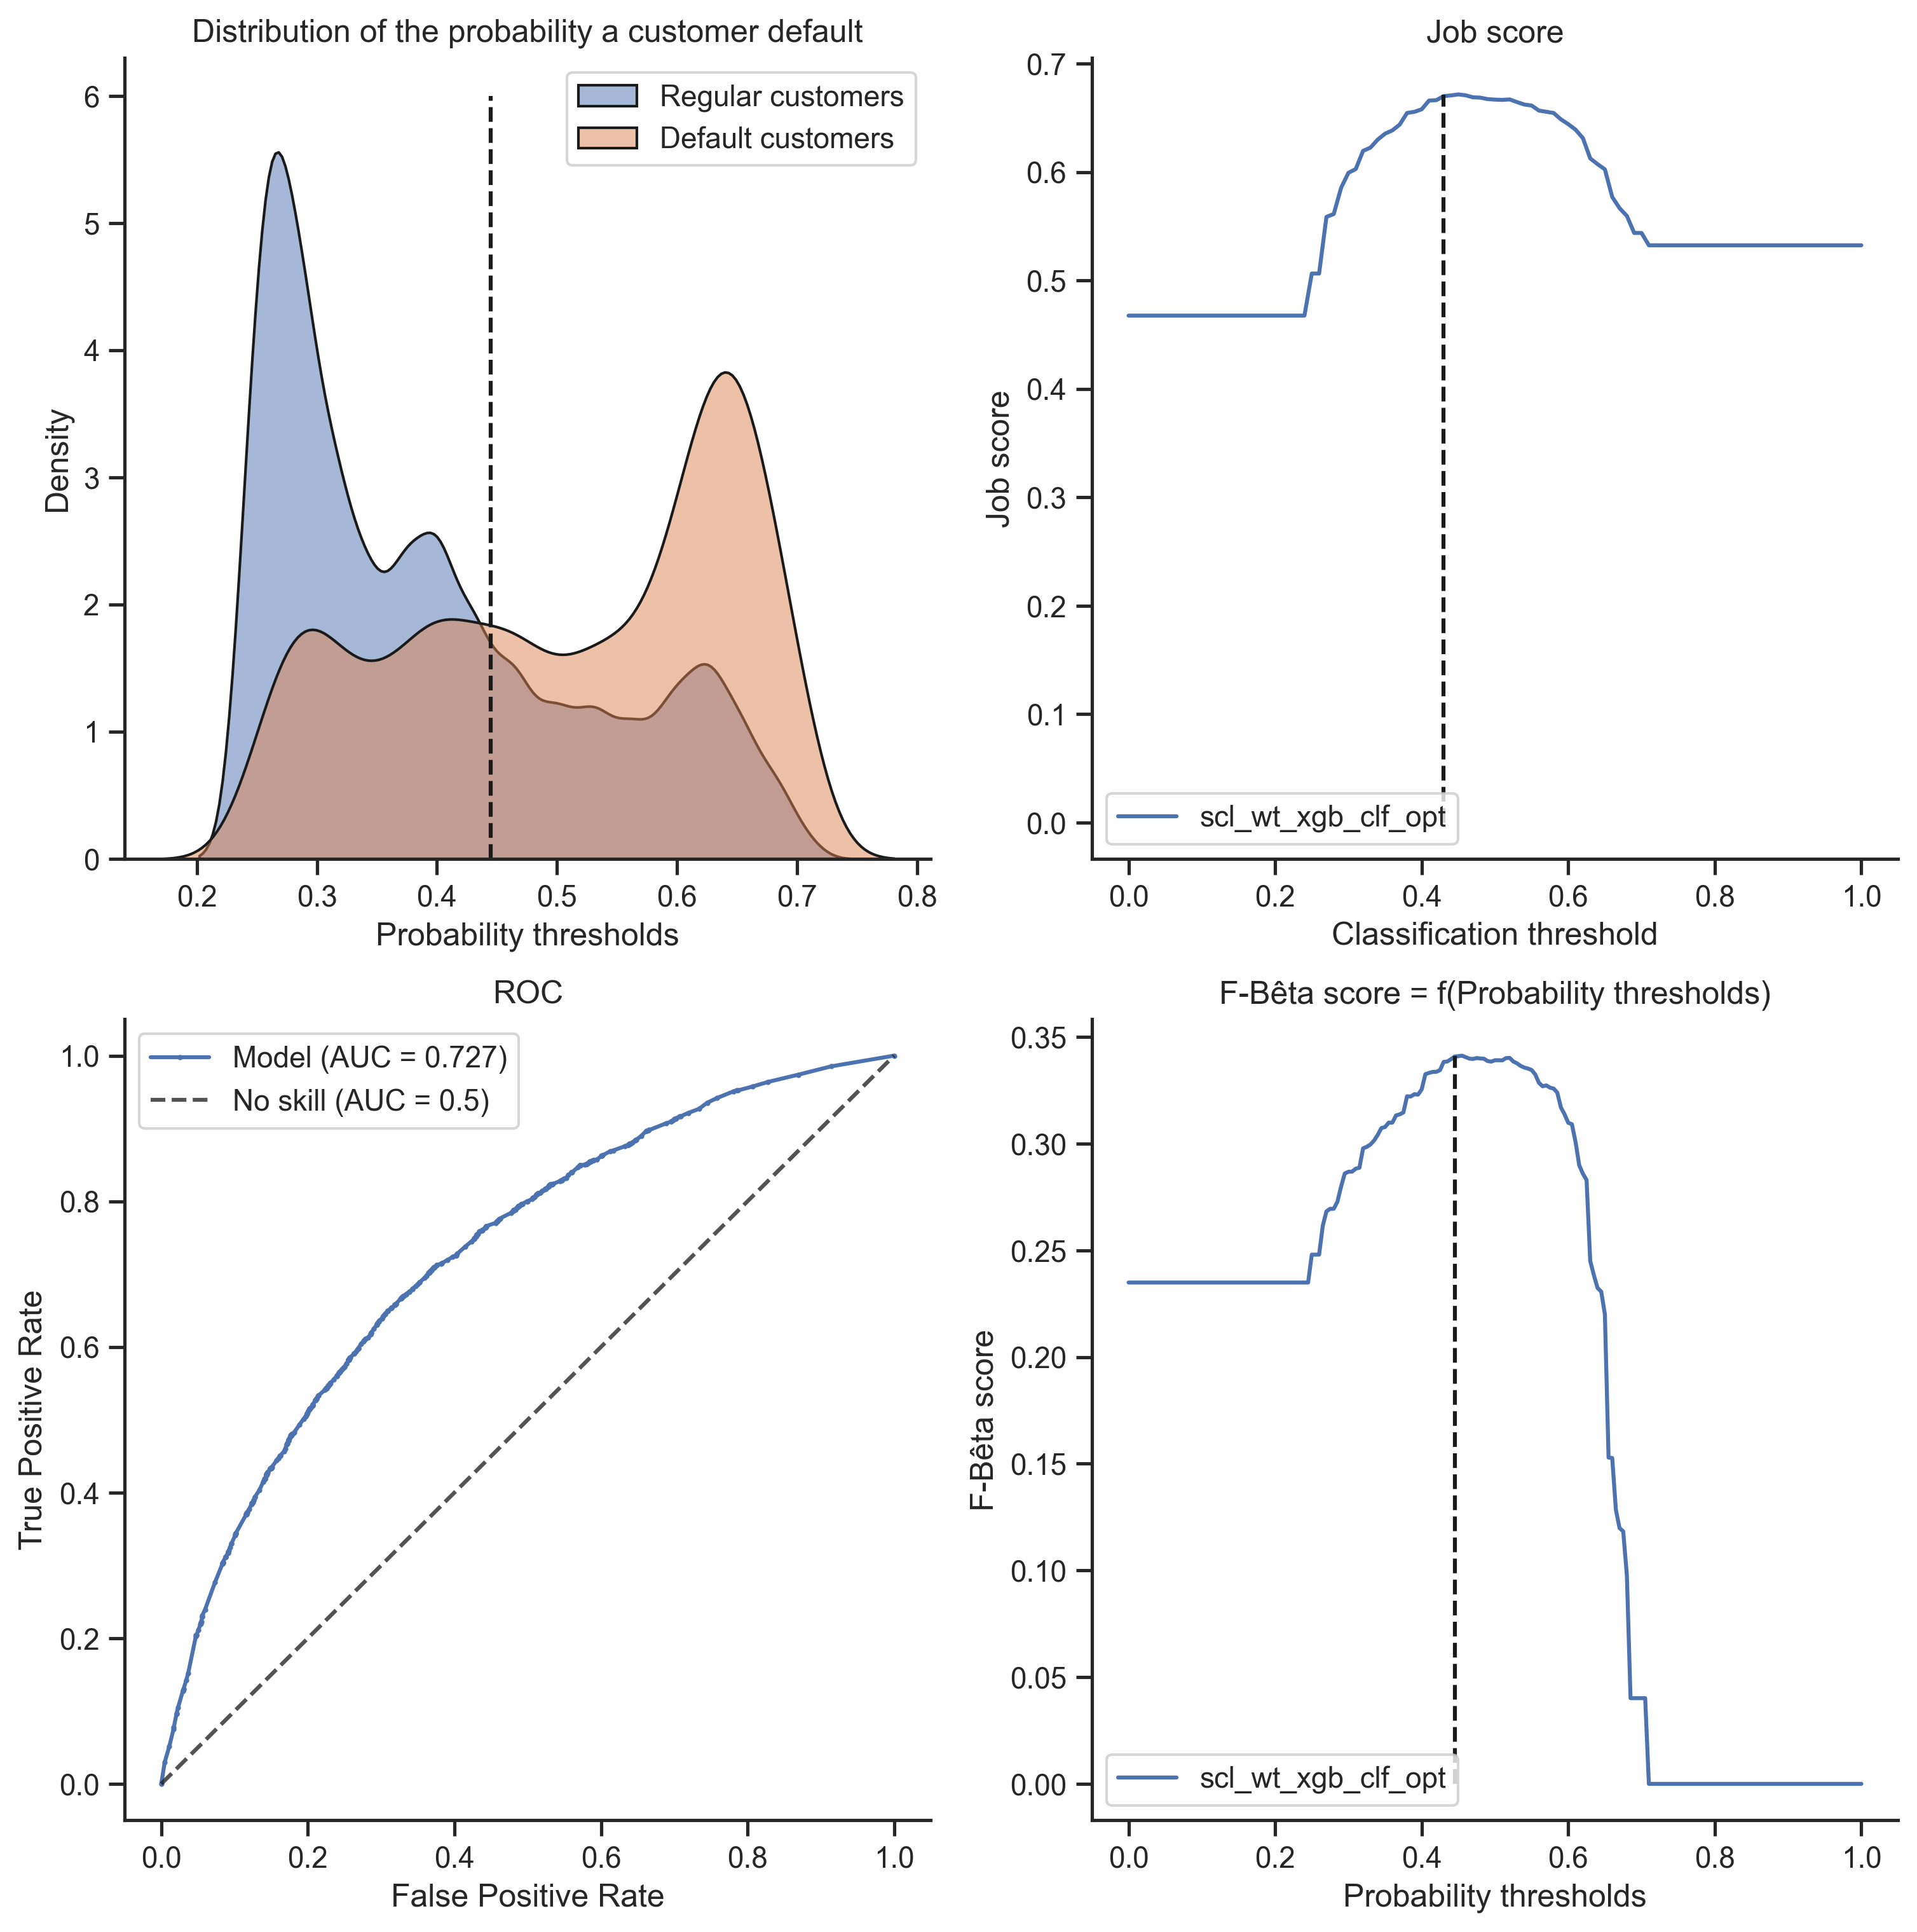

Confusion matrix:


Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.12317786590438161, 0.5132001342020533, 0.17...   
scl_wt_xgb_clf_opt         [0.27779642, 0.5845683, 0.24471557, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.24993490088914644, 0.3478649487790224, 0.58...   
scl_wt_xgb_clf_opt         [0.29466602, 0.35203174, 0.46066236, 0.3300050...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [56]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, X_test=X_TEST, y_test=y_TEST, cv=0,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### e) LightGBM

#### i. Importation

In [57]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

print('lightgbm version:', lgbm.__version__)

lightgbm version: 3.3.5


#### ii. Creation of the model pipeline

In [58]:
# Initiliaze the model with its default values.
model = LGBMClassifier(objective='binary', random_state=0)

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'lgbm_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, resampler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', LGBMClassifier(objective='binary', random_state=0)]])

#### iii. Hyperparameters tuning

In [59]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': LGBMClassifier(objective='binary', random_state=0),
 'model__boosting_type': 'gbdt',
 'model__class_weight': None,
 'model__colsample_bytree': 1.0,
 'model__importance_type': 'split',
 'model__learning_rate': 0.1,
 'model__max_depth': -1,
 'model__min_child_samples': 20,
 'model__min_child_weight': 0.001,
 'model__min_split_gain': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': -1,
 'model__num_leaves': 31,
 'model__objective': 'binary',
 'model__random_state': 0,
 'model__reg_alpha': 0.0,
 'model__reg_lambda': 0.0,
 'model__silent': 'warn',
 'model__subsample': 1.0,
 'model__subsample_for_bin': 200000,
 'model__subsample_freq': 0,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()),
           ['model', LGBMClassifier(objective='binary', random_state=0)]],
 'verbose': False}


In [60]:
### Hyperparameters tuning range setting ###

# 1. Forest's hyperparameters.

# Learning rate.
learning_rate = [round(x, 2) for x in np.linspace(start=0.0, stop=0.3, num=16)]
learning_rate[0] = 0.001
#learning_rate = [x for x in np.logspace(-4, 0, 5)], # default 0.1 

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(2, 50, 25)]


# 2. Tree's hyperparameters.

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, 11)]

# Defines the minimum sum of weights of all observations required in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Specify the minimum loss reduction required to make a split.
#gamma = [x for x in np.linspace(0, 0.2, 11)] #uniform(0, 0.5)

# Denotes the fraction of observations to be random samples for each tree.
subsample = [x for x in np.linspace(0.5, 1.0, 6)]

# Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [x for x in np.linspace(0.5, 1.0, 6)]


# 3. Regulators' hyperparameters.

# L2 regularization term on weights (analogous to Ridge regression).
reg_lambda = [x for x in np.logspace(-4, 0, 5)] # default 0.1

# L1 regularization term on weight (analogous to Lasso regression)
reg_alpha = [x for x in np.logspace(-4, 0, 5)] # default 0.1 


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__learning_rate': learning_rate,
                    'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_child_weight': min_child_weight,
                    #'model__gamma': gamma,
                    'model__subsample': subsample,
                    'model__colsample_bytree': colsample_bytree,
                    'model__reg_lambda': reg_lambda,
                    'model__reg_alpha': reg_alpha
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'model__learning_rate': [0.001, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16,
                          0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3],
 'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'model__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
                         32, 34, 36, 38, 40, 42, 44, 46, 48, 50],
 'model__reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'model__reg_lambda': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', objective='binary',
                                random_state=0)]])


In [61]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
                                learning_rate=0.12, max_depth=90,
                                min_child_weight=5, n_estimators=44,
                                objective='binary', random_state=0,
                                reg_alpha=0.0001, reg_lambda=1.0,
                                subsample=0.8)]])

Best score found:
 g_norm = 0.703

Best hyperparameters found:
 {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.12, 'model__max_depth': 90, 'model__min_child_weight': 5, 'model__n_estimators': 44, 'model__reg_alpha': 0.0001, 'model__reg_lambda': 1.0, 'model__subsample': 0.8}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.769540
F-Bêta score of the optimal threshold found = 0.369
Highest F-Bêta score = 0.383
Job score: 0.701

----------------------------------------------------------------------------------------------------



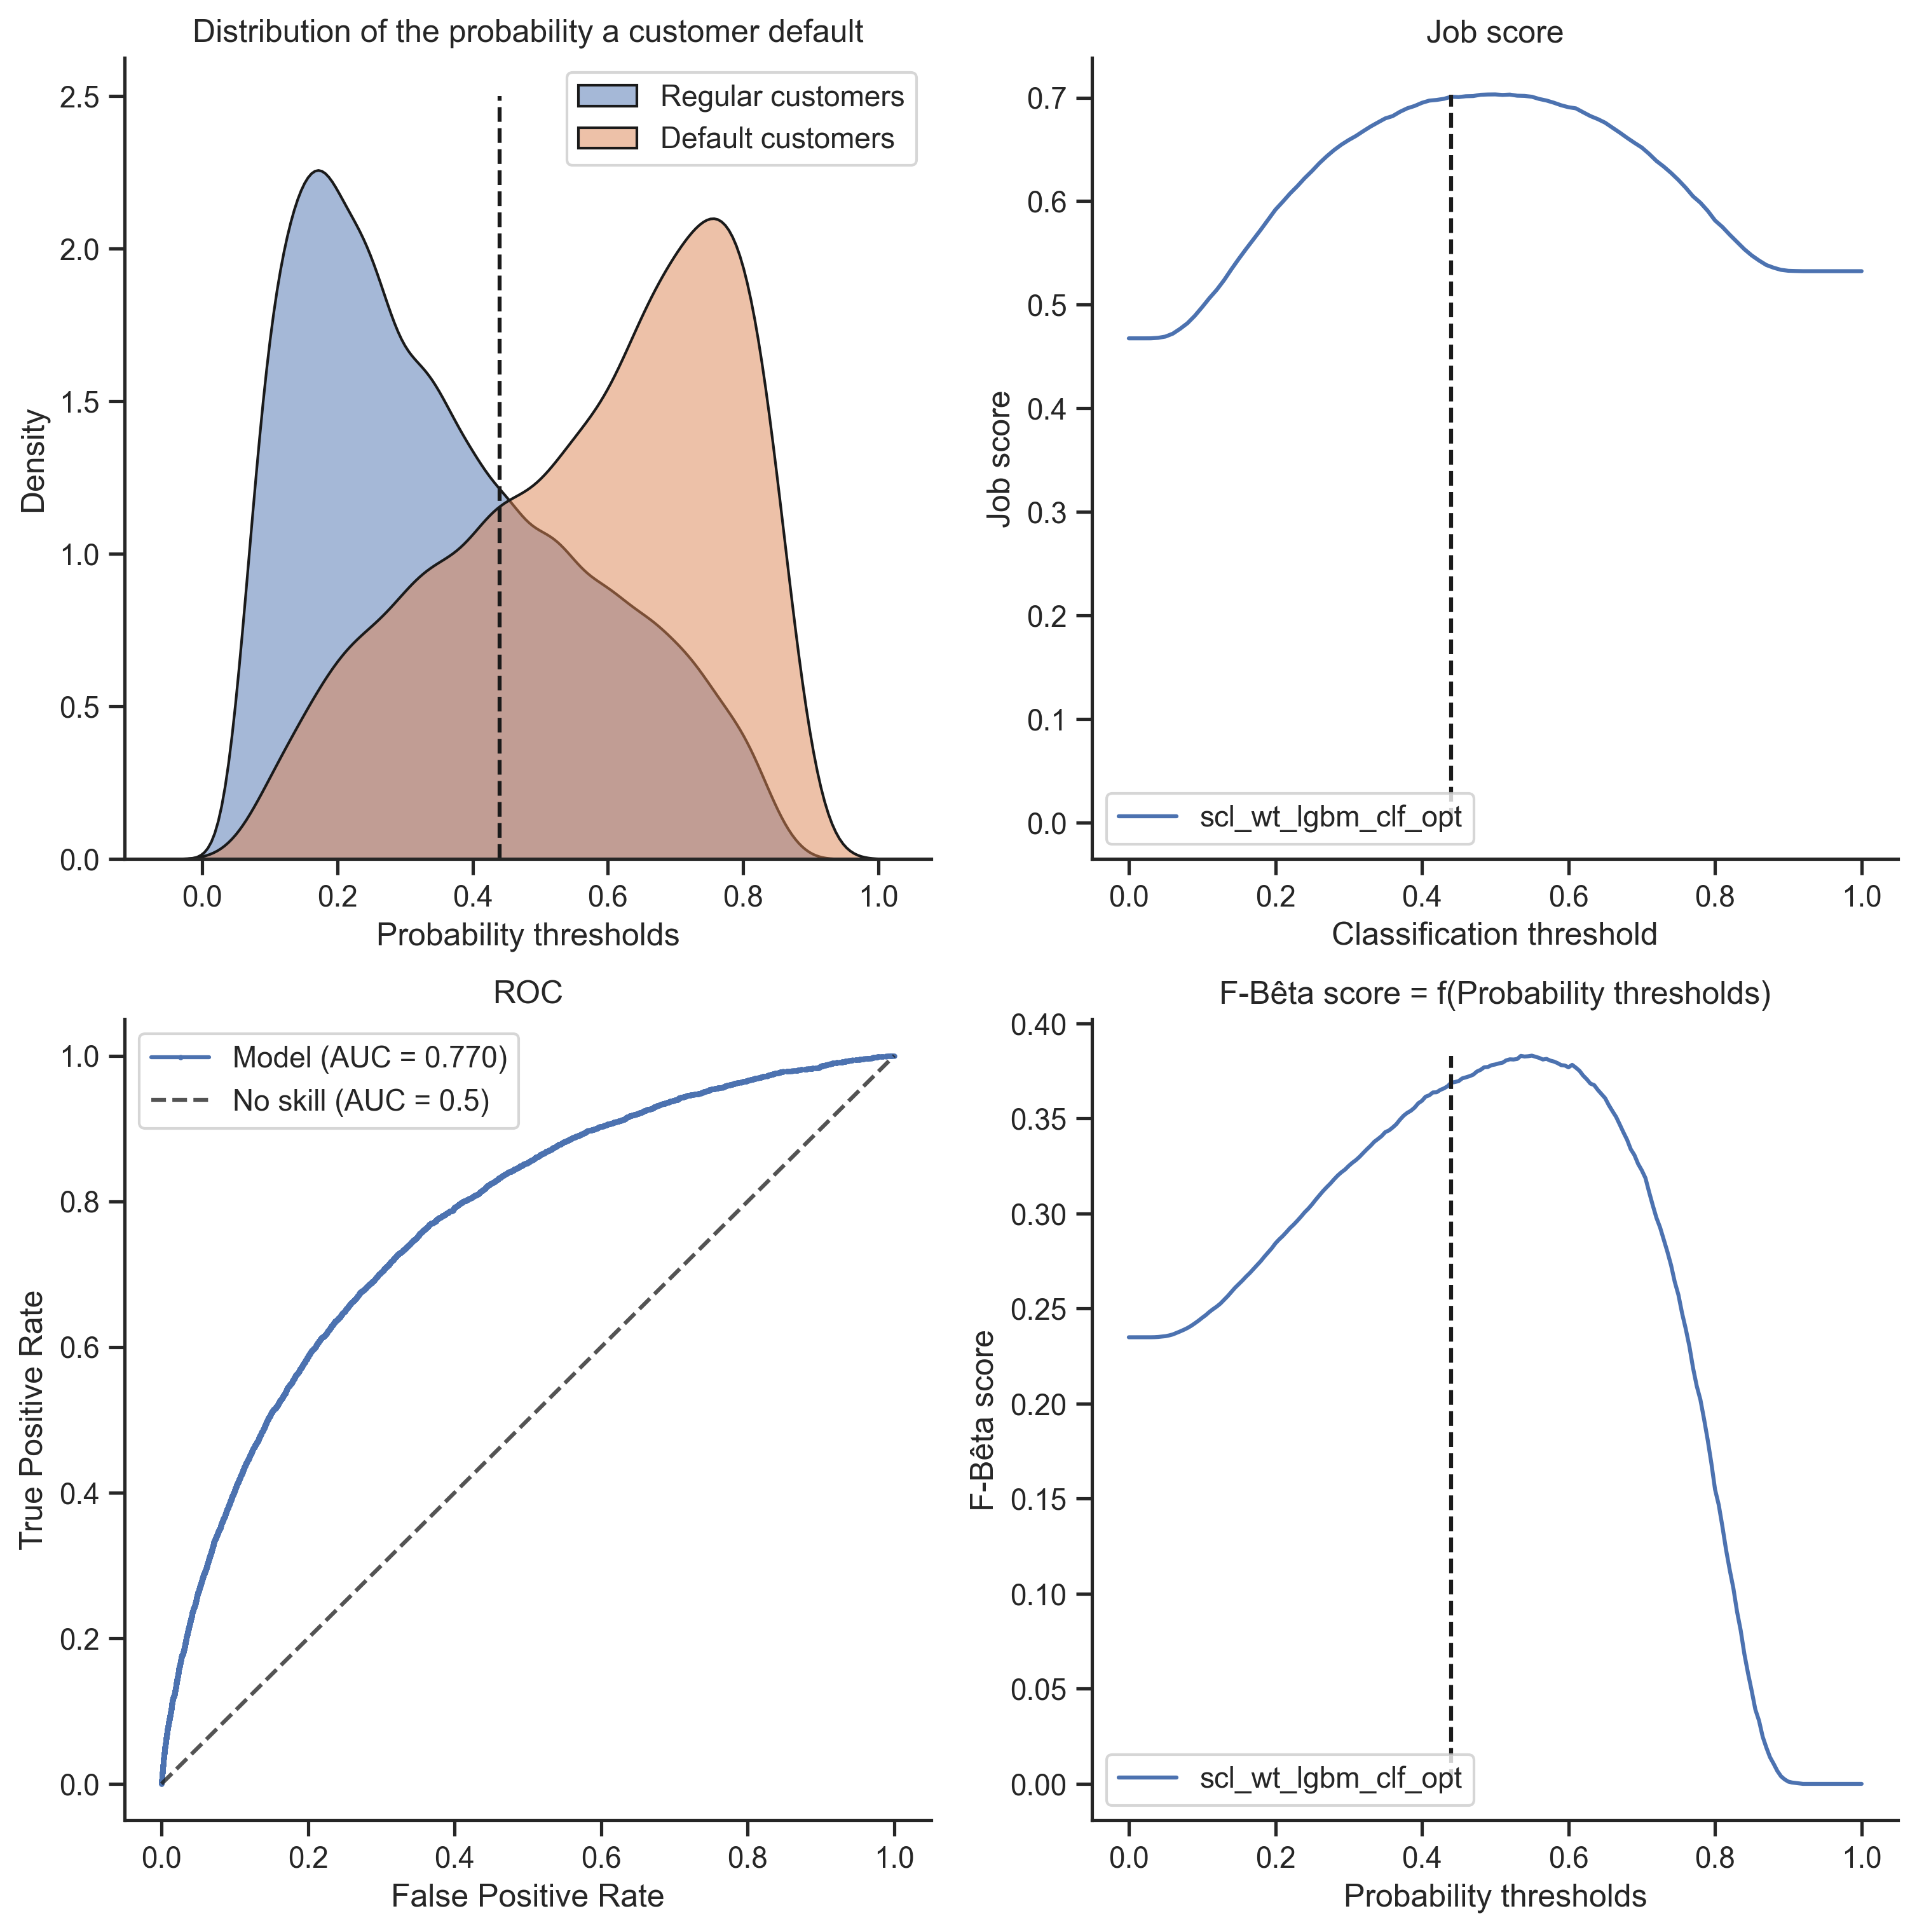

Confusion matrix:


The new score is inferior to the one already saved.
Dataframe not saved.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.12317786590438161, 0.5132001342020533, 0.17...   
scl_wt_xgb_clf_opt         [0.27779642, 0.5845683, 0.24471557, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.24993490088914644, 0.3478649487790224, 0.58...   
scl_wt_xgb_clf_opt         [0.29466602, 0.35203174, 0.46066236, 0.3300050...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [62]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
                                learning_rate=0.12, max_depth=90,
                                min_child_weight=5, n_estimators=44,
                                objective='binary', random_state=0,
                                reg_alpha=0.0001, reg_lambda=1.0,
                                subsample=0.8)]])

ROC-AUC = 0.772229
F-Bêta score of the optimal threshold found = 0.369
Highest F-Bêta score = 0.380
Job score: 0.701

----------------------------------------------------------------------------------------------------



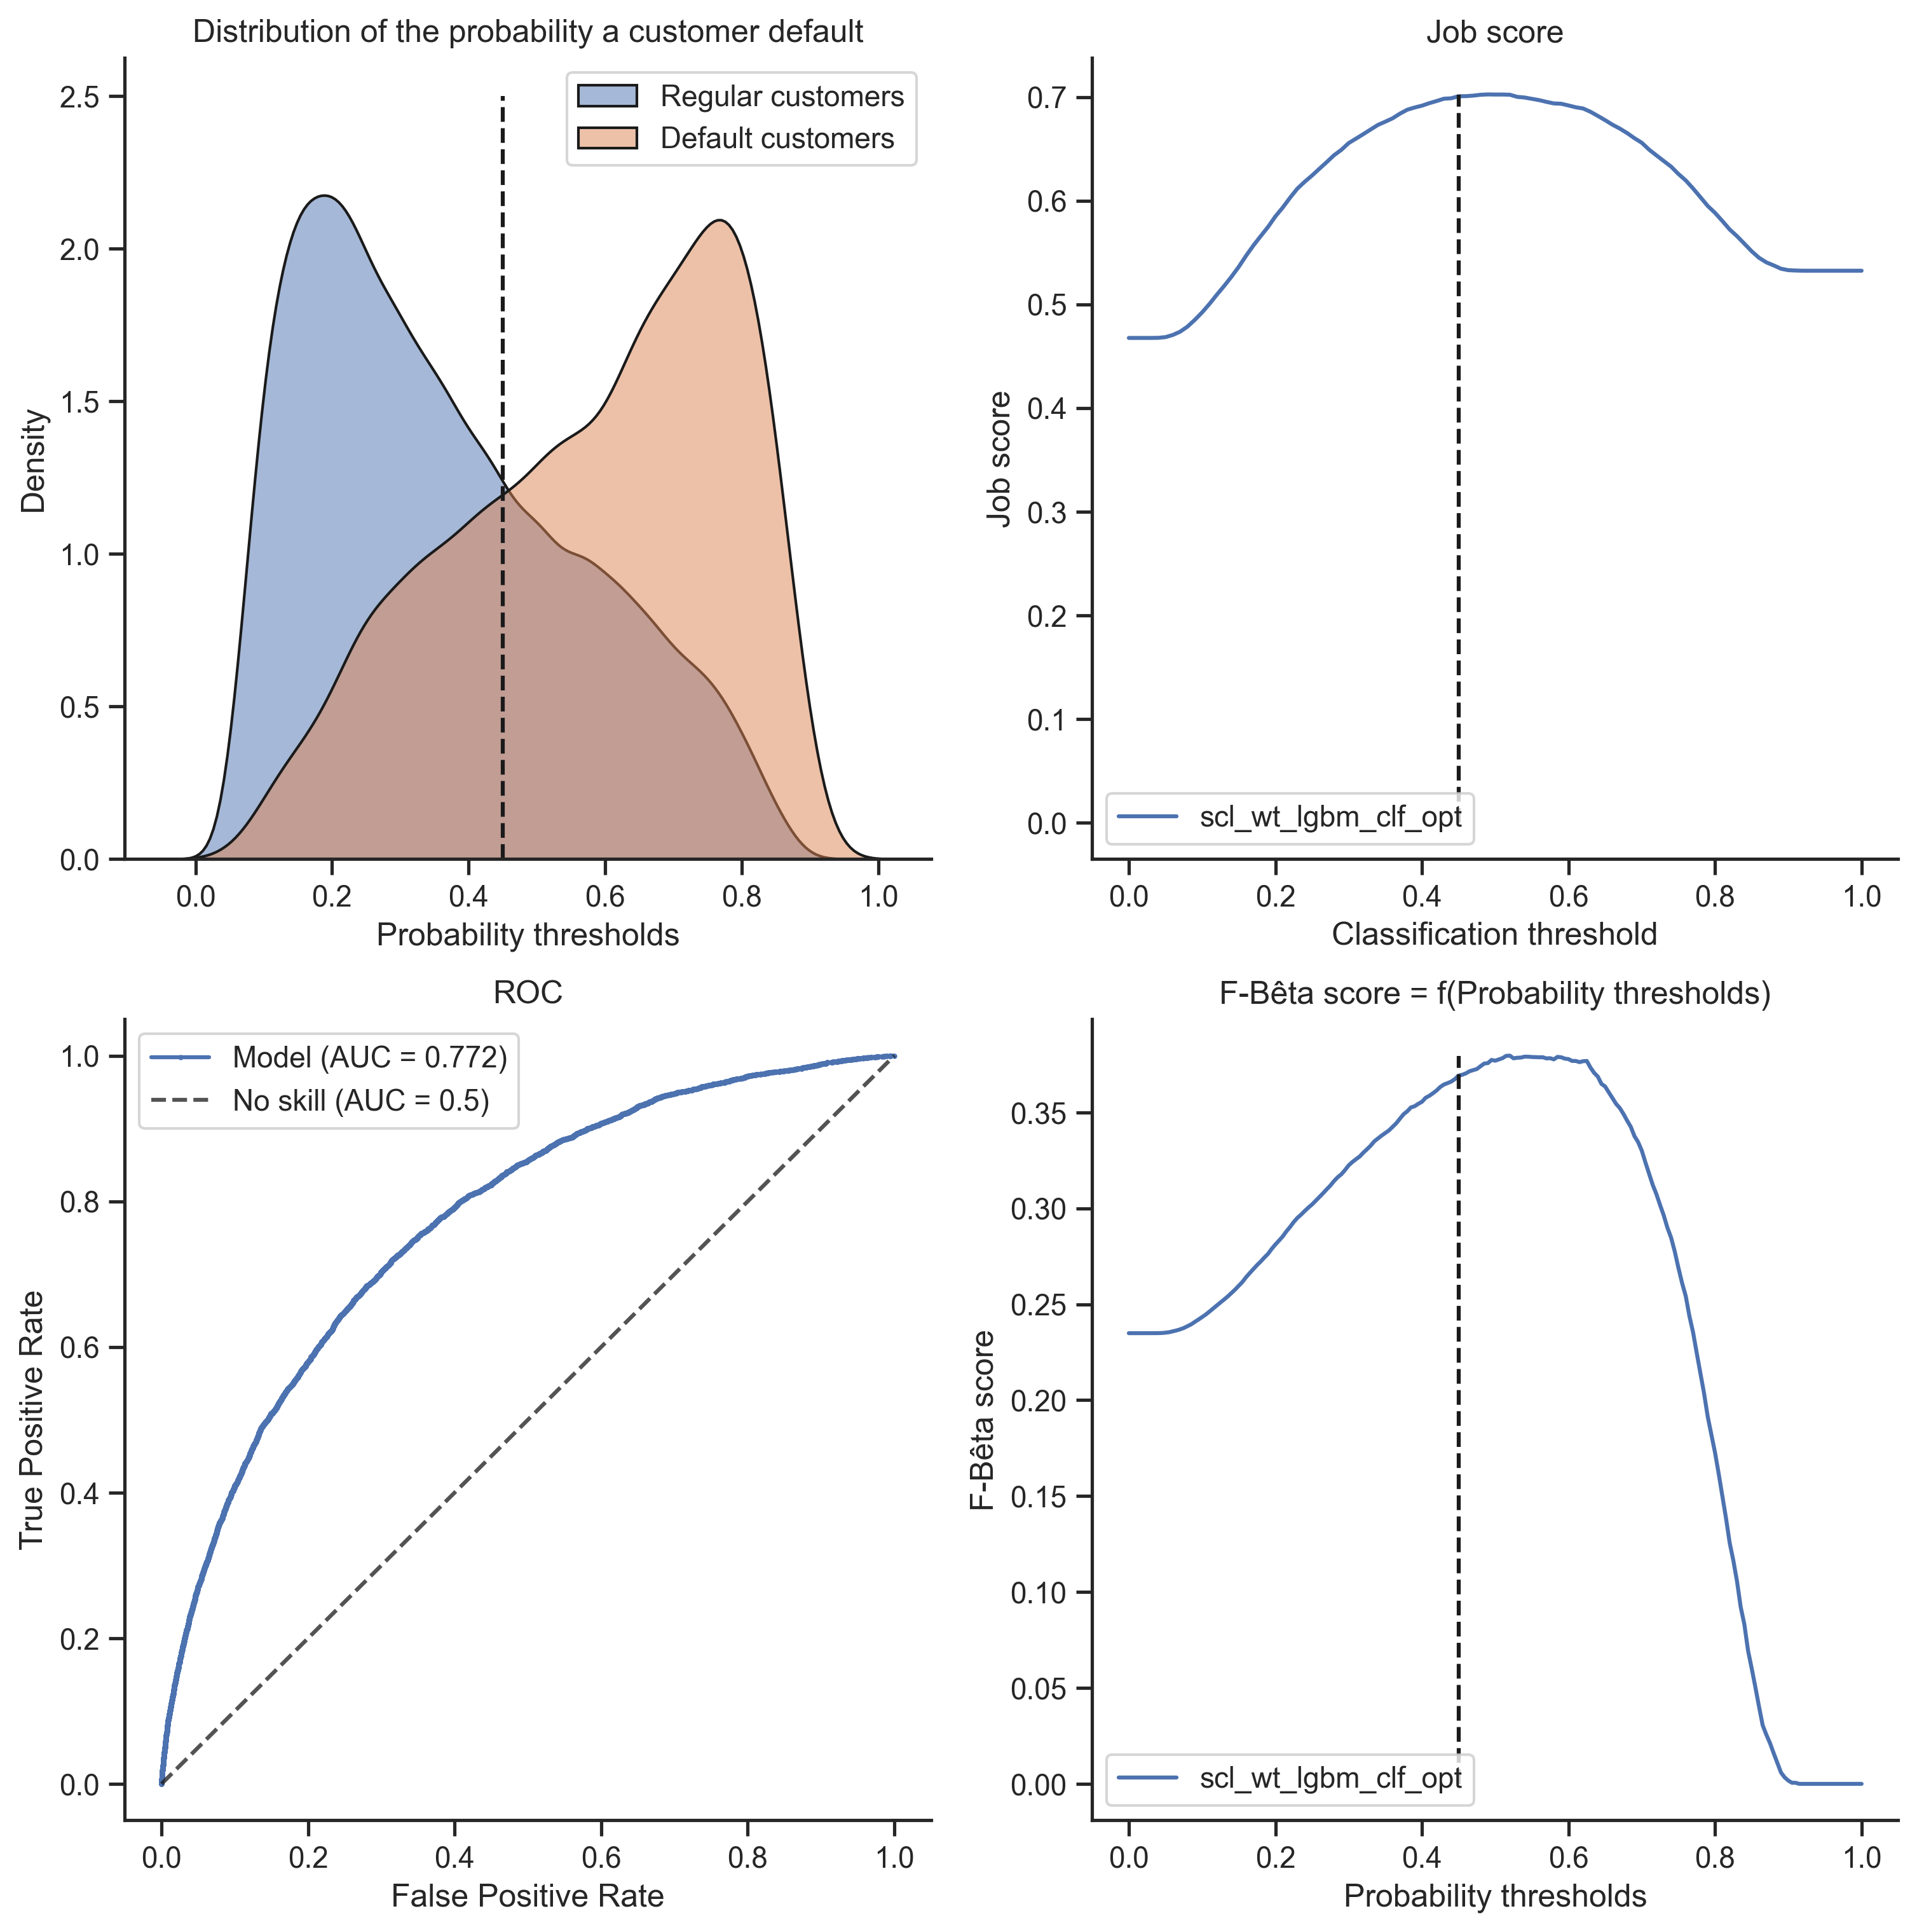

Confusion matrix:


The new score is inferior to the one already saved.
Dataframe not saved.


Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.12317786590438161, 0.5132001342020533, 0.17...   
scl_wt_xgb_clf_opt         [0.27779642, 0.5845683, 0.24471557, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.24993490088914644, 0.3478649487790224, 0.58...   
scl_wt_xgb_clf_opt         [0.29466602, 0.35203174, 0.46066236, 0.3300050...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [63]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, X_test=X_TEST, y_test=y_TEST, cv=0,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### f) Models comparison

#### i. Functions

In [64]:
def figure_barplot (df, x_labels = 'Model_labels', y_label = 'Score', title = None):
    
    # Rearrange the df such as it fits the seaborn.barplot() data format.
    tidy = df.reset_index().melt(id_vars=x_labels, value_name=y_label, var_name='')
    
    # Plot the figure.
    ax = sns.barplot(data=tidy, y=x_labels, x=y_label, hue='', orient='h', edgecolor='k')
    
    # Set the figure title.
    plt.title(title)
    
    #return ax

#### ii. Summarizing table

#### iii. Figures

In [65]:
# Show the summarizing table.
df_MODELS

Models  \
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))   
wt_logi_reg_clf_opt        (LogisticRegression(C=1e-05, class_weight='bal...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
scl_wt_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(class_weig...   
scl_wt_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
scl_wt_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
scl_resp_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_resp_logi_reg_clf_opt  (MinMaxScaler(), BorderlineSMOTE(k_neighbors=6...   
scl_resp_rf_clf_opt        (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_xgb_clf_opt       (MinMaxScaler(), BorderlineSMOTE(k_neighbors=1...   
scl_resp_lgbm_clf_opt      (MinMaxScaler(), BorderlineSMOTE(k_neighbors=4...   
scl_wt_lgbm_clf_fine_opt   (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                  yhat_train  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
wt_logi_reg_clf_opt        [0.271781169292442, 0.25998299340201136, 0.727...   
wt_rf_clf_opt              [0.2062712335114394, 0.30575434302928606, 0.15...   
wt_xgb_clf_opt             [0.26864615, 0.5733352, 0.24832541, 0.5256464,...   
wt_lgbm_clf_opt            [0.1347582384397077, 0.4910501480330846, 0.161...   
scl_wt_dummy_clf           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.2895000561808597, 0.6577823015642051, 0.280...   
scl_wt_rf_clf_opt          [0.12317786590438161, 0.5132001342020533, 0.17...   
scl_wt_xgb_clf_opt         [0.27779642, 0.5845683, 0.24471557, 0.5256464,...   
scl_wt_lgbm_clf_opt        [0.10562763554987932, 0.3598717232535036, 0.12...   
scl_resp_dummy_clf         [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_resp_logi_reg_clf_opt  [0.10933195609384268, 0.5015661637155086, 0.23...   
scl_resp_rf_clf_opt        [0.135097936239321, 0.2674069608616012, 0.1216...   
scl_resp_xgb_clf_opt       [0.2582814, 0.45901492, 0.34118447, 0.5556127,...   
scl_resp_lgbm_clf_opt      [0.3193704537312237, 0.43556117399394007, 0.33...   
scl_wt_lgbm_clf_fine_opt   [0.19974938022256933, 0.41723827711978345, 0.0...   

                                                                   yhat_test  \
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_logi_reg_clf_opt        [0.4913801765475127, 0.5304453858521498, 0.640...   
wt_rf_clf_opt              [0.16477361646012645, 0.3136417847180076, 0.58...   
wt_xgb_clf_opt             [0.308788, 0.36691085, 0.4502883, 0.31611738, ...   
wt_lgbm_clf_opt            [0.25884899126424693, 0.35727848930760525, 0.6...   
scl_wt_dummy_clf           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt    [0.3092728551073664, 0.34867411164270057, 0.60...   
scl_wt_rf_clf_opt          [0.24993490088914644, 0.3478649487790224, 0.58...   
scl_wt_xgb_clf_opt         [0.29466602, 0.35203174, 0.46066236, 0.3300050...   
scl_wt_lgbm_clf_opt        [0.2291849807063032, 0.420626410519296, 0.6577...   
scl_resp_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
scl_resp_logi_reg_clf_opt  [0.2191914697106039, 0.22723871688356176, 0.64...   
scl_resp_rf_clf_opt        [0.1354580043332359, 0.19713426250261185,

In [66]:
# Exports all results for the methodological notes in csv format.
df_MODELS.to_csv(os.path.join(EXPORTS_MODELS_DIR_PATH, 'models_info.csv'))

##### __- ROCs comparison__

0
Models comparison: No data transformation + Weight


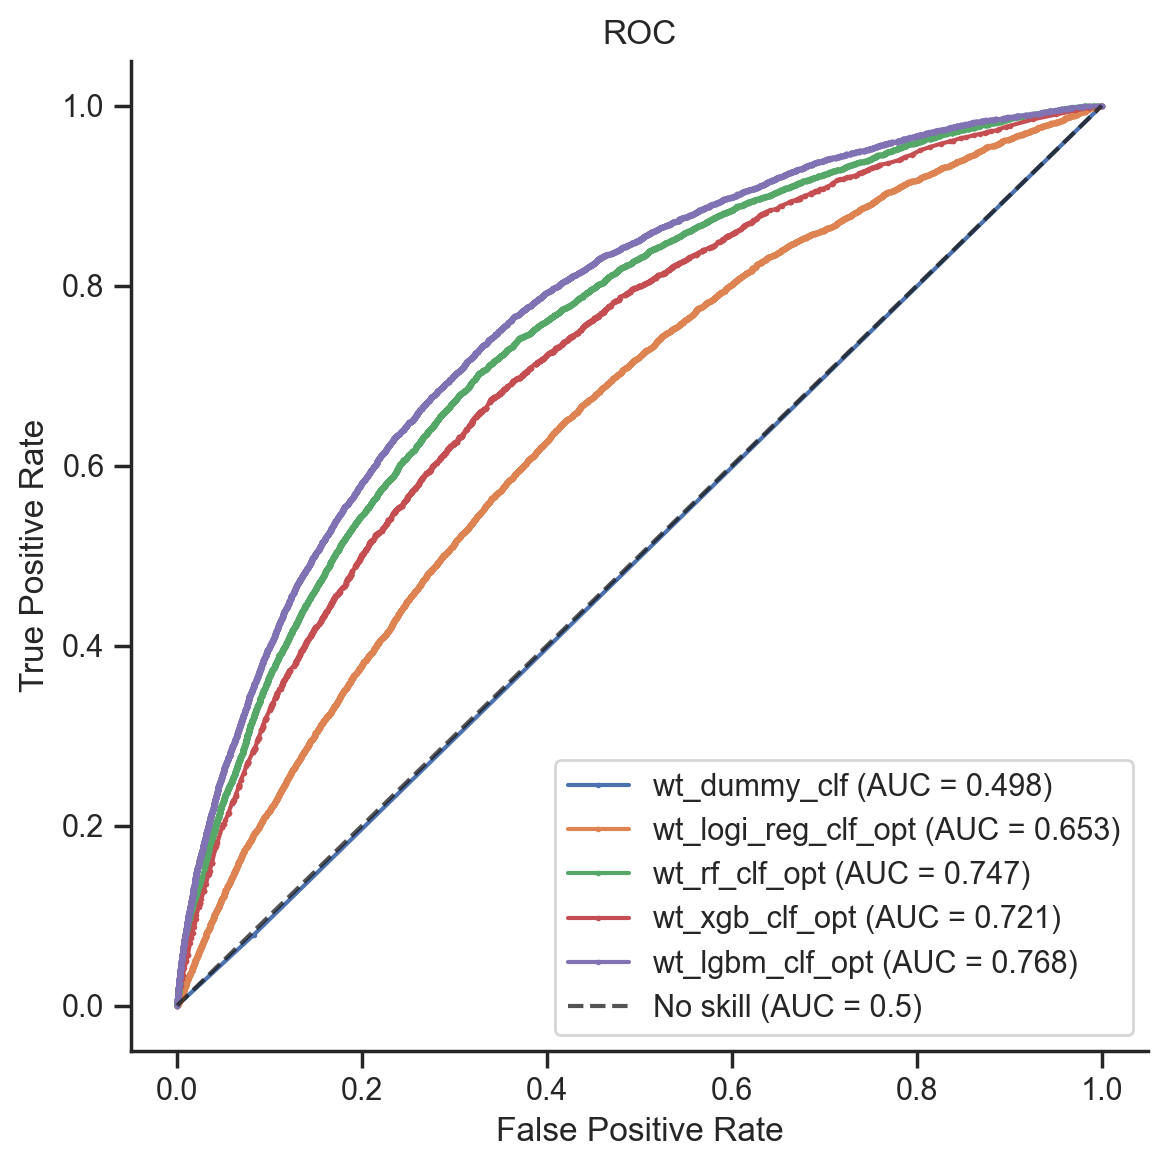

5
Models comparison: Normalization + Weight


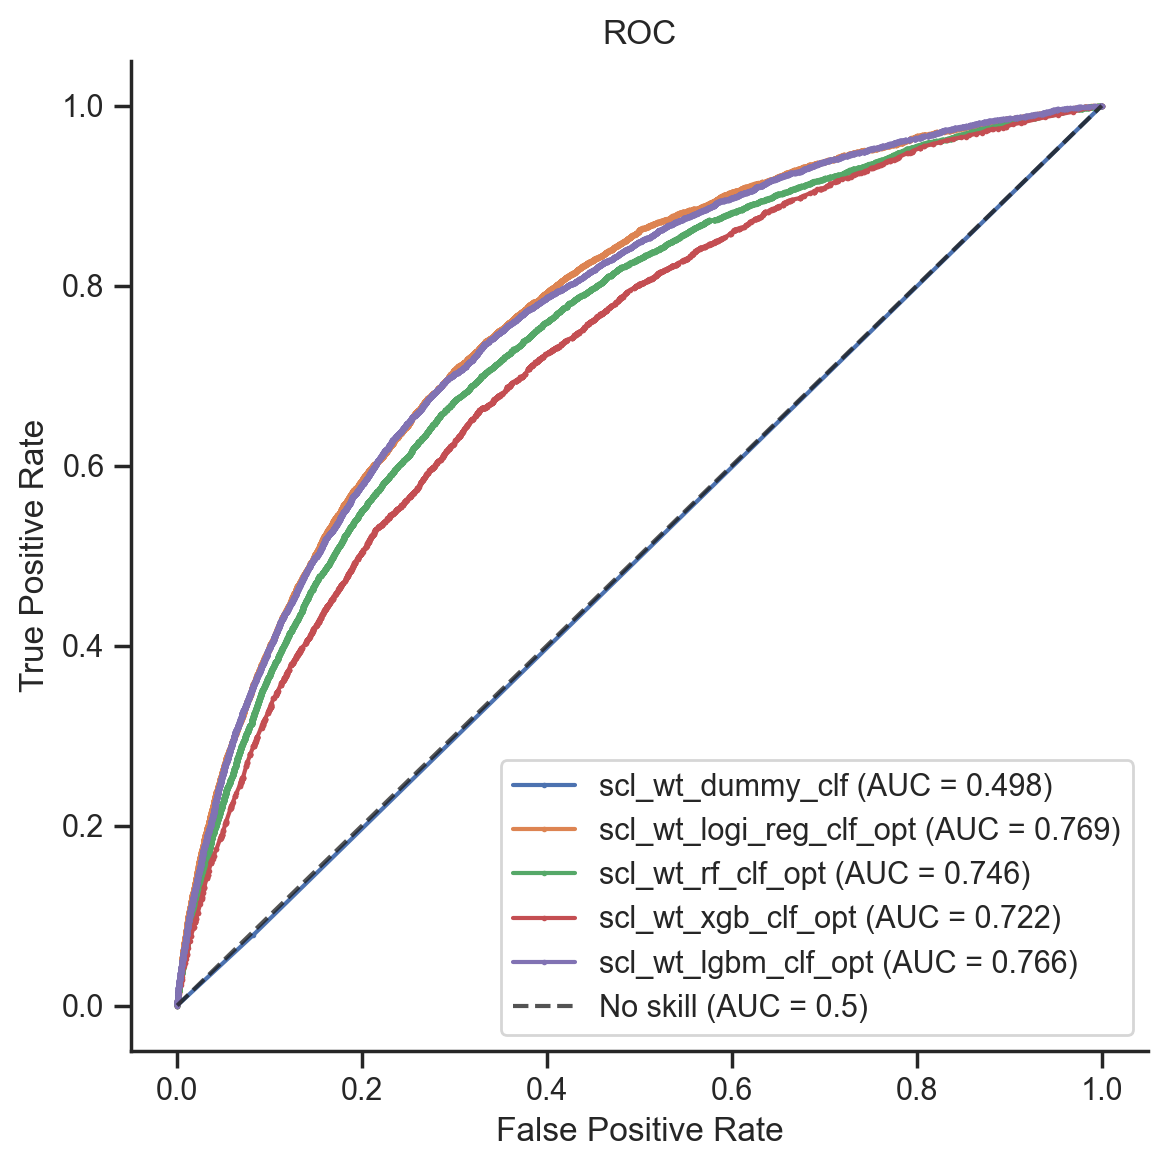

10
Models comparison: Normalization + Data resampling


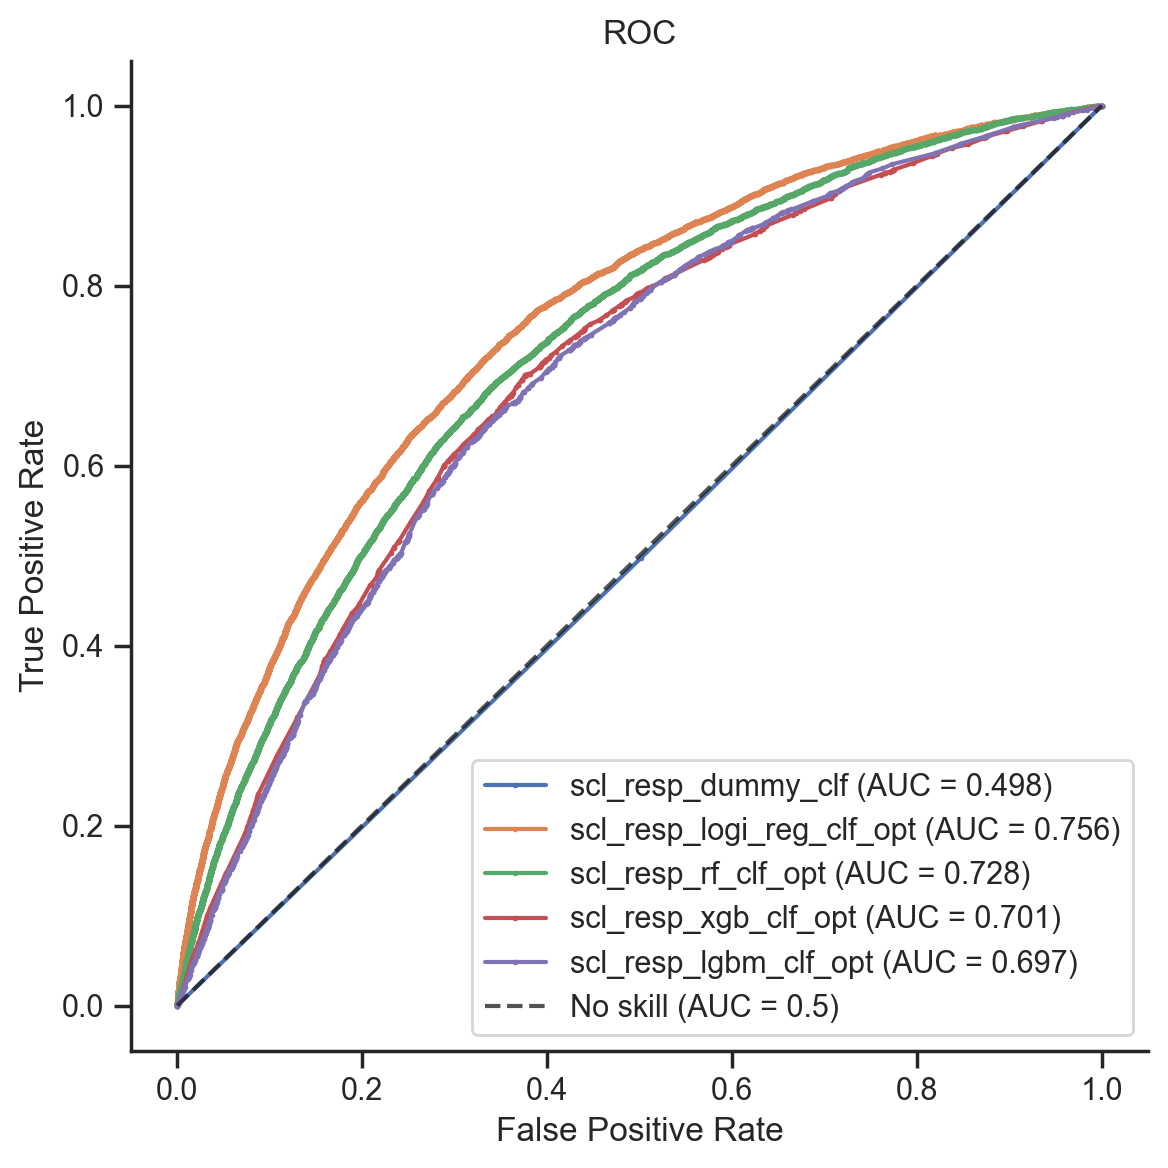

15
CPU times: total: 1.2 s
Wall time: 1.2 s


In [72]:
%%time

### Plot figures normalization, no normalization, data resampling ###

## Configuration ##

for j in np.arange(0, df_MODELS.shape[0], 5):
    
    # Display only figure associated to models from this notebook.
    if j > 10:
        break
    
    # Set the whole figure title.
    if j < 5:
        print("Models comparison: No data transformation + Weight")
    elif j < 10:
        print("Models comparison: Normalization + Weight")
    elif j < 15:
        print("Models comparison: Normalization + Data resampling")


    ## Plotting the Gain curves ##

    figure_roc(y_TRAIN, df_MODELS['yhat_train'][j:j+5], df_MODELS.index[j:j+5])
    

    ## Drawing ##

    # Arrange the subplots such as they are not superimposing each others. 
    plt.tight_layout()

    # Draw the figure.
    plt.show()

##### __- Job score comparison__

Models comparison: No data transformation + Weight


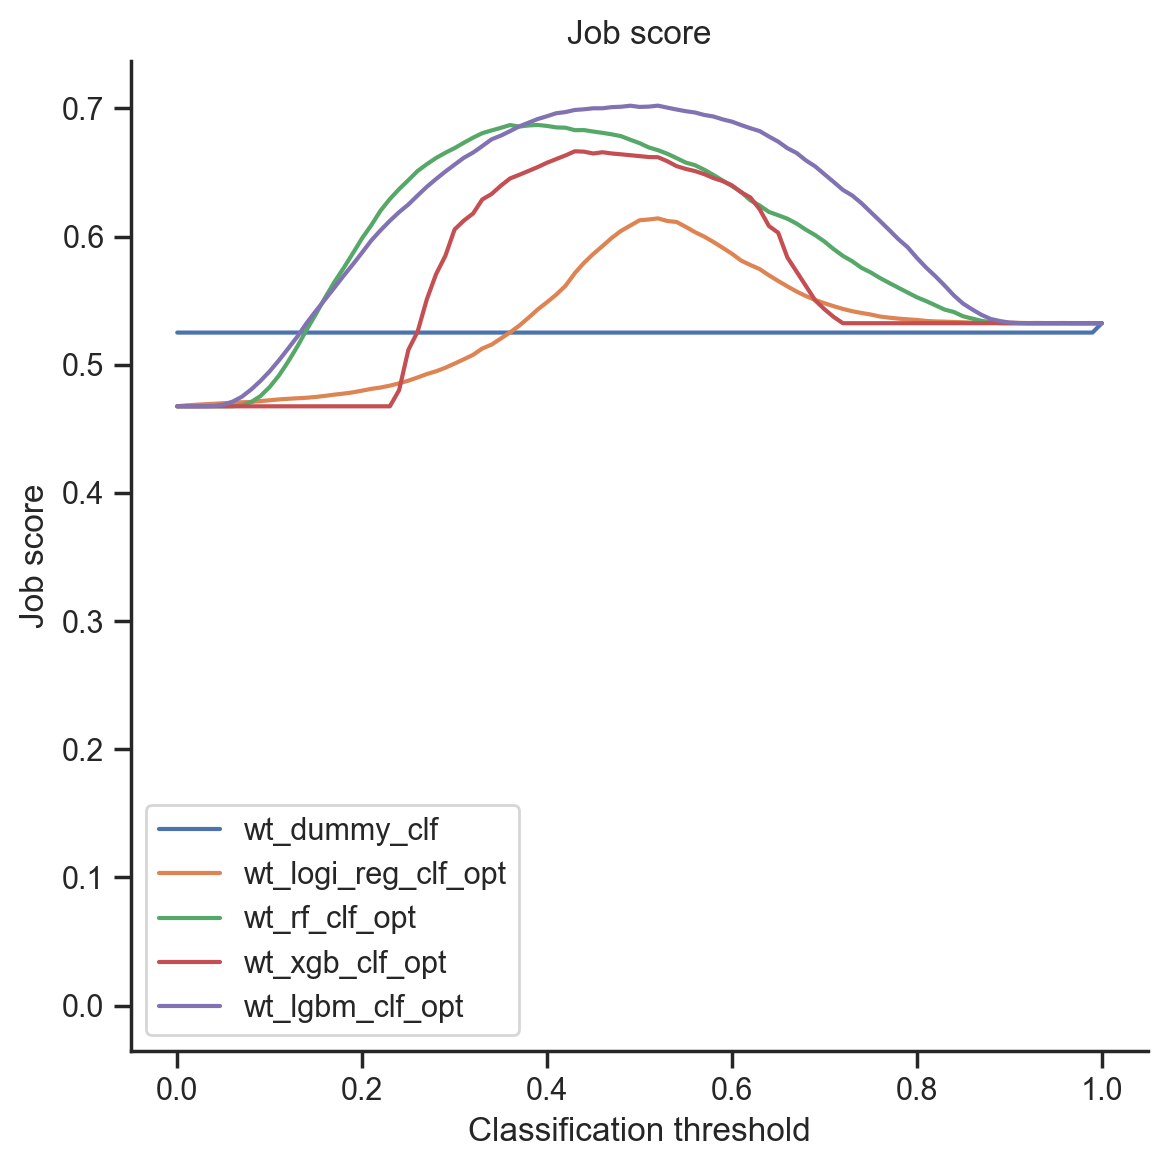

Models comparison: Normalization + Weight


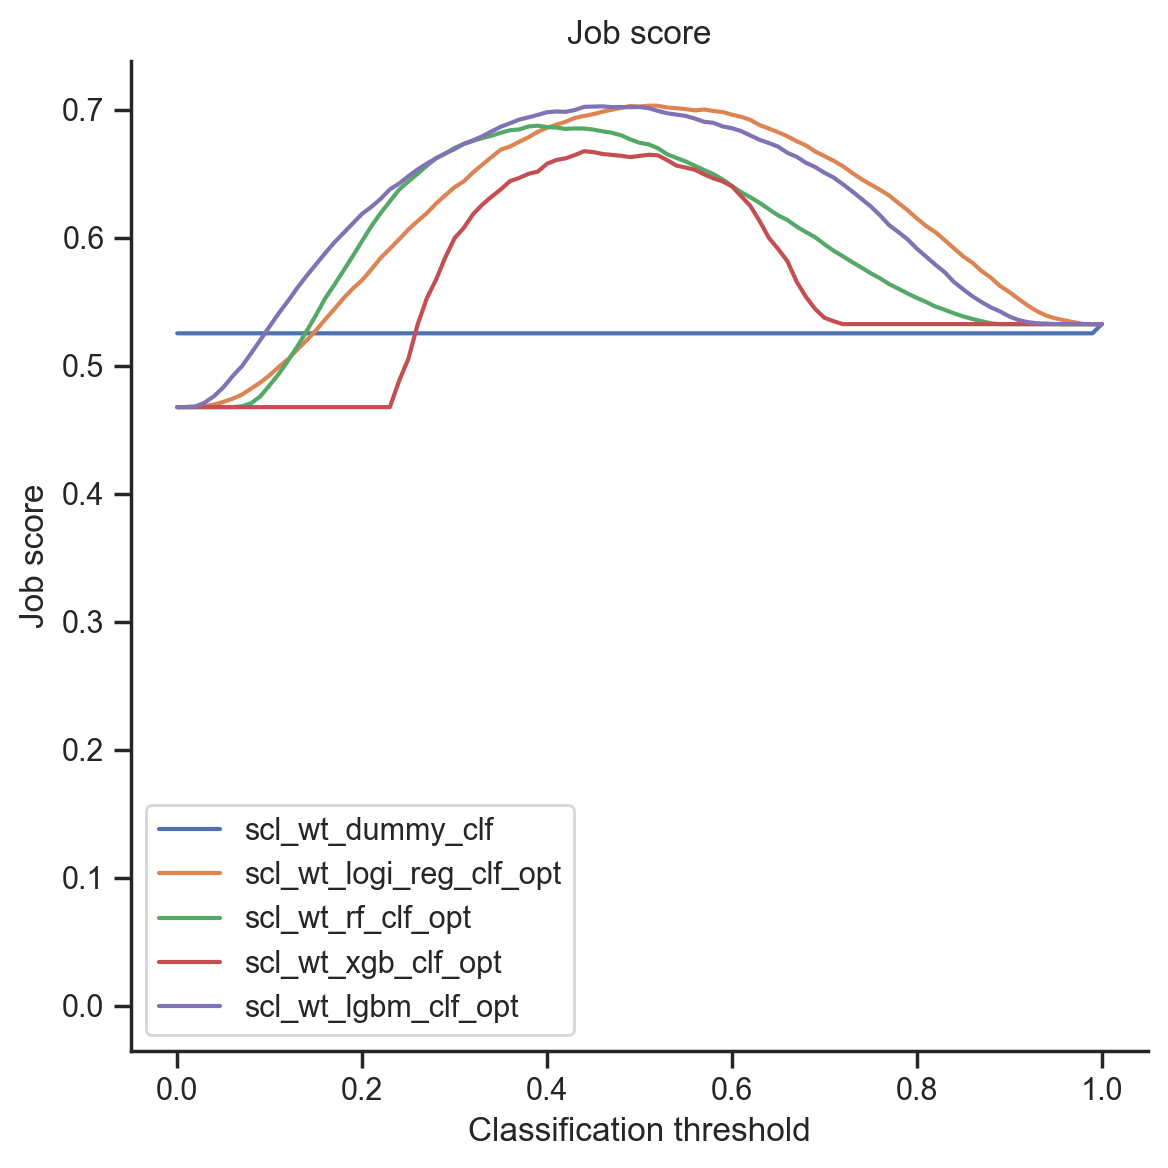

Models comparison: Normalization + Data resampling


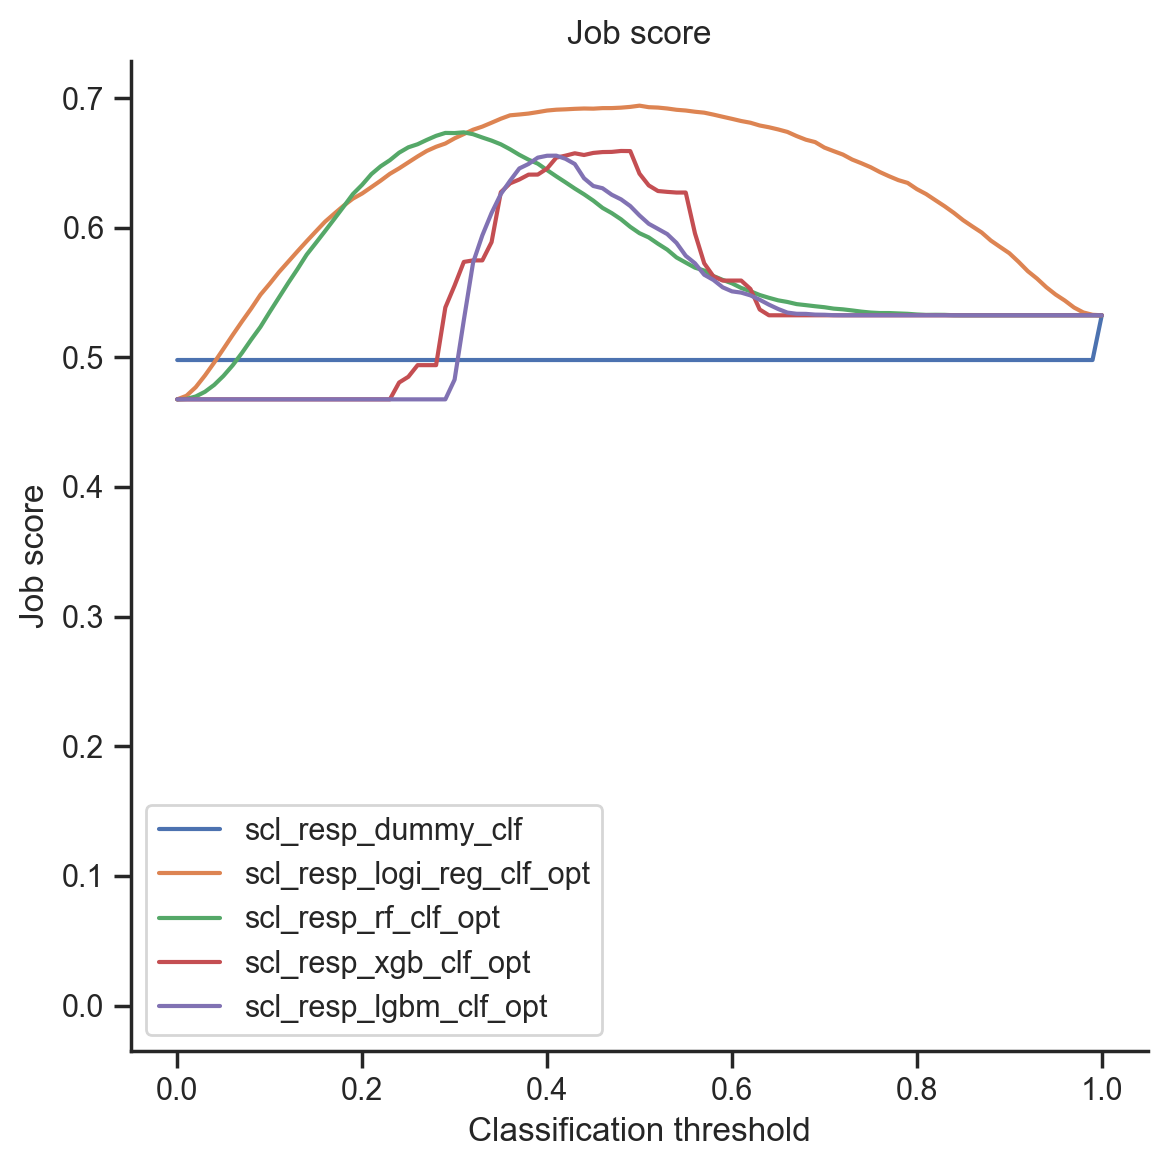

CPU times: total: 1min 17s
Wall time: 1min 17s


In [73]:
%%time

### Plot figures normalization, no normalization, data resampling ###

## Configuration ##

for j in np.arange(0, df_MODELS.shape[0], 5):
    
    # Set the whole figure title.
    if j < 5:
        print("Models comparison: No data transformation + Weight")
    elif j < 10:
        print("Models comparison: Normalization + Weight")
    elif j < 15:
        print("Models comparison: Normalization + Data resampling")
        
        
    # Display only figure associated to models from this notebook.
    if j > 10:
        break
        
        
    ### Plotting the Gain ###
    
    for i in range(j, j+5):

        # Stop the loop if it start to get out of the models' labels indexes.
        if i >= df_MODELS.shape[0]:
            break
        
        # Plot.
        figure_job_score_curve(y_TRAIN, df_MODELS['yhat_train'][i], model_label=df_MODELS.index[i], thr_line_vis=False)


    ## Drawing ##
    
    # Arrange the subplots such as they are not superimposing each others. 
    plt.tight_layout()

    # Draw the figure.
    plt.show()

Observations: <br>
- As it can be noticed, both scorers (AUROC and Job score) show the same tendencies.
- Logistic regressor gets a large benefit of the data scaling until catching up the performance gotten with the best classifier (LightGBM) which does not seem to get any benefit from the min max scaling.
- It is also noticeable that oversampling brings unexpected results: LightGBM becomes the least performing model while logistic regressor the best. As it is opposed to the observations made with the use of classifiers only, it suggests that new created samples aren't very representative of the reality. By the way, AUC scores are lower with this method compared to what we get within the other situations. <br>

=> Considering the weights attribution method which seems to be more reliable than resampling, LightGBM seems to be the most promising classifier so far.

##### __- Scores and processing times comparisons__


----------------------------------------------------------------------------------------------------

Models comparison: No data transformation + Weight


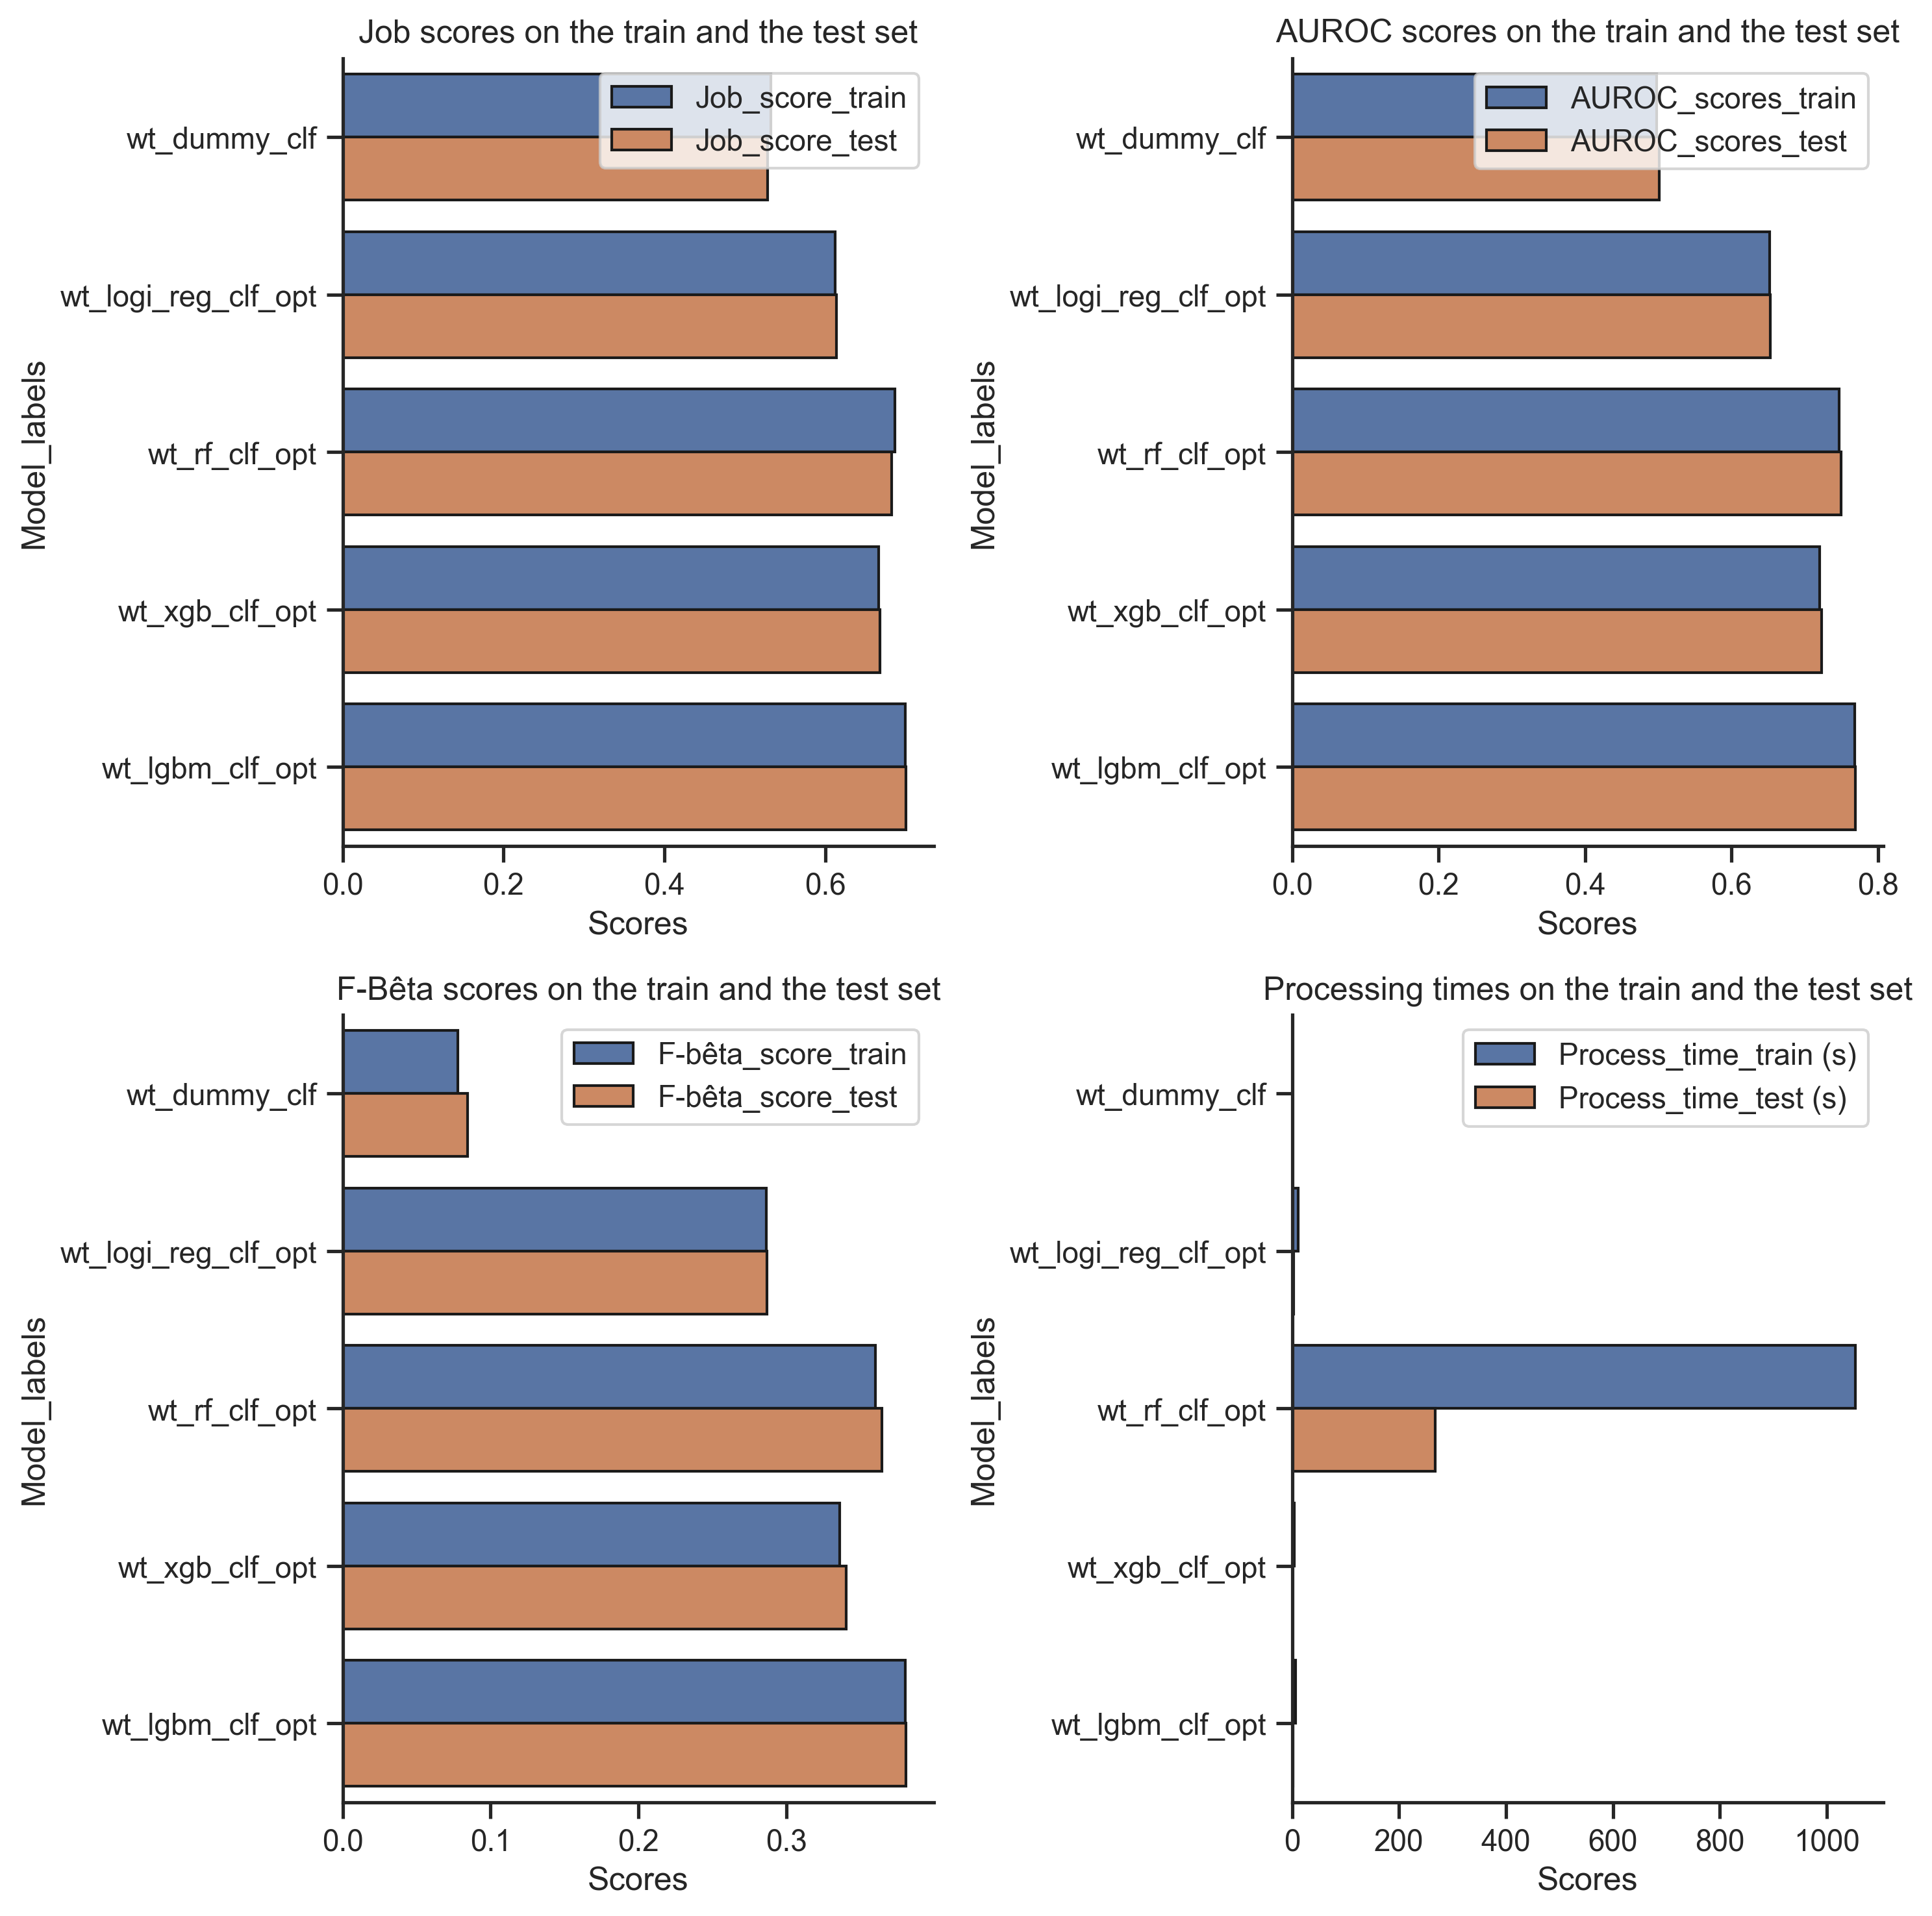


----------------------------------------------------------------------------------------------------

Models comparison: Normalization + Weight


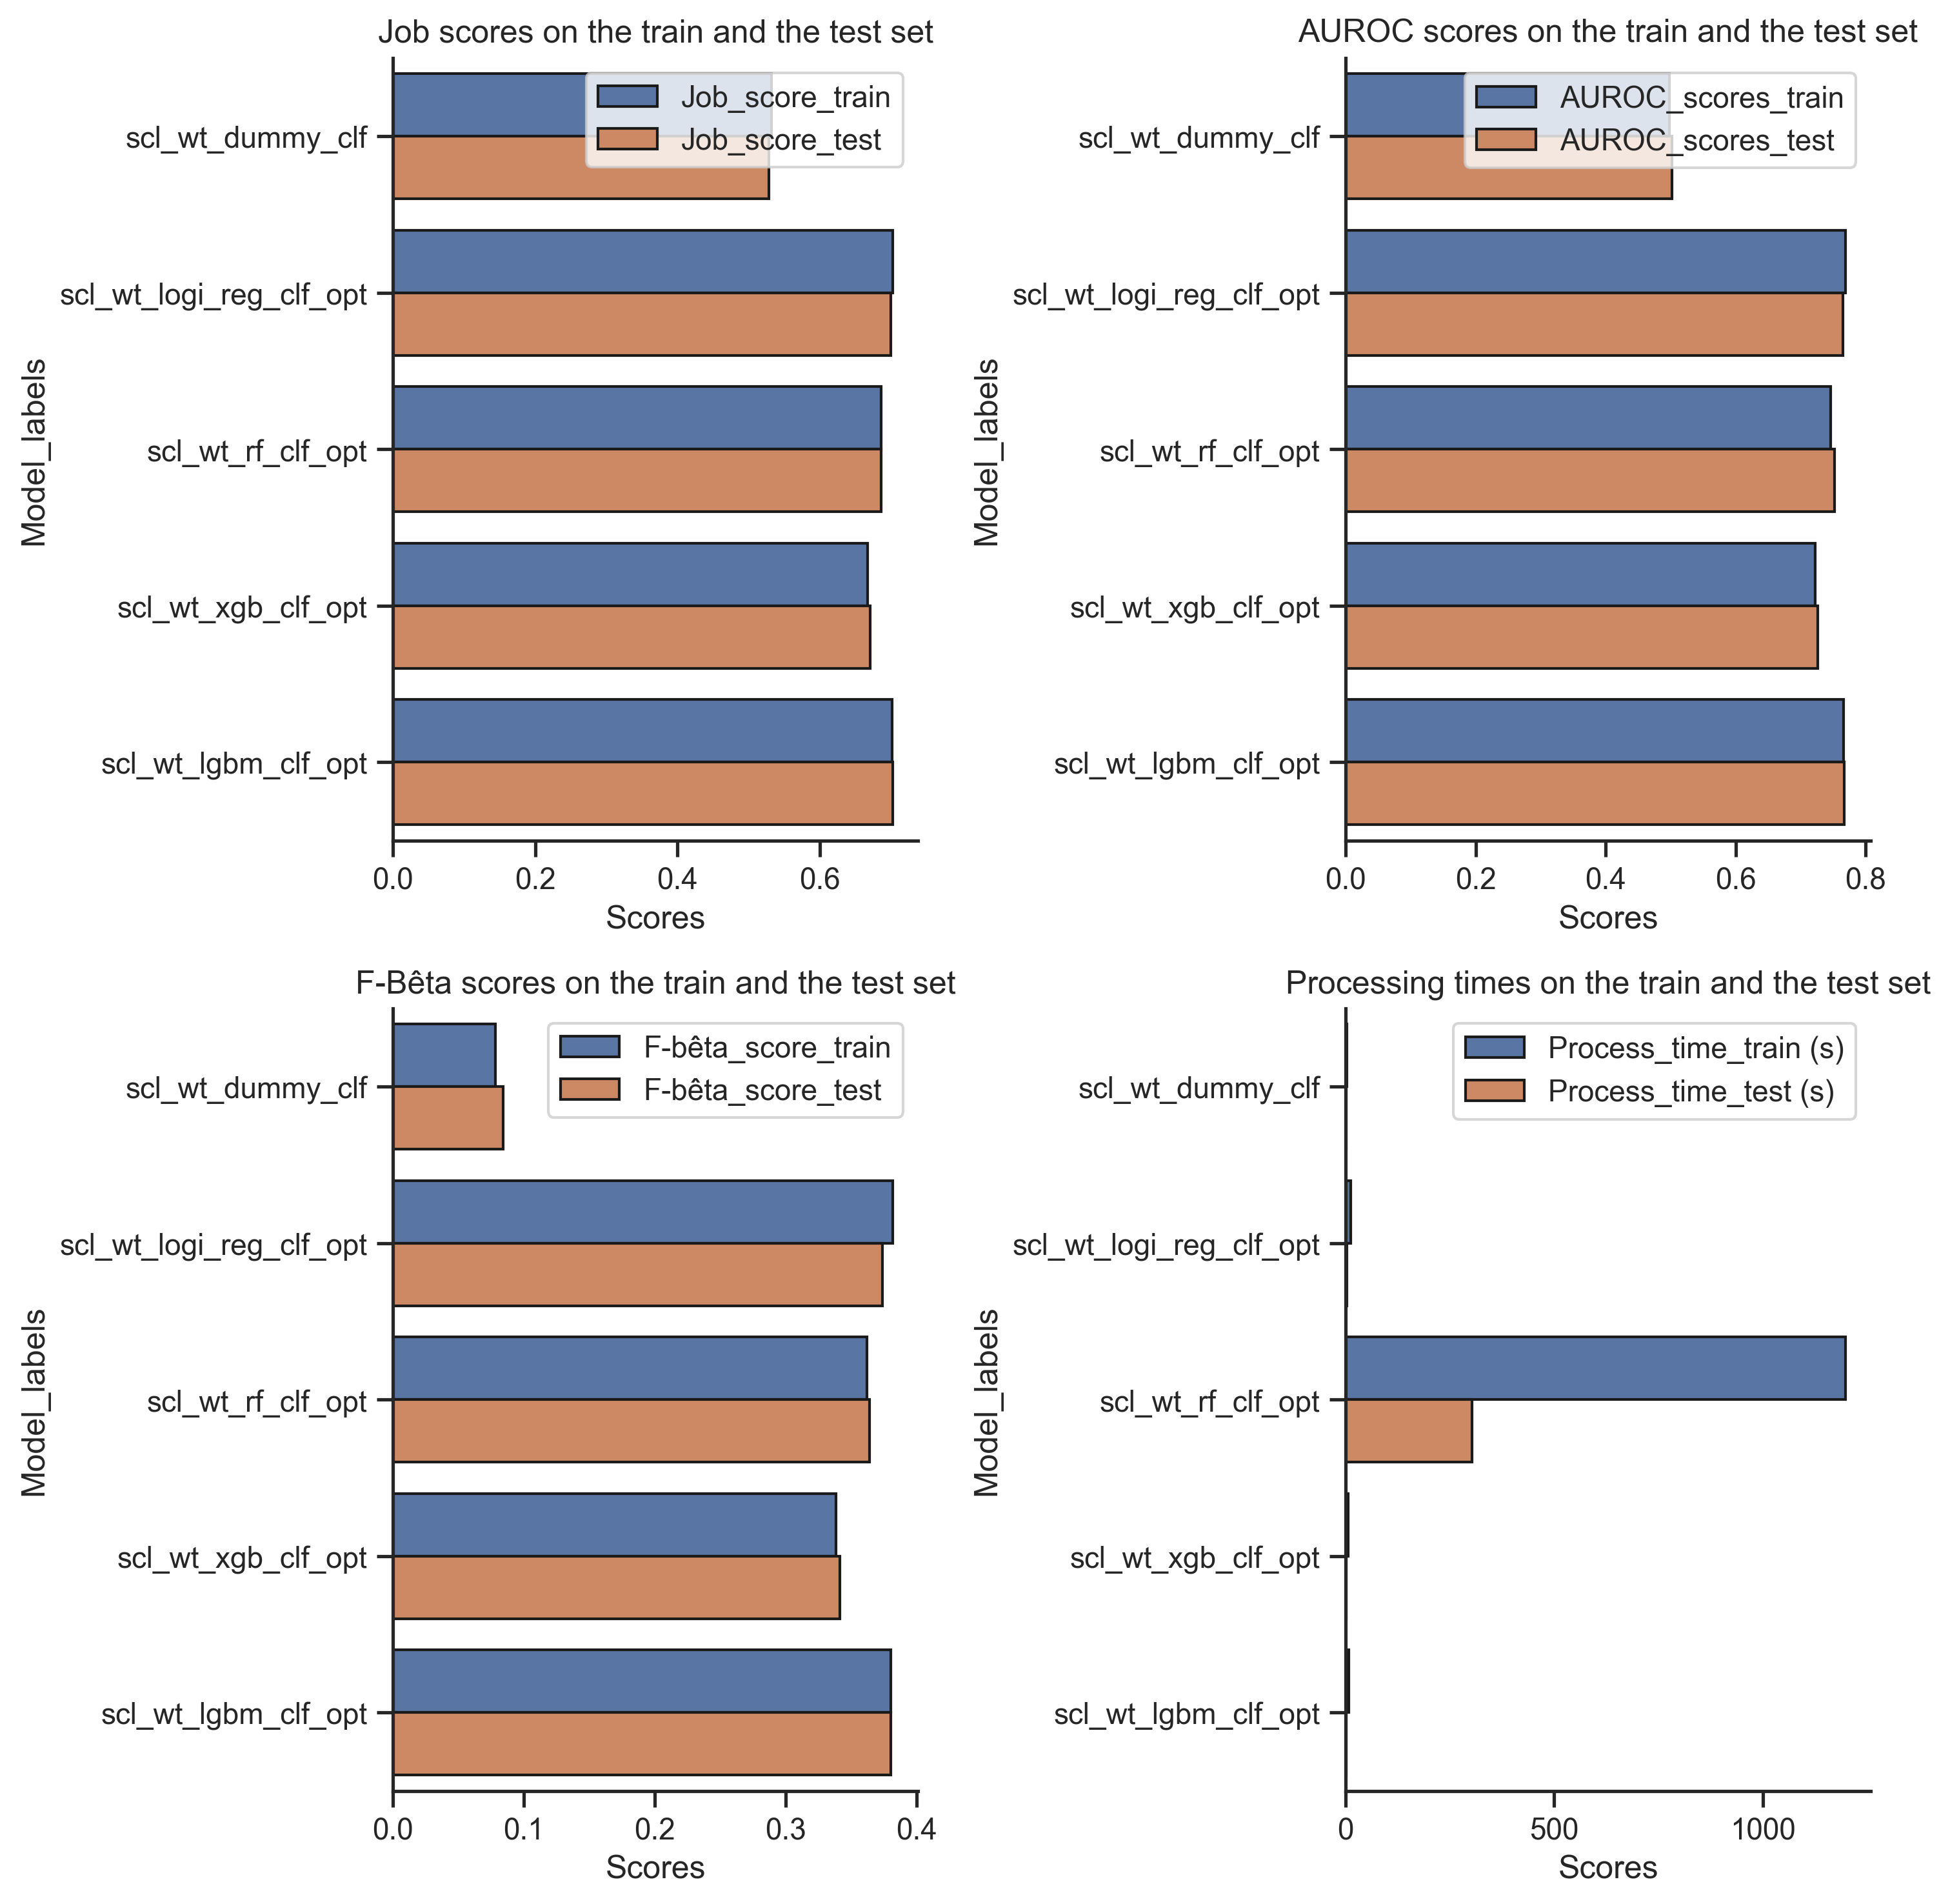


----------------------------------------------------------------------------------------------------

Models comparison: Normalization + Data resampling


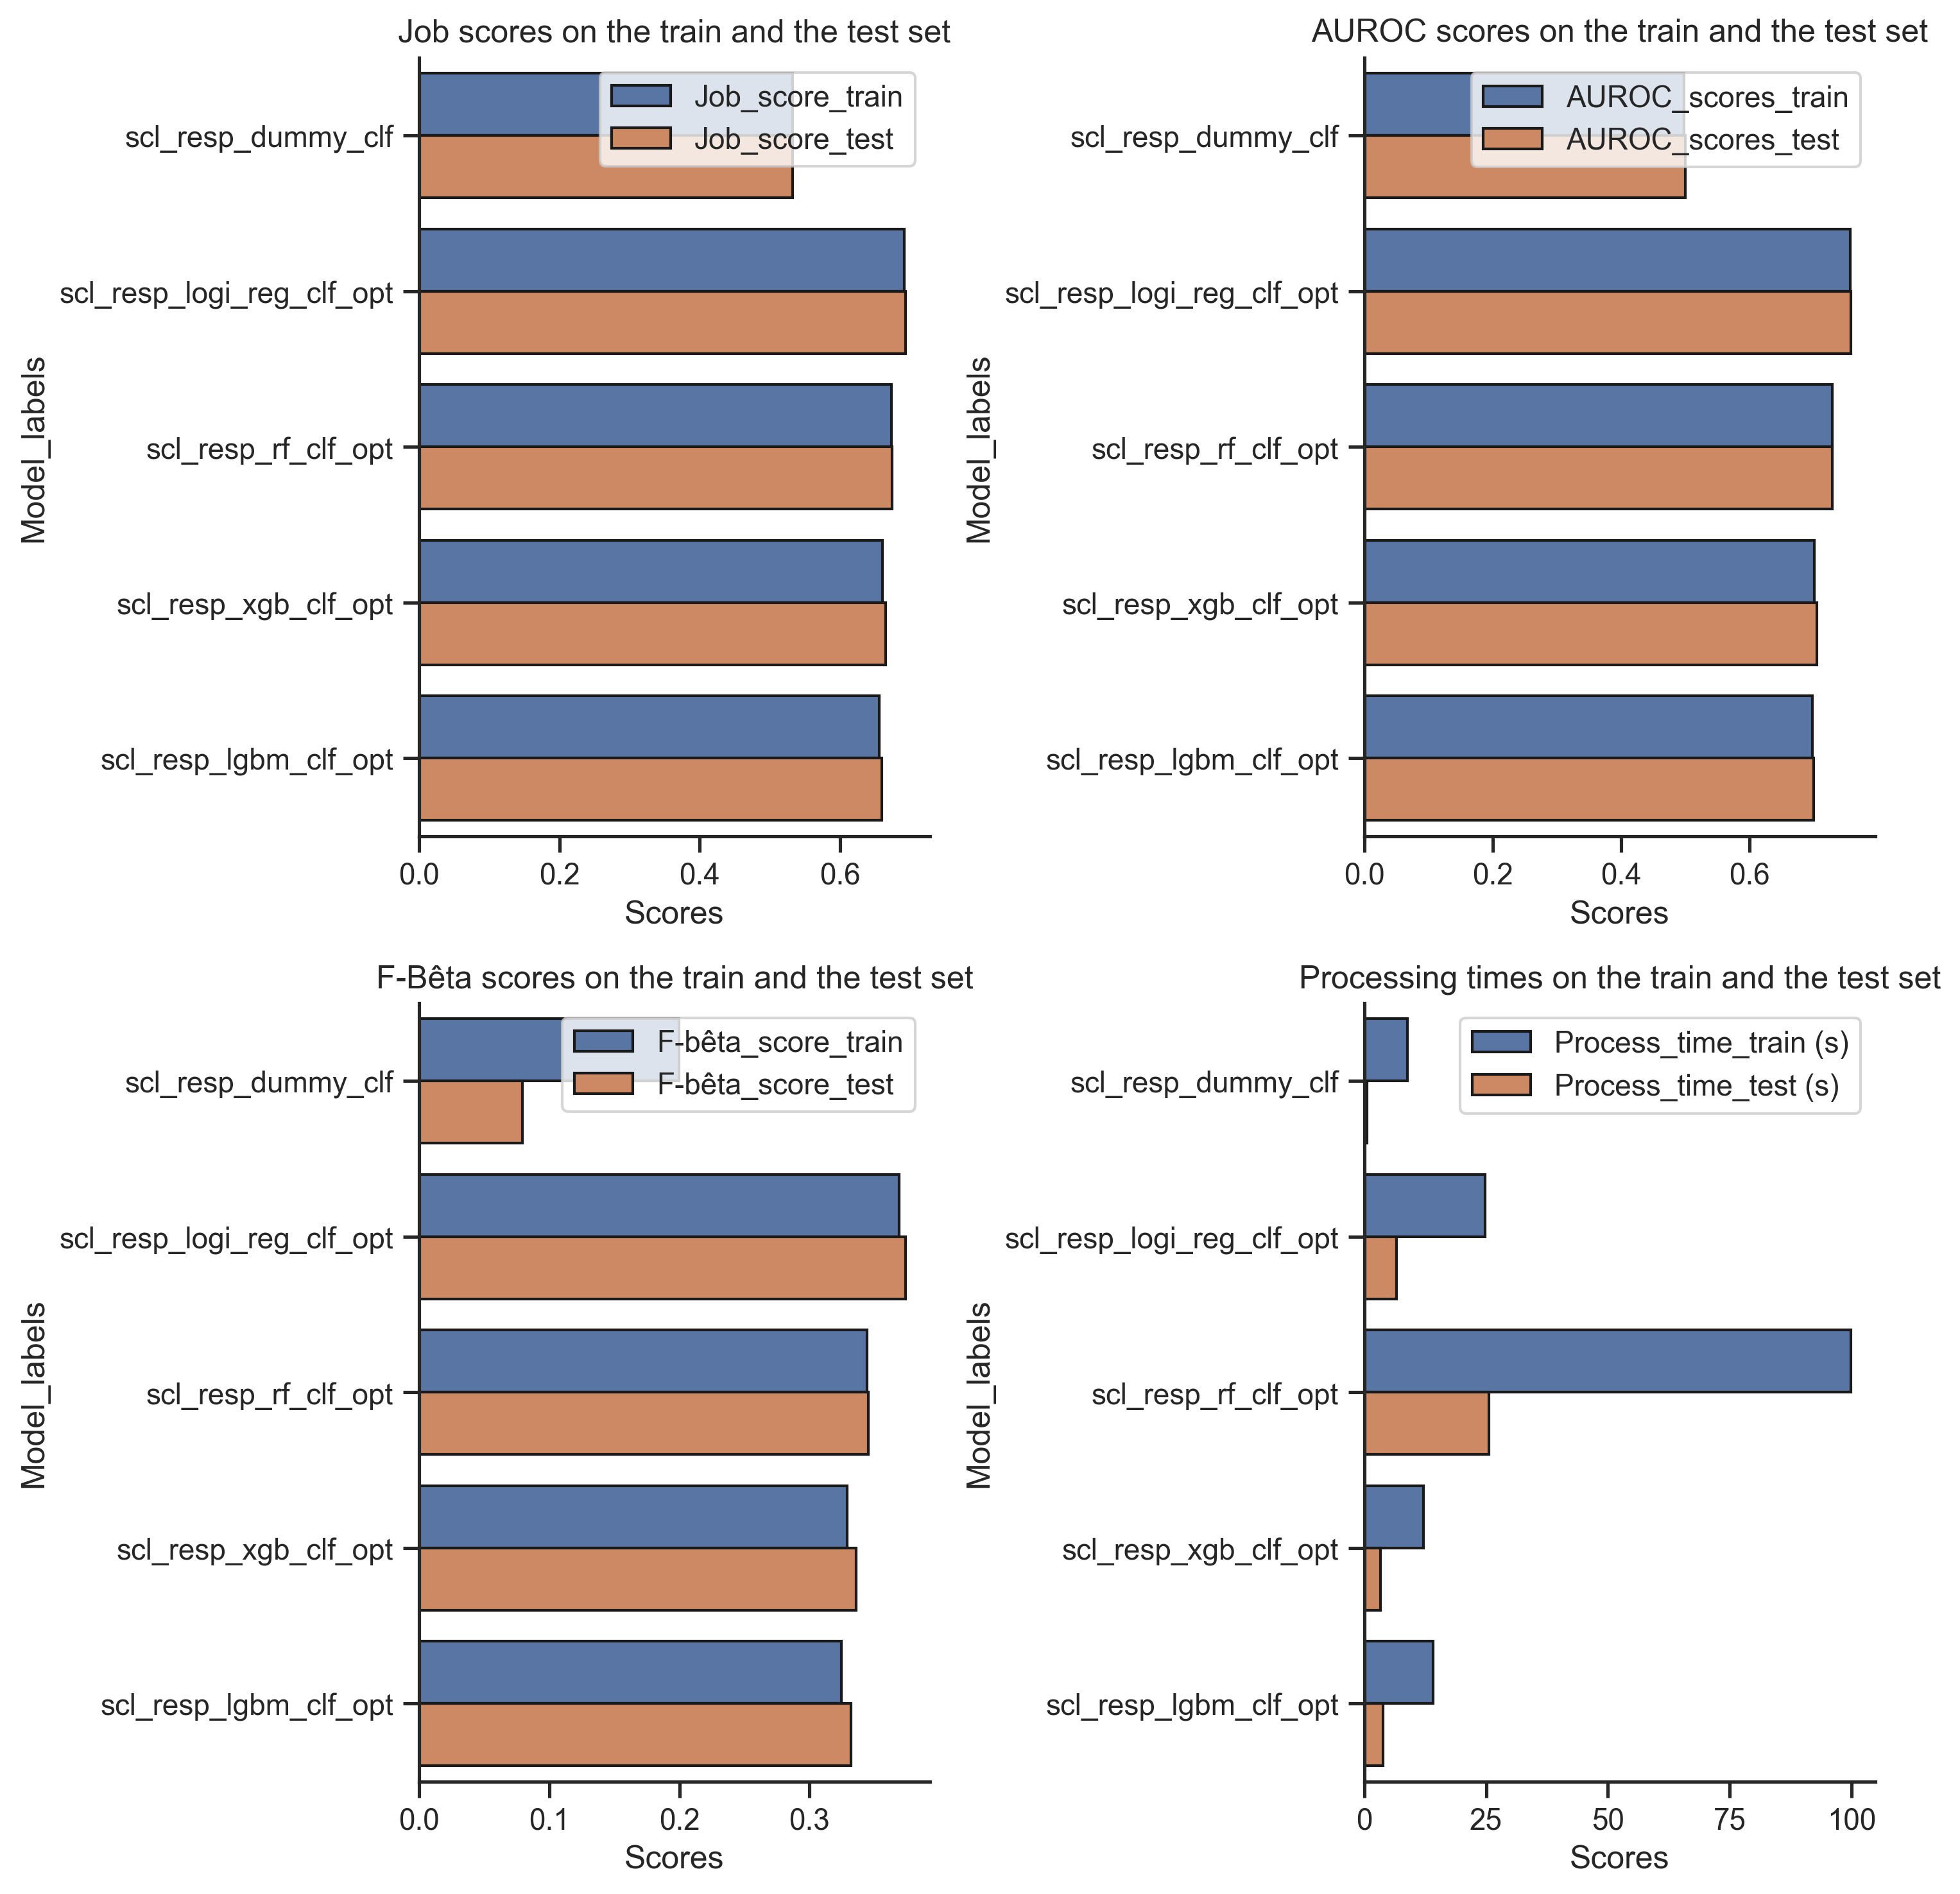

CPU times: total: 2.67 s
Wall time: 2.67 s


In [74]:
%%time

### Configuration ###

# Select the columns to compare.
l_features_peers = [
                    ['Job_score_train', 'Job_score_test'],
                    ['AUROC_scores_train', 'AUROC_scores_test'],
                    ['F-bêta_score_train', 'F-bêta_score_test'],
                    ['Process_time_train (s)', 'Process_time_test (s)']
                   ]

# Set each subplot titles.
l_subplot_titles = ["Job scores on the train and the test set",
                    "AUROC scores on the train and the test set",
                    "F-Bêta scores on the train and the test set",
                    "Processing times on the train and the test set"]

# Plot figures normalization, no normalization, data resampling.
for j in np.arange(0, df_MODELS.shape[0], 5):
    
    # Display only figure associated to models from this notebook.
    if j > 10:
        break
    
    # Figures separator.
    print("\n" + "-" * 100 + "\n")
    
    # Set the figure environment.
    fig = plt.figure(figsize=(10,10), dpi=300)
    
    # Set the whole figure title.
    if j < 5:
        print("Models comparison: No data transformation + Weight")
    elif j < 10:
        print("Models comparison: Normalization + Weight")
    elif j < 15:
        print("Models comparison: Normalization + Data resampling")

    
    # Initialize the subplot grid (2 lines x 2 columns).
    l, c = int(len(l_features_peers) / 2), 2
    
    
    ### Plotting ###

    # Run the loop to draw and position each subplot on the figure's subplot grid.
    for i in range(len(l_features_peers)):

        # Get the columns and the subplot title to plot.
        features_peer = l_features_peers[i]
        subplot_title = l_subplot_titles[i]

        # Set the position of the subplot.
        p = i + 1
        plt.subplot(l, c, p)

        # Plot the subplot.
        figure_barplot(df_MODELS[features_peer].iloc[j:j+5],
                       x_labels = 'Model_labels', y_label = 'Scores',
                       title = subplot_title)


    ### Drawing ###

    # Arrange the subplots such as they are not superimposing each others. 
    plt.tight_layout()

    # Draw the figure.
    plt.show()

These figures highlight what was just discussed previously but show the time component in addition.
- As it can be noticed first, Random forest clearly ask a lot longer to train and release a prediction. This behaviour eliminates it. Too slow. It can't fulfill our objectives.
- If we give a glance at the summarizing table for more details, it is clear that logistic regression is 25 % slower than LightGBM in all cases.
- Oversampling significantly slows down all models fitting and prediction times for 100 to 200 % as it can be expected since oversampling operations are added and more data needs to be treated. Nevertheless, random forest is an exception since it suprisingly benefits of a boost of 1000 % in term of speed. <br>

=> Overall LightGBM seems the most promising model of those tested.